# Debate em Dados

### por Daniel N. Rocha

Este estudo analisa dados de um torneio de debates. Debates competitivos funcionam da seguinte forma: debatedores competem em duplas, com cada debate possuindo 4 duplas em posições distintas.

Os debatedorem tem suas posições sorteadas e devem defender ou se opor a uma moção (exemplo: Esta Casa proibiria discurso de ódio), que é divulgada somente 15 minutos antes do debate (os debatedores não podem usar internet neste tempo de preparação).

Cada debate é julgado por uma mesa de juízes que avaliam somente a persuasividade lógico-argumentativa dos debatedores e das duplas para ranquear as duplas (1o, 2o, 3o e 4o lugar) e dar notas individuais aos debatedores (que varia de 50 a 100 speaker points).

Cada torneio possui diversas rodadas classificatórias, e as duplas mais bem colocadas disputam as eliminatórias (quartas, semi e final, a depender do torneio).

A partir de dados coletados no **V Open Minas** (maior torneio de debates em língua portuguesa já realizado), analiso padrões de vítorias e derrotas. Este estudo busca encontrar insights estatísticos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

In [175]:
vopen=pd.read_excel('Divulgacao_V_Open_Minas.xlsx',sheet_name='Dados')
vopen.head()

ID                Nome       SD  Ponto1  Nota1  Sala1  Ponto2  Nota2  \
0   5       Arthur Gandra  Senatus       4     80      2       4     73   
1  29        Luísa Côrtes  Senatus       4     72      8       4     77   
2  14    João Lucas Lopes   SdDUFC       4     72      4       4     75   
3   5         Pedro Lopes  Senatus       4     79      2       4     71   
4  54  Carolina Marcondes      SDV       4     80     14       1     70   

   Sala2  Ponto3 ...  Nota5  Sala5  Pontuação  Dificuldade  Nota Final  \
0     24       4 ...     82     79         17        59.75        77.2   
1     23       1 ...     76     79         16        57.00        77.2   
2     22       3 ...     72     77         17        57.00        77.0   
3     24       4 ...     78     79         17        59.75        76.6   
4     20       4 ...     70     81         14        54.50        76.6   

      Rodada  1D  1O  2D  2O  
0  1ª Rodada  33  34  35  36  
1  3ª Rodada  46  11  25   1  
2  2ª Rodada  20  51  62   2  
3  1ª Rodada  37  38  39  40  
4          0   0   0   0   0  

[5 rows x 26 columns]

**ID** representa o código de uma dada dupla

**Nome** representa cada debatedor de uma dada dupla

**PontoX** é a pontução de uma dada dupla na rodada X

**NotaX** é a nota individual de um debatedor na rodada X

**SalaX** é a sala na qual um debatedor estava na rodada X

**Pontuação** é o somatório dos pontos obtidos em cada rodada

**Nota Final** é a média das notas individuais obtidas em cada rodada

**Dificuldade** representa o somatório da pontuação dos adversários enfrentados

**Rodada** representa o número da rodada na qual os dados de 1D, 1O, 2D e 2O se relacionam

**1D, 1O, 2D e 2O** representam as posições que cada dupla tirou em cada sala para uma dada rodada

### Desempenho por Posição
#### Posição com mais chance de vitória:

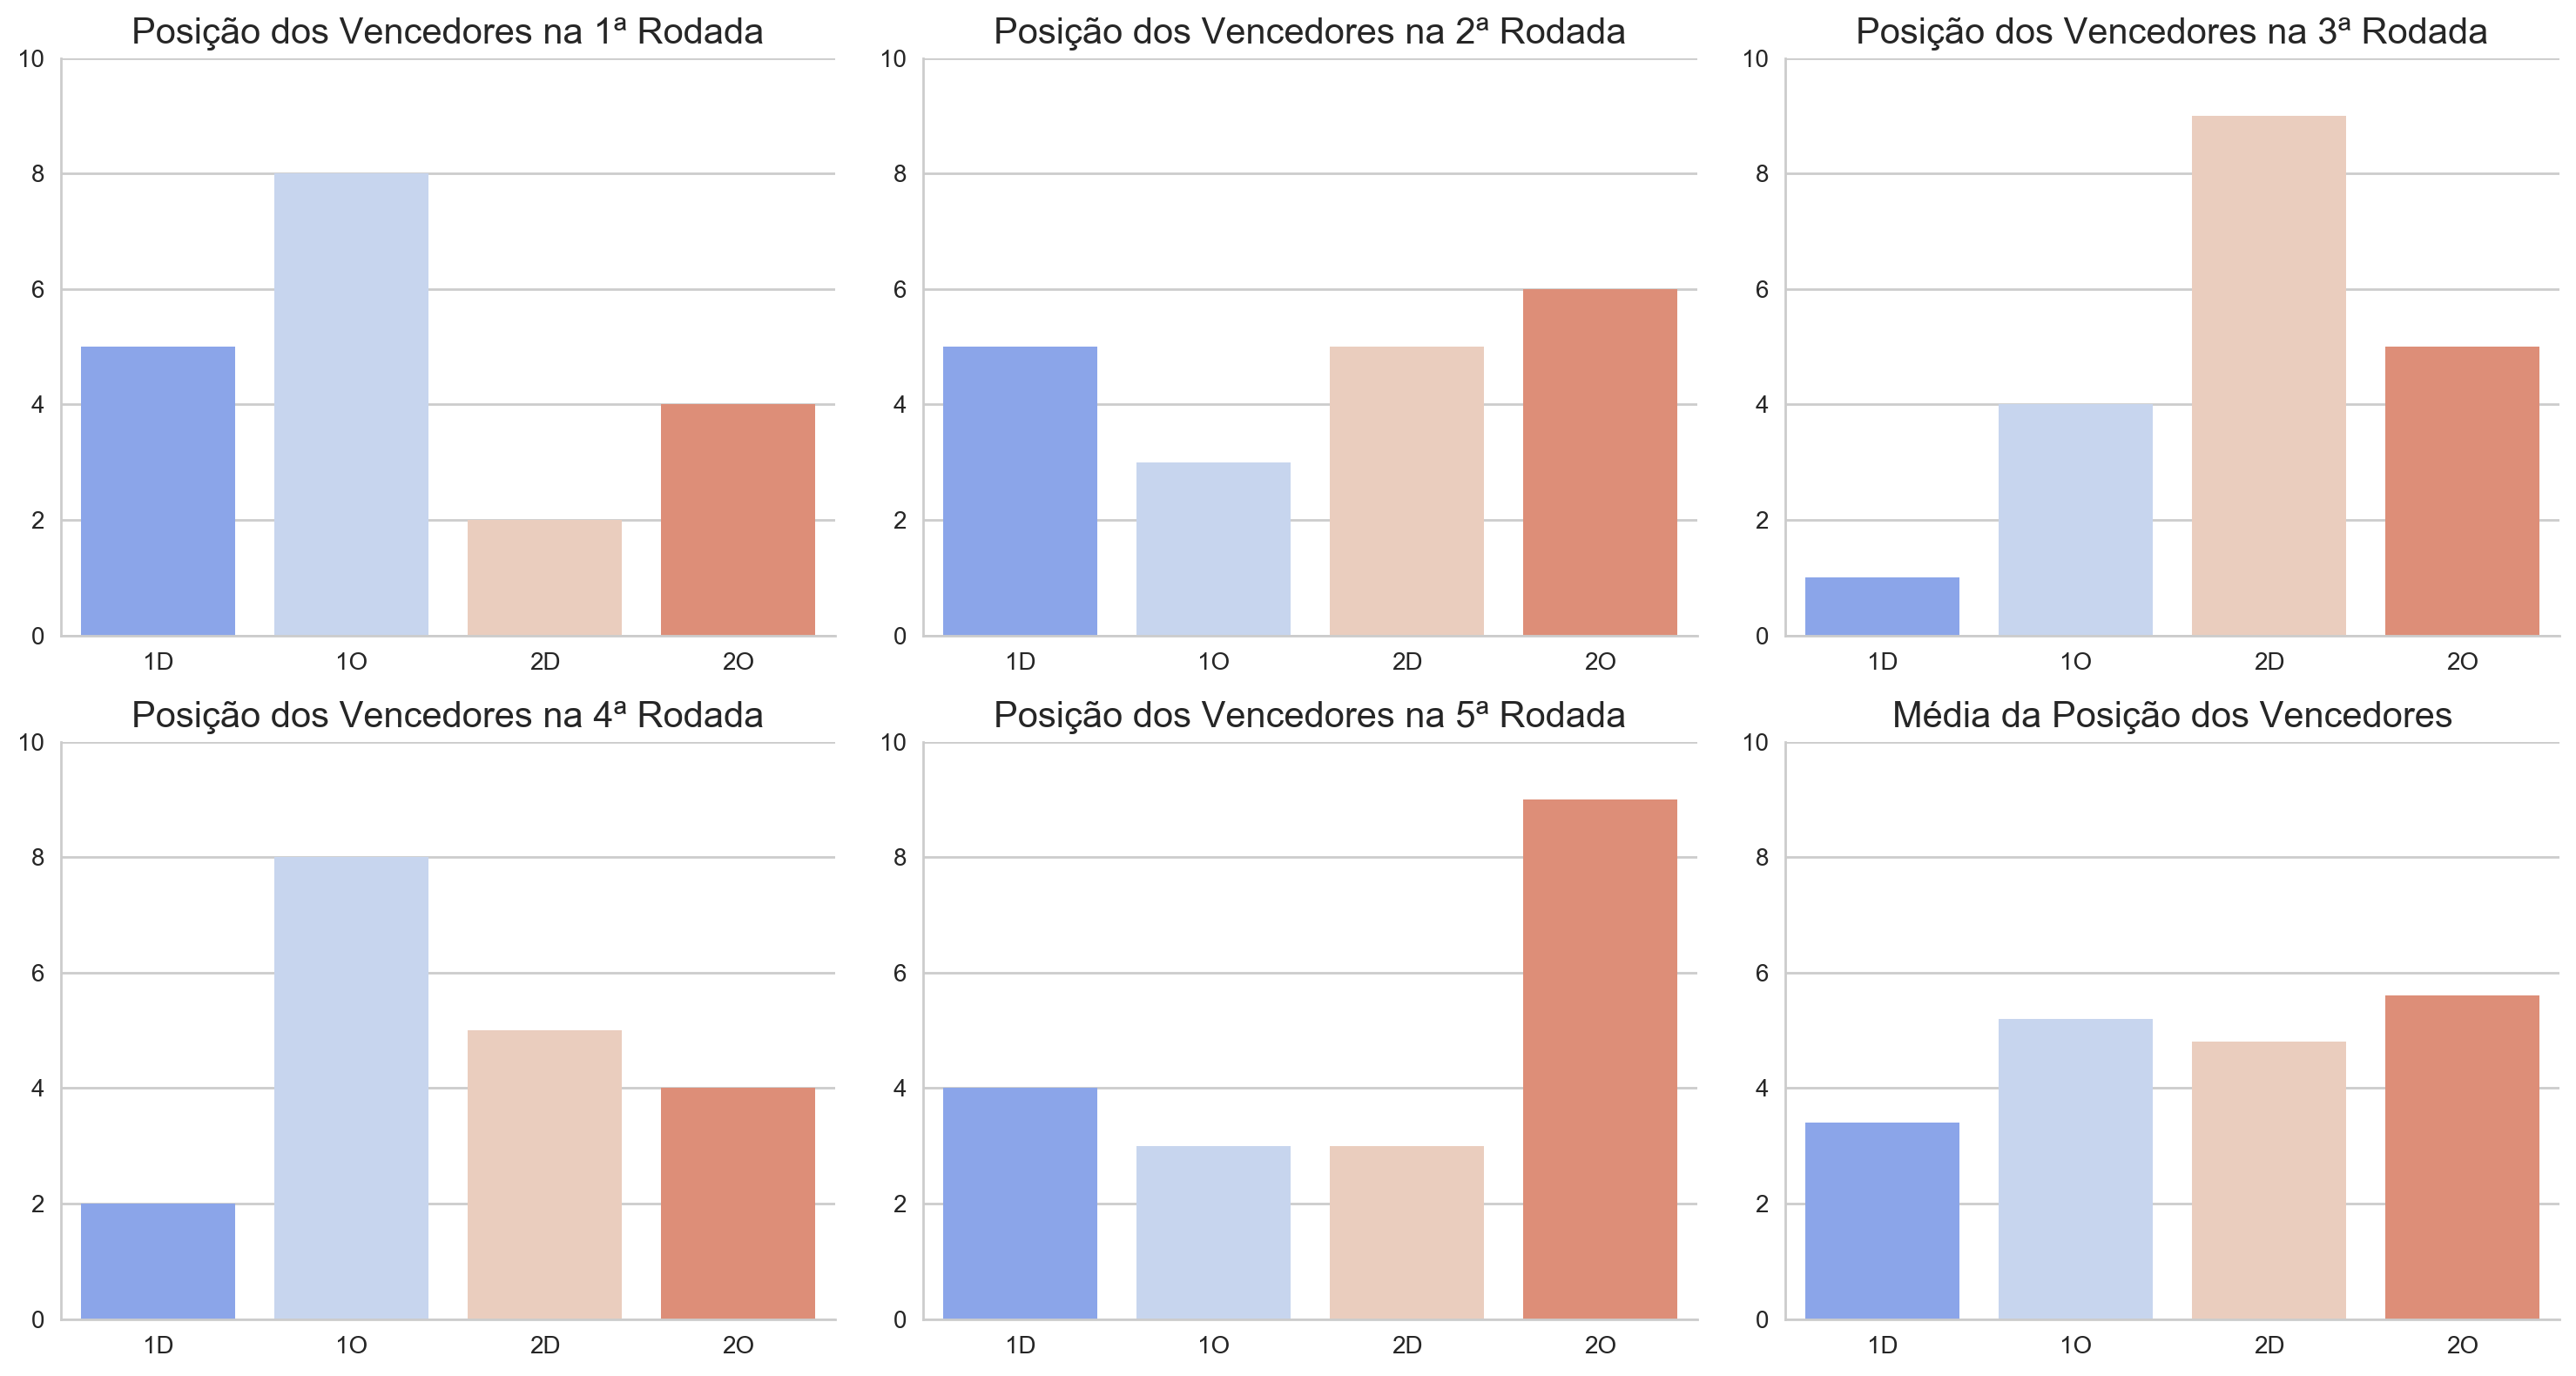

In [3]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    vencedoras_rodada=list(set(vopen[vopen[key]==4]['ID'].tolist()))
    vencedoras_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        vencedoras_posicao_rodada=0
        for dupla in vencedoras_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                vencedoras_posicao_rodada+=1
        vencedoras_rodada_por_posicao.append(vencedoras_posicao_rodada)
        lista.append([value,posicao,vencedoras_posicao_rodada])
    k=np.array(vencedoras_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        vencedores_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_vitorias=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Vencedores','Posição','Vitórias'])
    elif qtd==2:
        vencedores_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_vitorias.loc[i+5]=lista2[i,:]
    elif qtd==3:
        vencedores_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_vitorias.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        vencedores_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_vitorias.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        vencedores_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_vitorias.loc[i+17]=lista5[i,:]  
    df_vitorias['Vitórias']=df_vitorias['Vitórias'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Vencedores na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_vitorias.groupby('Posição').mean()['Vitórias'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_vitorias.loc[i+21]=lista6[i,:]
df_vitorias['Vitórias']=df_vitorias['Vitórias'].astype('float32')
for i in df_vitorias.groupby('Posição').std()['Vitórias'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_vitorias.loc[i+25]=lista7[i,:]
df_vitorias['Vitórias']=df_vitorias['Vitórias'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Vencedores',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Posição com mais chance de vices:

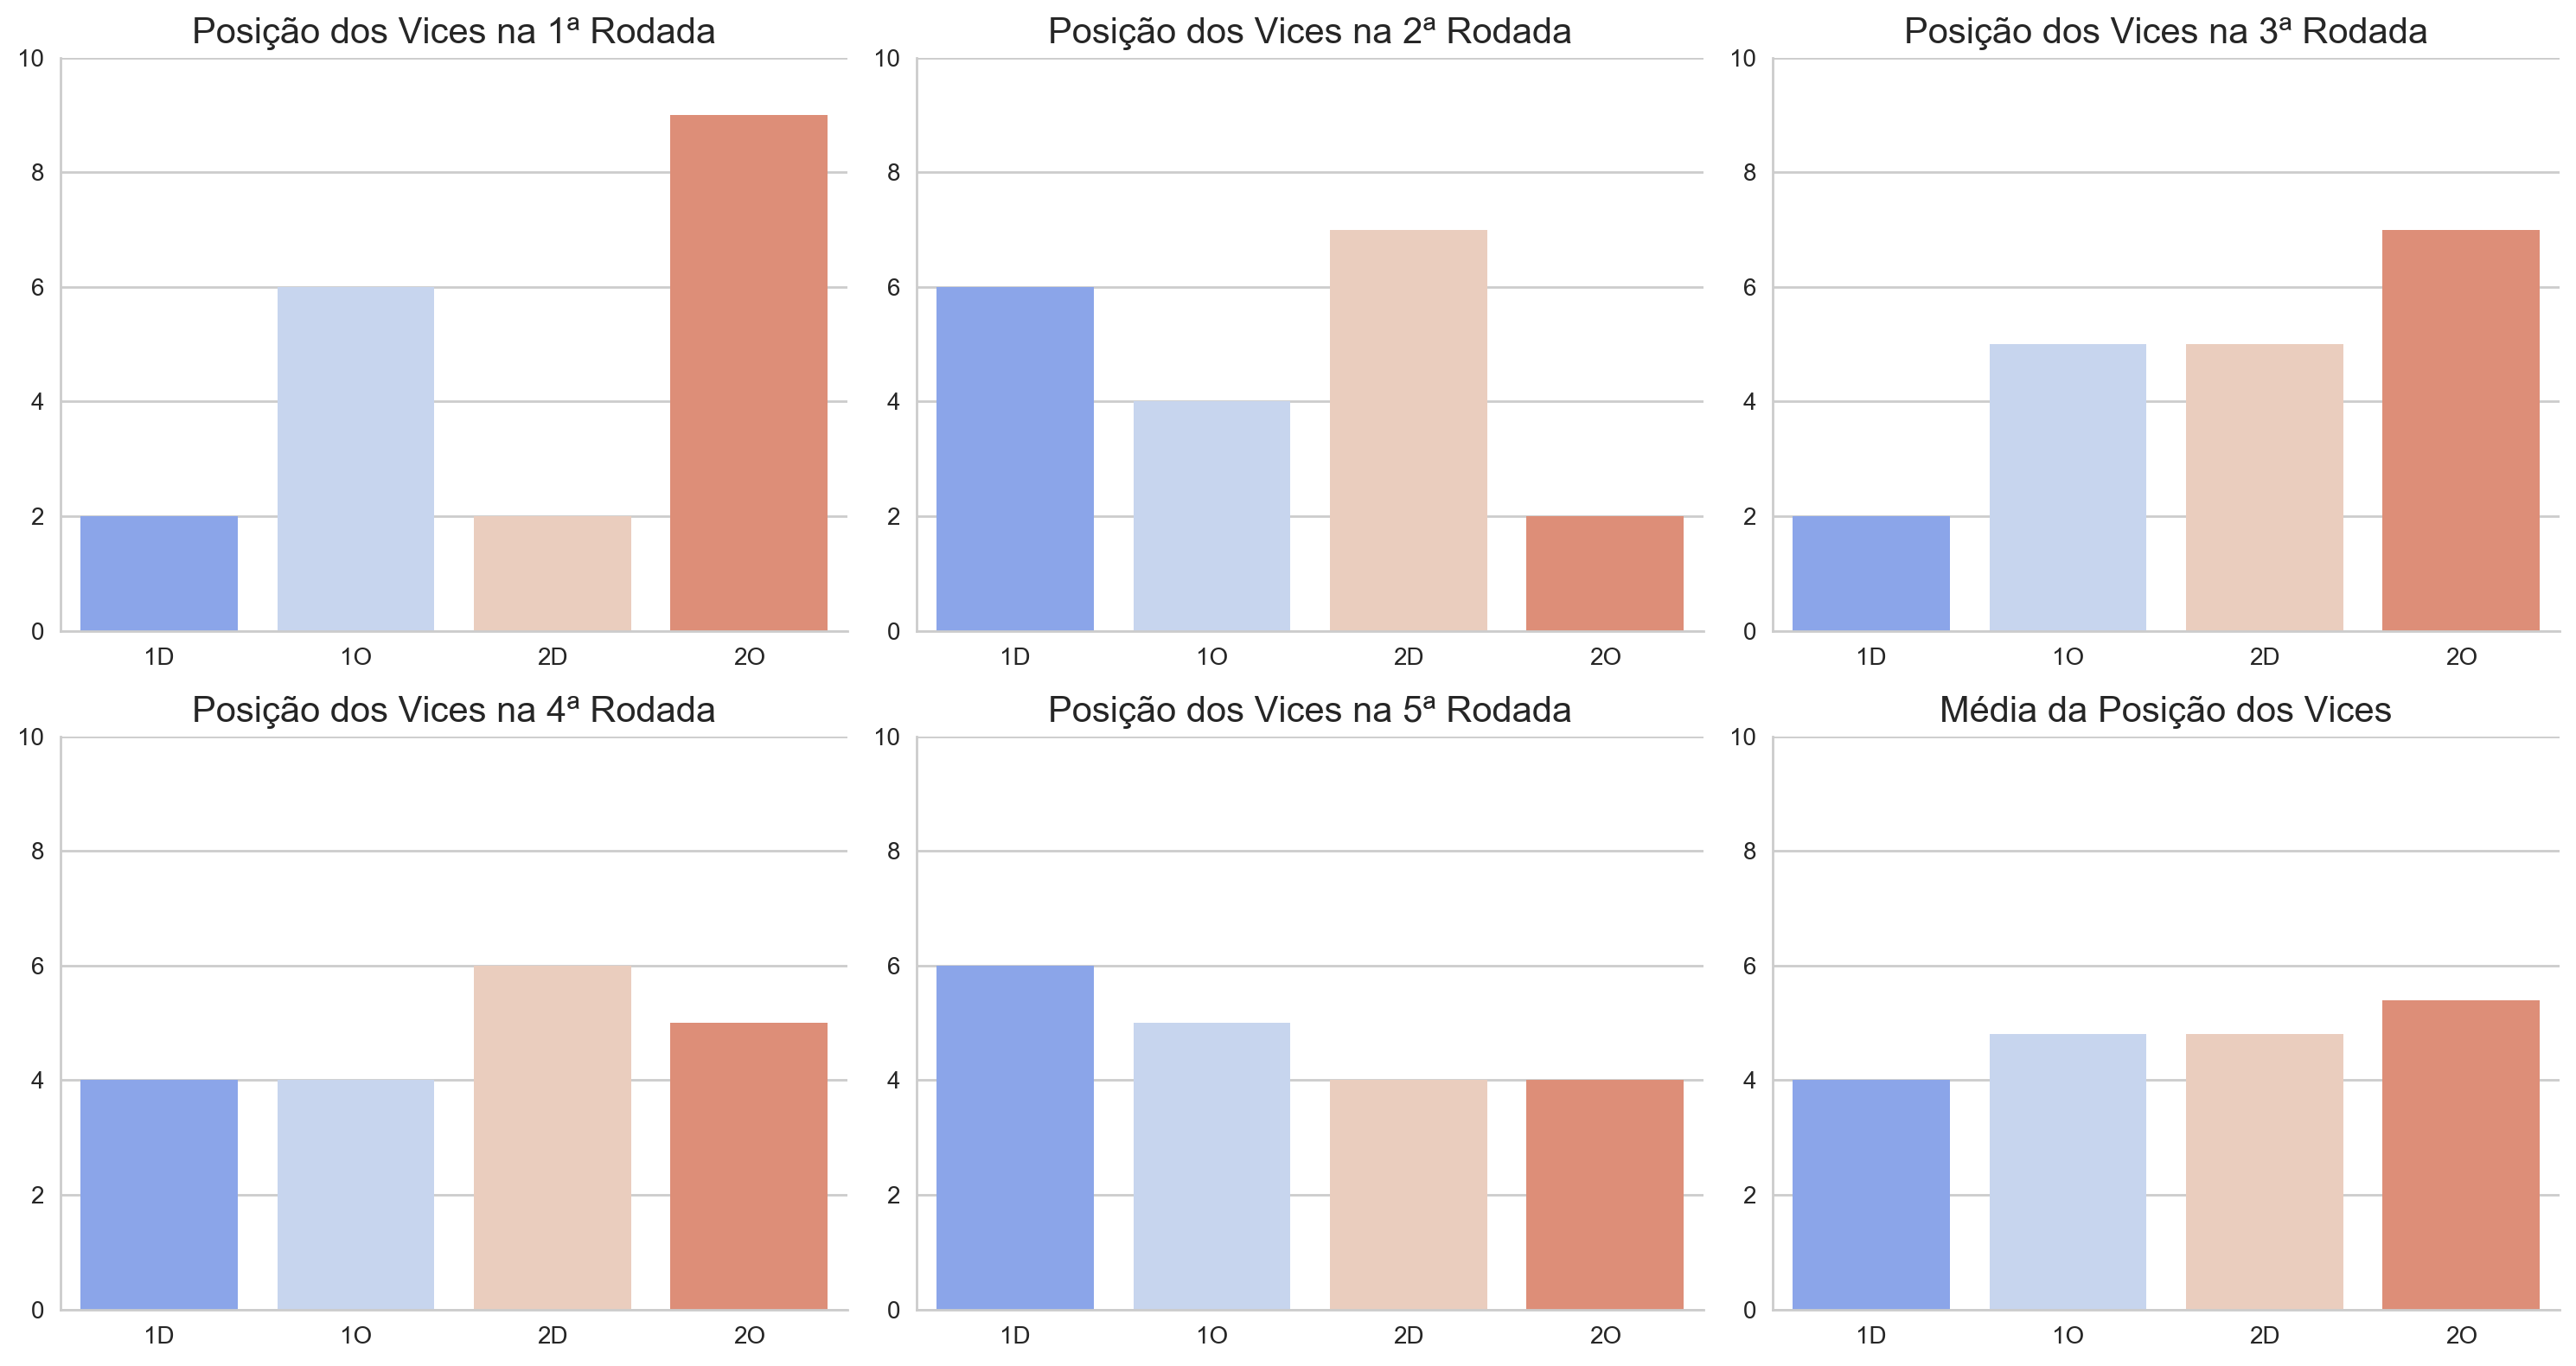

In [4]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    vices_rodada=list(set(vopen[vopen[key]==3]['ID'].tolist()))
    vices_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        vices_posicao_rodada=0
        for dupla in vices_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                vices_posicao_rodada+=1
        vices_rodada_por_posicao.append(vices_posicao_rodada)
        lista.append([value,posicao,vices_posicao_rodada])
    k=np.array(vices_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        vices_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_vices=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Vices','Posição','Vices'])
    elif qtd==2:
        vices_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_vices.loc[i+5]=lista2[i,:]
    elif qtd==3:
        vices_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_vices.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        vices_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_vices.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        vices_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_vices.loc[i+17]=lista5[i,:]  
    df_vices['Vices']=df_vices['Vices'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Vices na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_vices.groupby('Posição').mean()['Vices'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_vices.loc[i+21]=lista6[i,:]
df_vices['Vices']=df_vices['Vices'].astype('float32')
for i in df_vices.groupby('Posição').std()['Vices'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_vices.loc[i+25]=lista7[i,:]
df_vices['Vices']=df_vices['Vices'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Vices',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Posição com mais chance de terceiros:

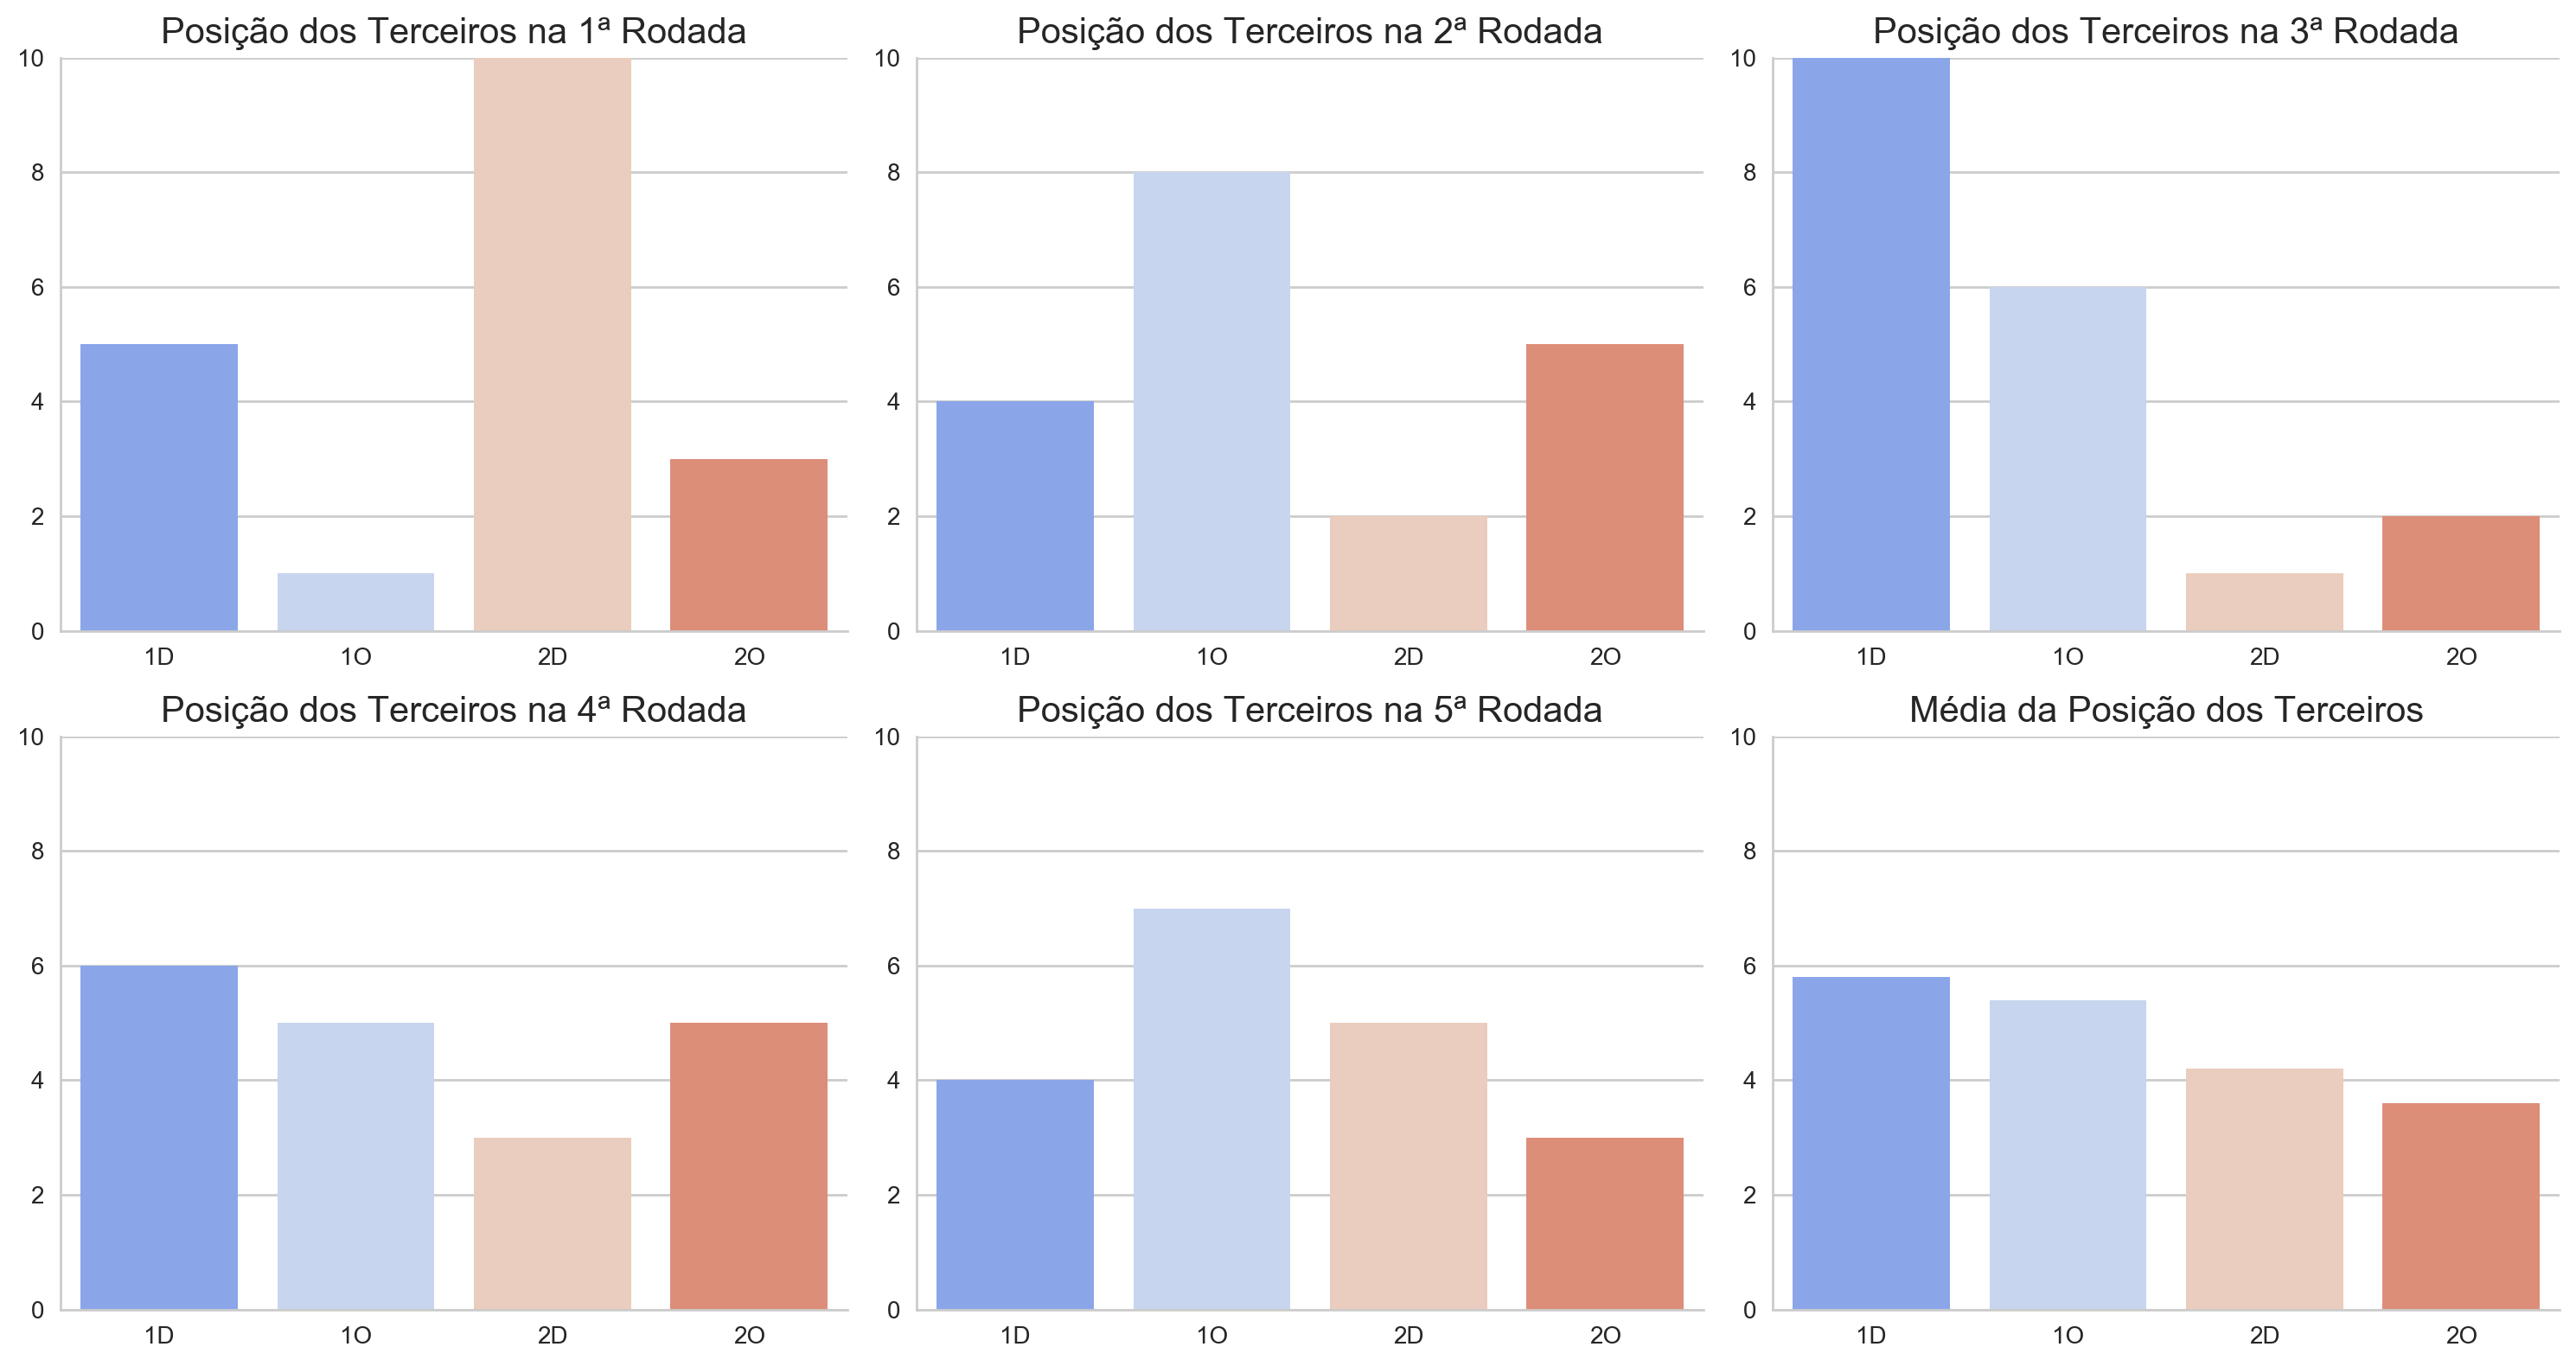

In [5]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    terceiros_rodada=list(set(vopen[vopen[key]==2]['ID'].tolist()))
    terceiros_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        terceiros_posicao_rodada=0
        for dupla in terceiros_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                terceiros_posicao_rodada+=1
        terceiros_rodada_por_posicao.append(terceiros_posicao_rodada)
        lista.append([value,posicao,terceiros_posicao_rodada])
    k=np.array(terceiros_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        terceiros_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_terceiros=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Terceiros','Posição','Terceiros'])
    elif qtd==2:
        terceiros_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_terceiros.loc[i+5]=lista2[i,:]
    elif qtd==3:
        terceiros_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_terceiros.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        terceiros_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_terceiros.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        terceiros_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_terceiros.loc[i+17]=lista5[i,:]  
    df_terceiros['Terceiros']=df_terceiros['Terceiros'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Terceiros na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_terceiros.groupby('Posição').mean()['Terceiros'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_terceiros.loc[i+21]=lista6[i,:]
df_terceiros['Terceiros']=df_terceiros['Terceiros'].astype('float32')
for i in df_terceiros.groupby('Posição').std()['Terceiros'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_terceiros.loc[i+25]=lista7[i,:]
df_terceiros['Terceiros']=df_terceiros['Terceiros'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Terceiros',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Posição com mais chance de derrota:

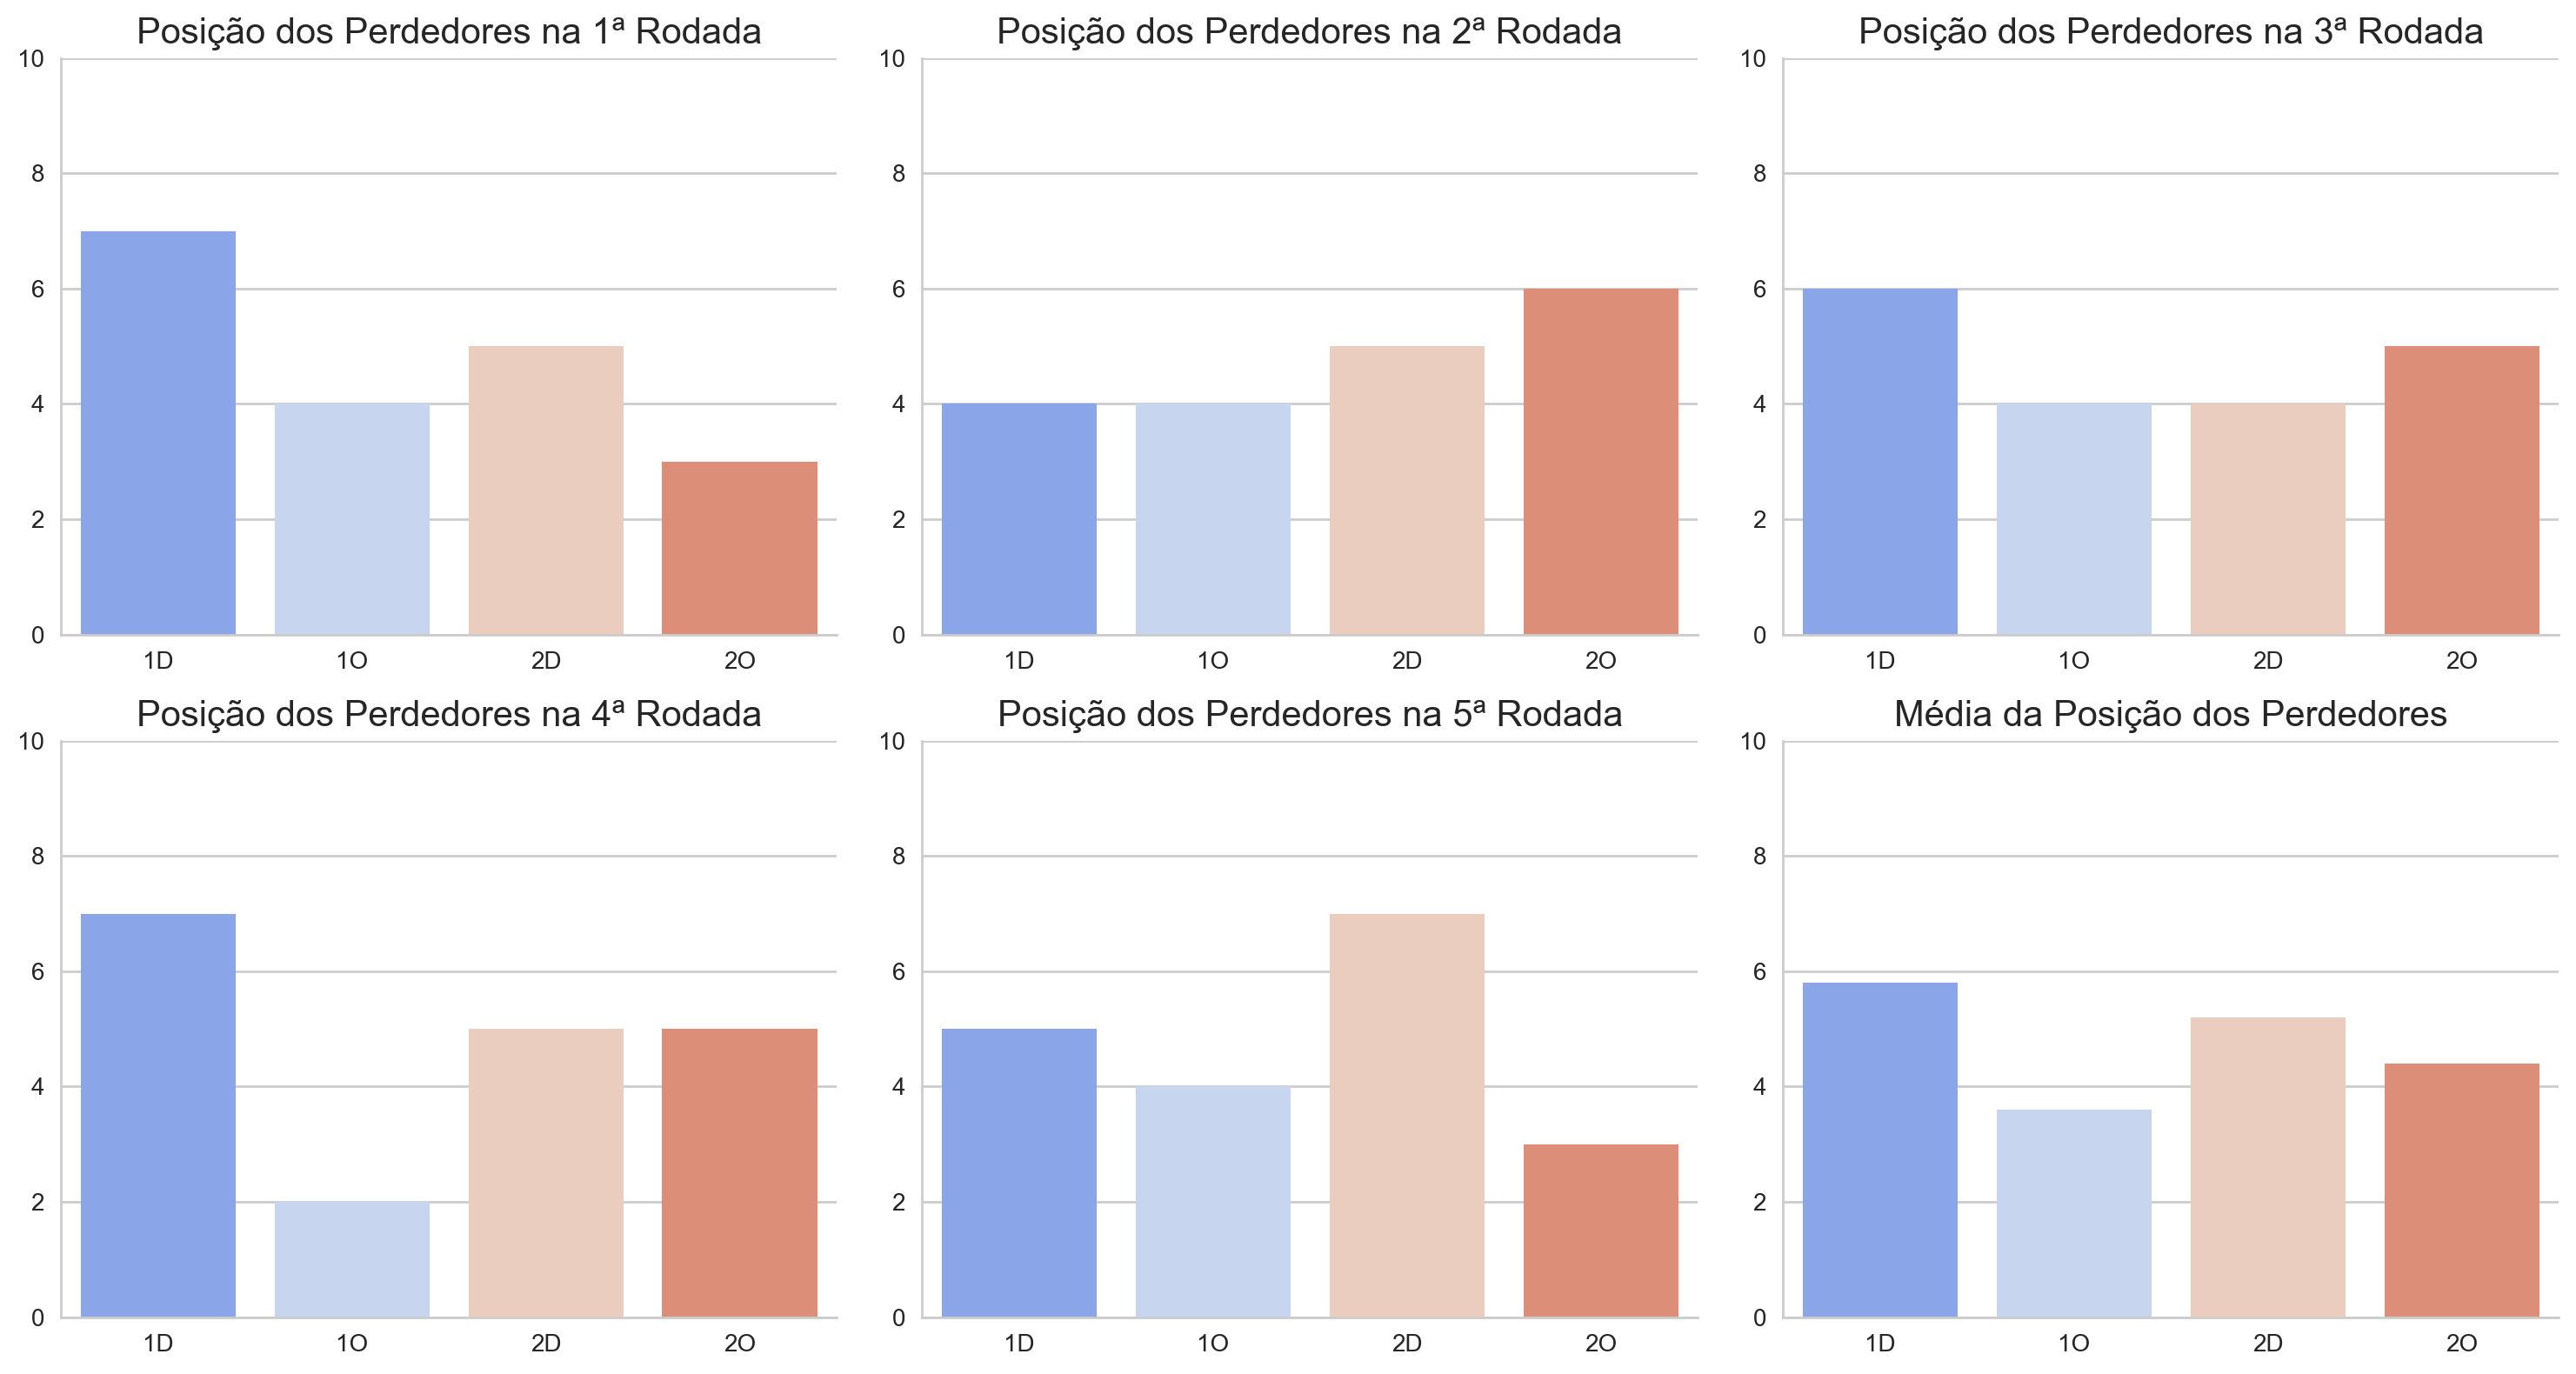

In [6]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    perdedoras_rodada=list(set(vopen[vopen[key]==1]['ID'].tolist()))
    perdedoras_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        perdedoras_posicao_rodada=0
        for dupla in perdedoras_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                perdedoras_posicao_rodada+=1
        perdedoras_rodada_por_posicao.append(perdedoras_posicao_rodada)
        lista.append([value,posicao,perdedoras_posicao_rodada])
    k=np.array(perdedoras_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        perdedoras_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_perdedoras=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Perdedores','Posição','Perdedores'])
    elif qtd==2:
        perdedoras_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_perdedoras.loc[i+5]=lista2[i,:]
    elif qtd==3:
        perdedoras_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_perdedoras.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        perdedoras_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_perdedoras.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        perdedoras_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_perdedoras.loc[i+17]=lista5[i,:]  
    df_perdedoras['Perdedores']=df_perdedoras['Perdedores'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Perdedores na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_perdedoras.groupby('Posição').mean()['Perdedores'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_perdedoras.loc[i+21]=lista6[i,:]
df_perdedoras['Perdedores']=df_perdedoras['Perdedores'].astype('float32')
for i in df_perdedoras.groupby('Posição').std()['Perdedores'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_perdedoras.loc[i+25]=lista7[i,:]
df_perdedoras['Perdedores']=df_perdedoras['Perdedores'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Perdedores',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Resumindo:

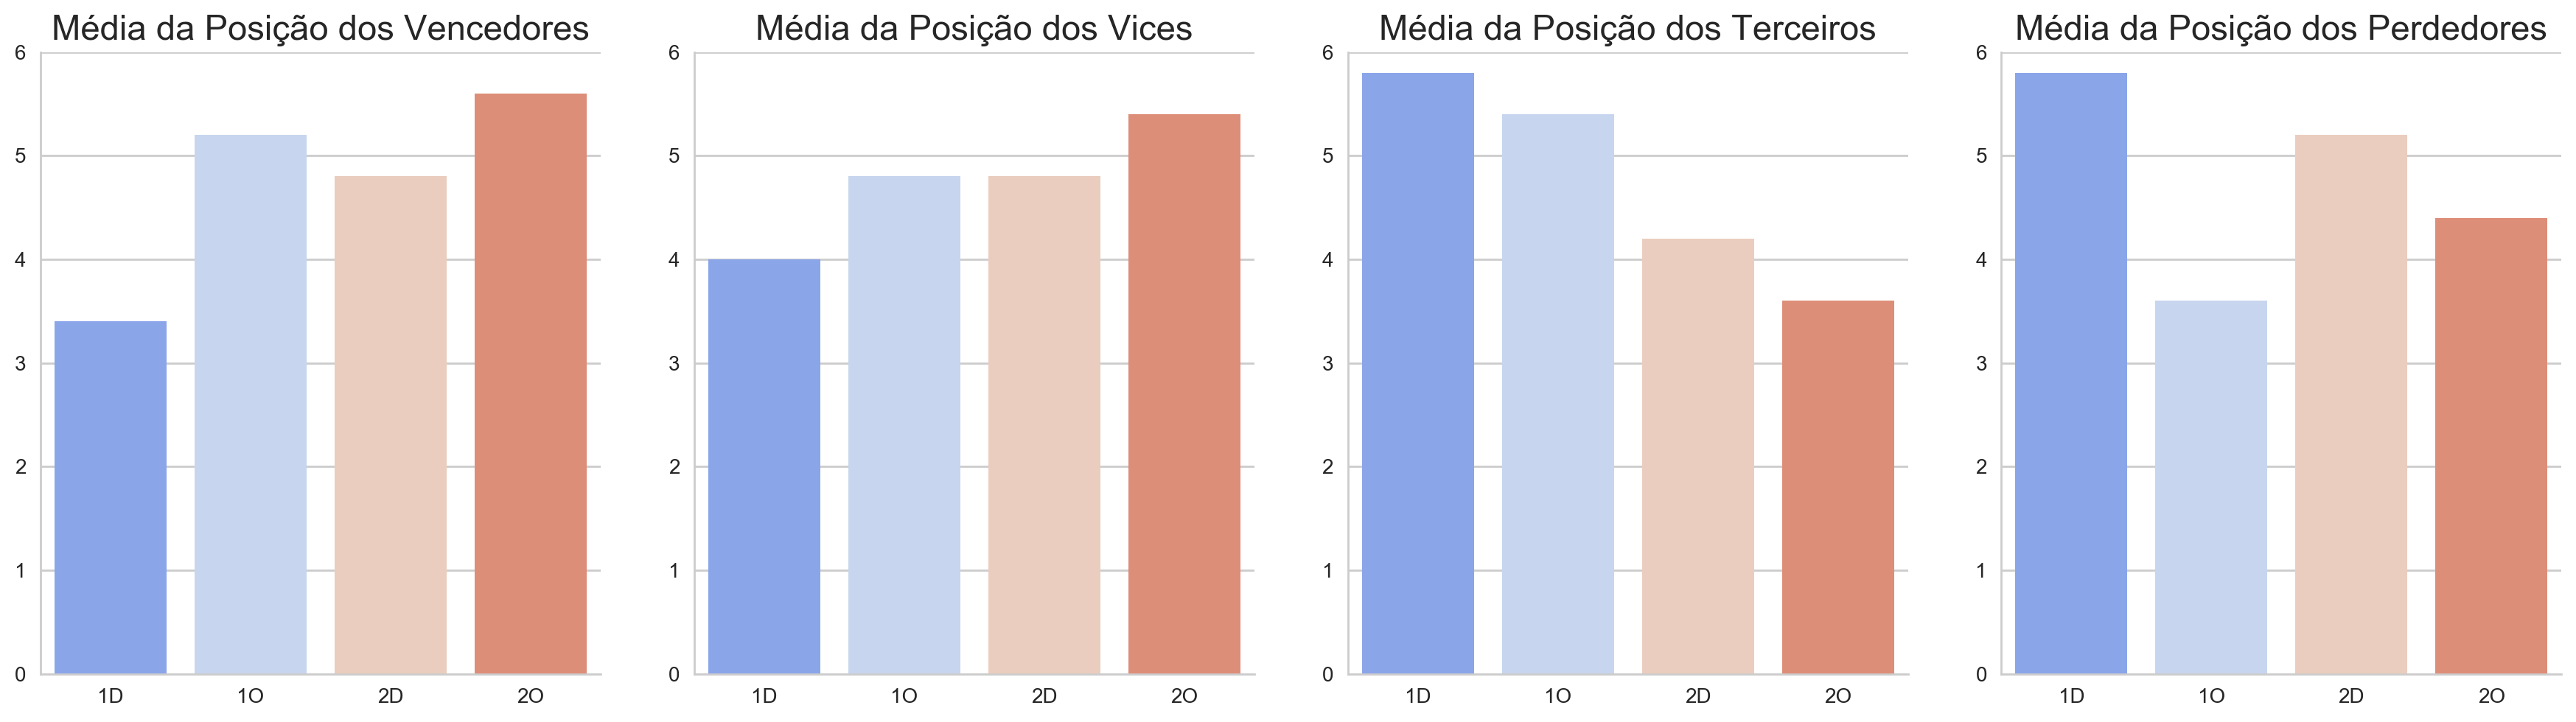

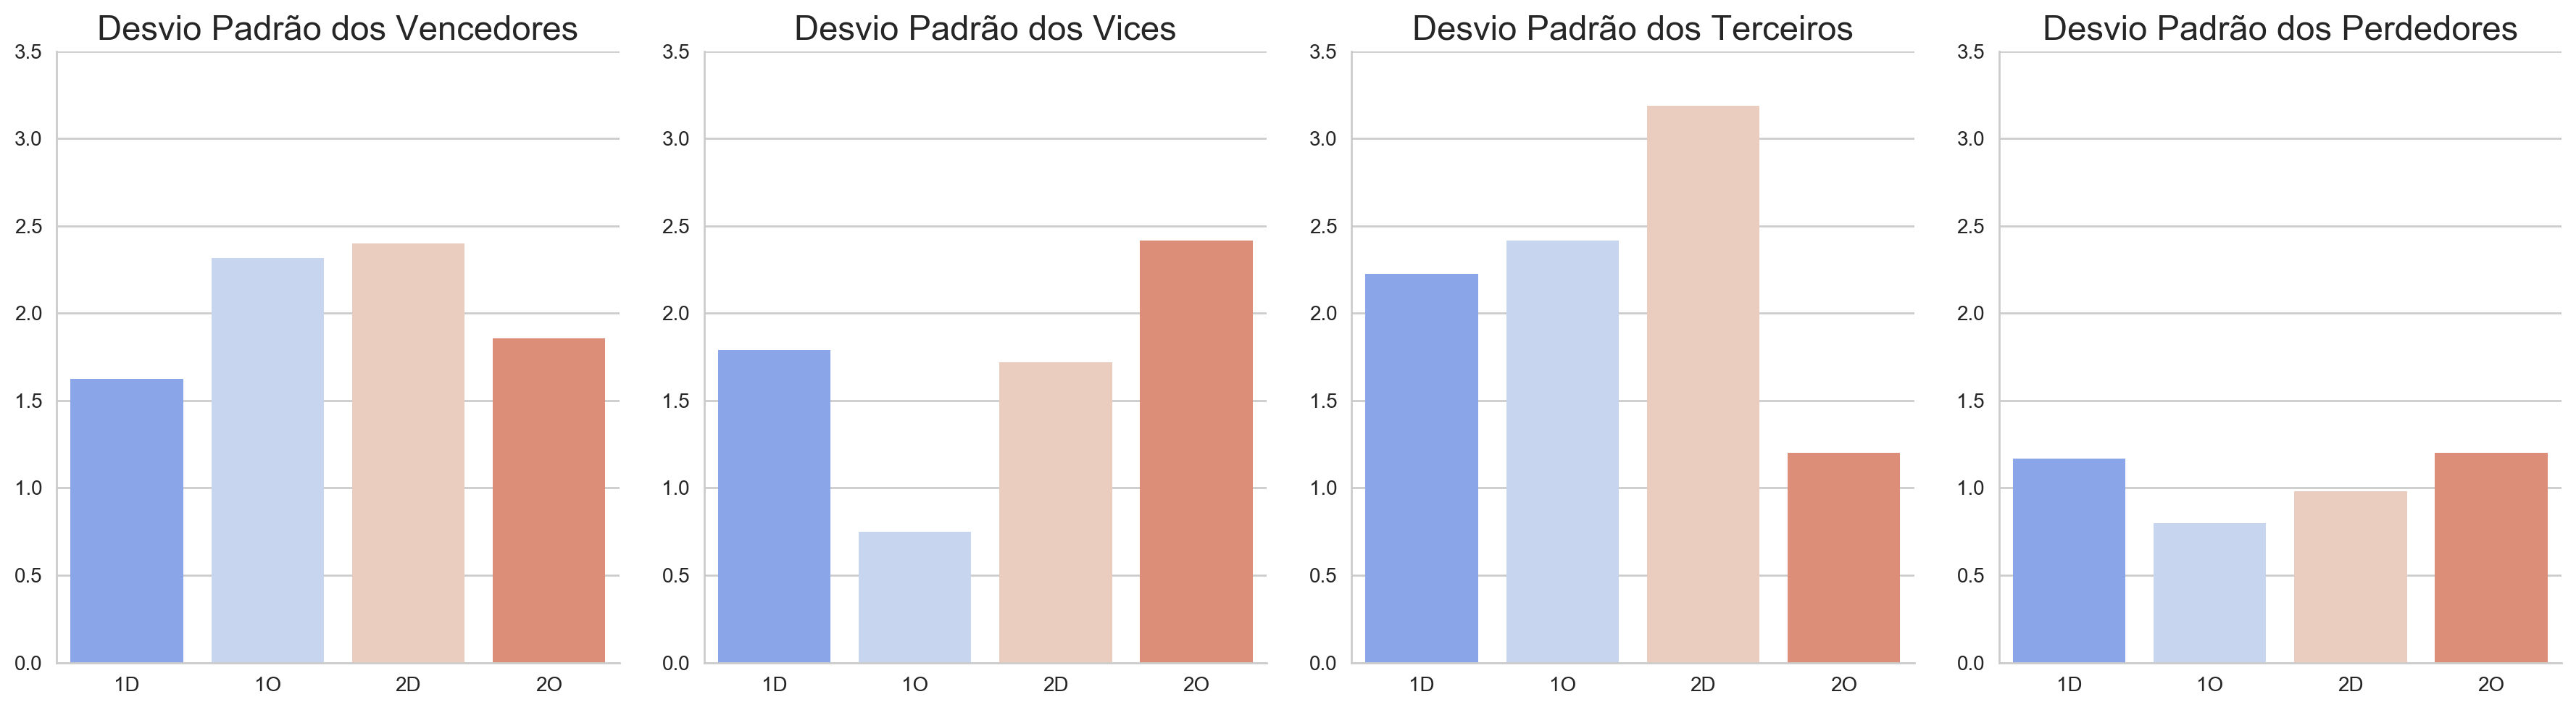

In [7]:
plt.figure(figsize=(18,5),dpi=200)
plt.subplot(1,4,1)
a=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Vencedores',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,2)
a=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Vices',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,3)
a=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Terceiros',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,4)
a=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Perdedores',size=17)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(18,5),dpi=200)
plt.subplot(1,4,1)
a=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Vencedores',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,2)
a=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Vices',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,3)
a=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Terceiros',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,4)
a=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Perdedores',size=17)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

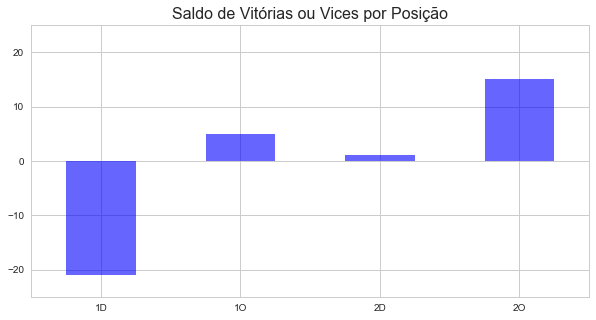

In [8]:
soma_vitorias=df_vitorias.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
soma_vices=df_vices.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
saldo_vitoriosos=np.array(soma_vitorias)+np.array(soma_vices)
soma_terceiros=df_terceiros.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
soma_perdedoras=df_perdedoras.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
saldo_derrotados=np.array(soma_terceiros)+np.array(soma_perdedoras)
saldo_posicoes=saldo_vitoriosos-saldo_derrotados.tolist()
saldo_total=[]
qtd=0
for i in saldo_posicoes:
    qtd+=1
    if qtd==1:
        saldo_total.append(['1D',int(i)])
    if qtd==2:
        saldo_total.append(['1O',int(i)])
    if qtd==3:
        saldo_total.append(['2D',int(i)])
    if qtd==4:
        saldo_total.append(['2O',int(i)])
saldo=pd.DataFrame(saldo_total,columns=['Posição','Frequência'])
saldo.set_index('Posição',inplace=True)
k=saldo.plot(kind='bar',rot=360,color='blue',alpha=0.6,figsize=(10,5),legend=False)
k.set(xlabel='',ylim=(-25,25))
k.set_title('Saldo de Vitórias ou Vices por Posição',fontsize=16)
plt.show()

Na bancada da defesa, a melhor posição é com a 2D

Na bancada da oposição, a melhor posição é com a 2O

Na primeira metade, a melhor posição é 1O

Na segunda metade, a melhor posição é 2O

## Estratégia de Cartel

Em debates competitivos, cartel é a alinça tácita entre duas dupla, para que ambas fiquem nas primeiras posições

Embora o cartel pressuponha intenção, o cartel aqui foi medido como duplas que ganharam (ou perderam) conjuntamente na mesma sala

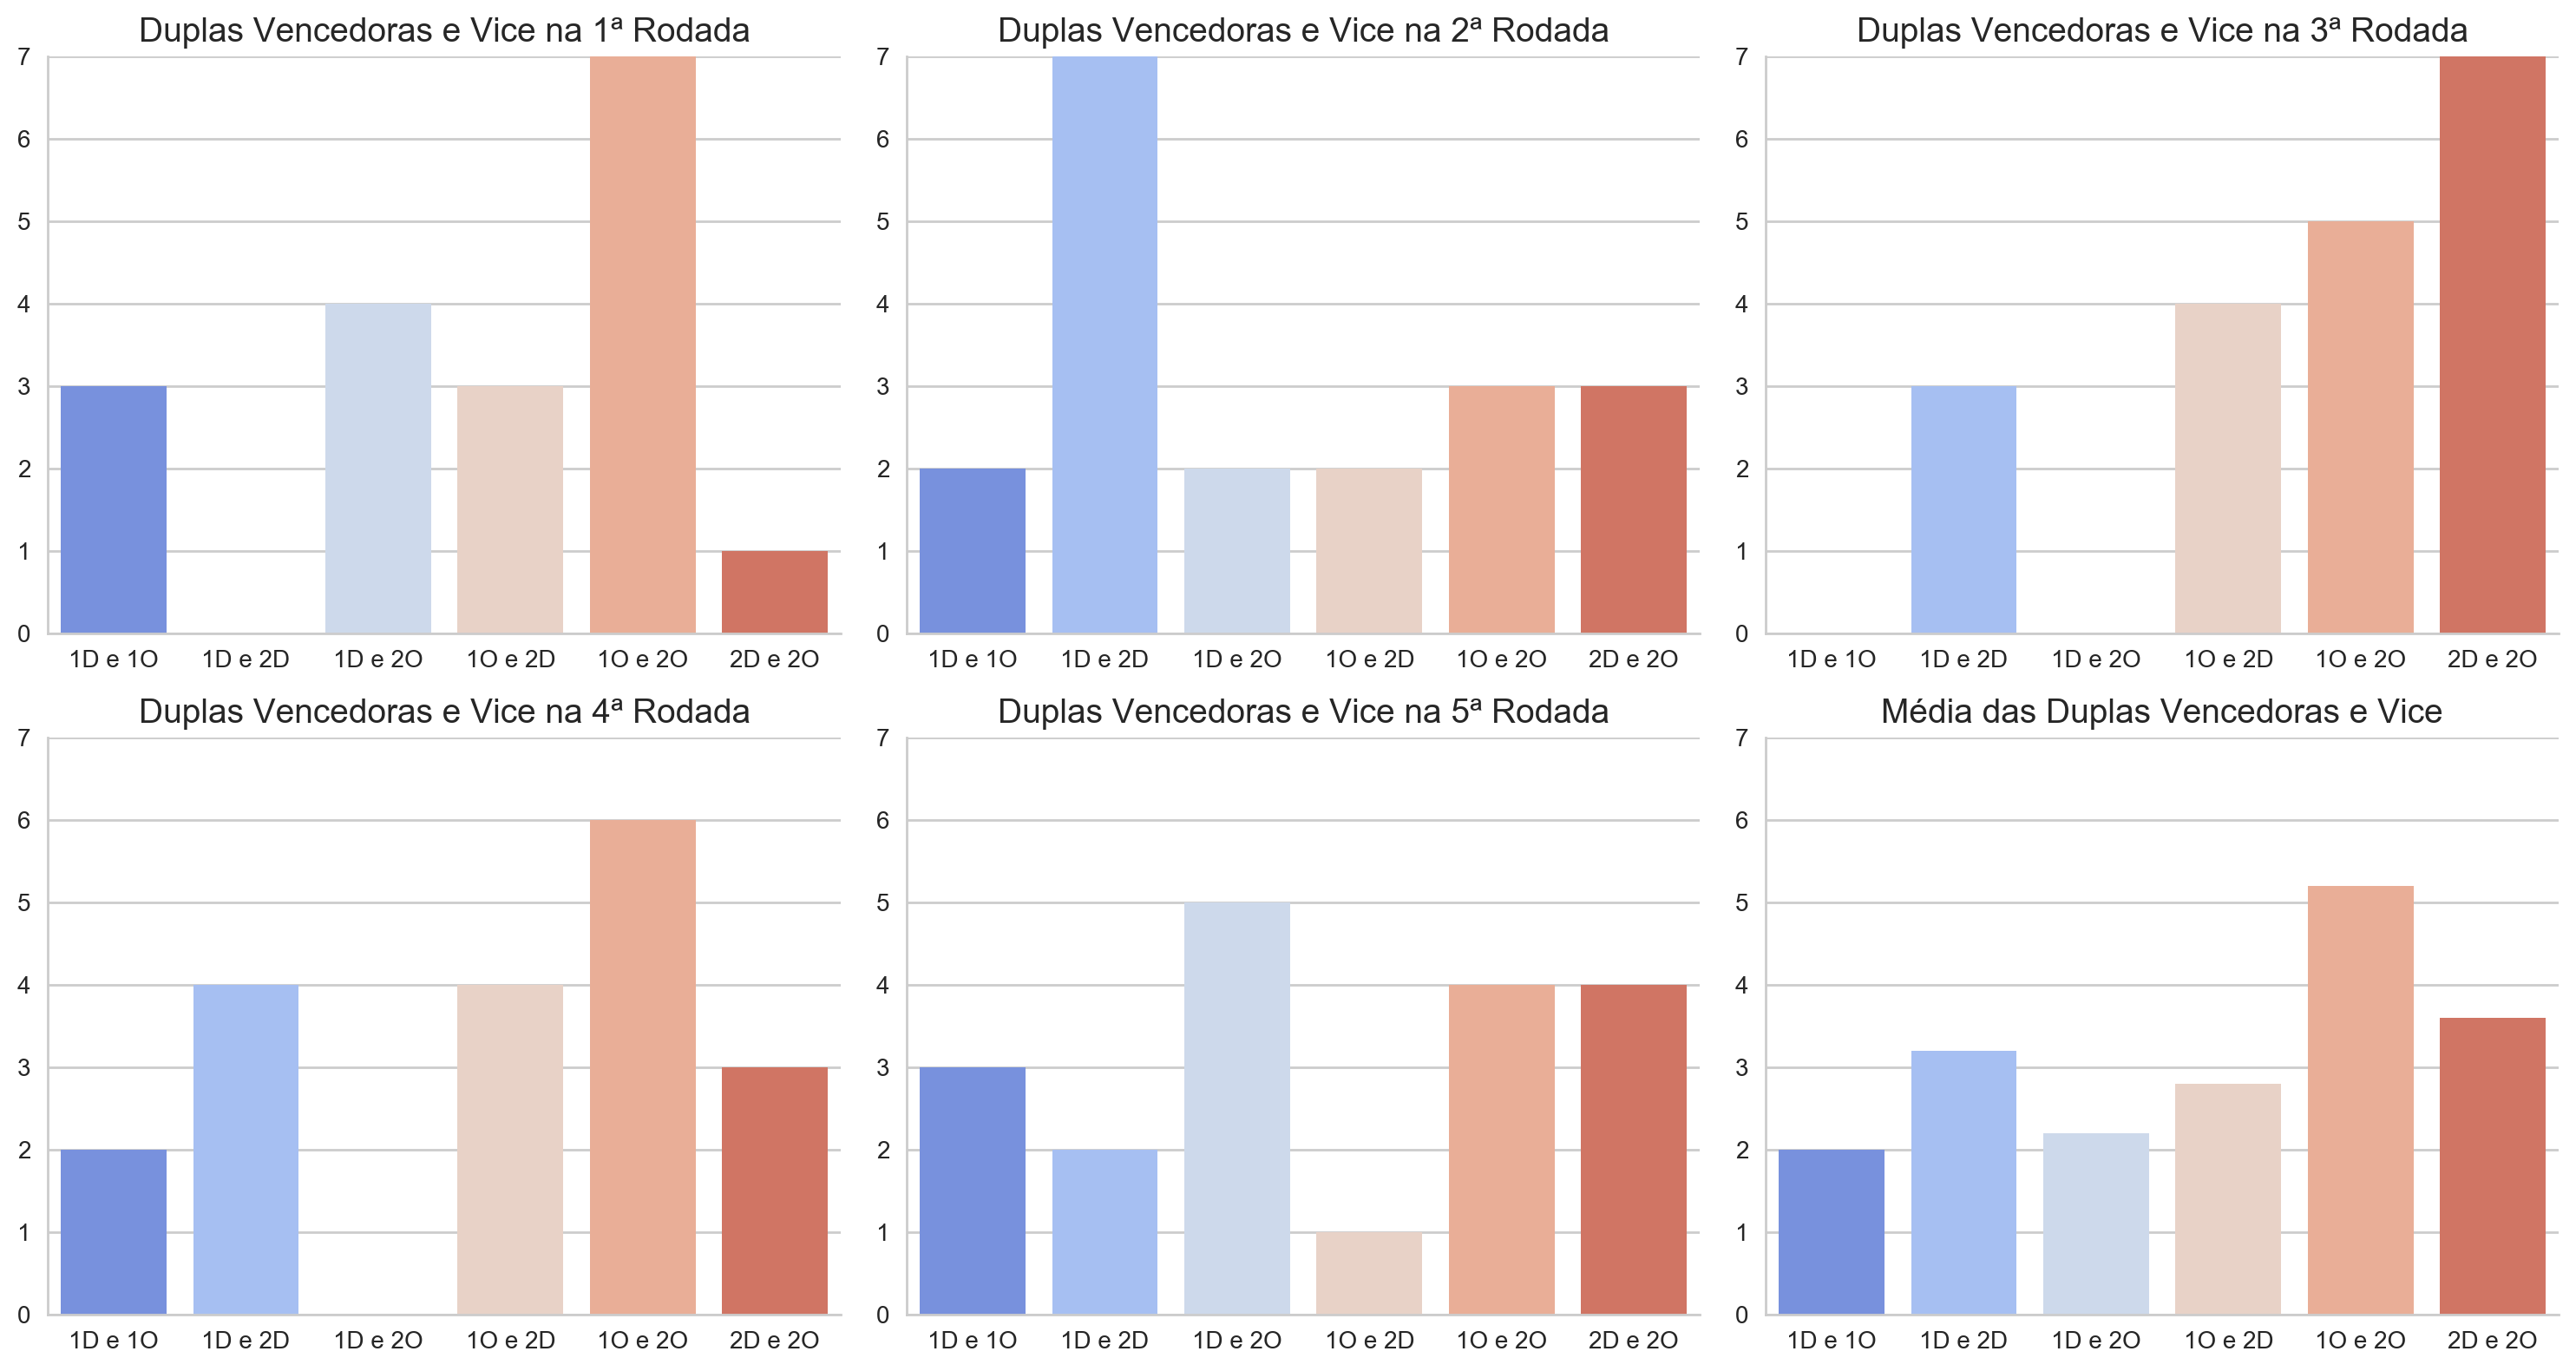

In [9]:
qtd=0
std1=[]
std2=[]
std3=[]
std4=[]
std5=[]
std6=[]
plt.figure(figsize=(15,8),dpi=200)
posicao_classificatorias_vencedores_vices=[]
for key,value in {'Ponto1':['1ª Rodada','Sala1'],'Ponto2':['2ª Rodada','Sala2'],'Ponto3':['3ª Rodada','Sala3'],'Ponto4':['4ª Rodada','Sala4'],'Ponto5':['5ª Rodada','Sala5']}.items():
    posicao_vencedores_vices=[]
    for sala in list(set(vopen[value[1]])):
        vencedoras_rodada=list(set(vopen[(vopen[key]==4)&(vopen[value[1]]==sala)]['ID'].tolist()))
        vices_rodada=list(set(vopen[(vopen[key]==3)&(vopen[value[1]]==sala)]['ID'].tolist()))
        for posicao in ['1D','1O','2D','2O']:
            if (vopen[(vopen[posicao]==vencedoras_rodada[0])&(vopen['Rodada']==value[0])][posicao]==vencedoras_rodada[0]).any()==True:
                posicao_vencedora=posicao
            if (vopen[(vopen[posicao]==vices_rodada[0])&(vopen['Rodada']==value[0])][posicao]==vices_rodada[0]).any()==True:
                posicao_vice=posicao
        posicao_vencedores_vices.append([value[0],sala,posicao_vencedora+' e '+posicao_vice])
        posicao_classificatorias_vencedores_vices.append([value[0],sala,posicao_vencedora+' e '+posicao_vice])
    df2=pd.DataFrame(posicao_vencedores_vices,columns=['Rodada','Sala','Duplas Vencedoras e Vice na mesma sala'])
    df2.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
    df2.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
    df2.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
    df2.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
    df2.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
    df2.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
    qtd+=1
    plt.subplot(2,3,qtd)
    a=sns.countplot(x='Duplas Vencedoras e Vice na mesma sala',data=df2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
    a.set_ylim([0,7])
    a.set_title('Duplas Vencedoras e Vice na '+value[0],fontsize=14)
    a.set(ylabel='',xlabel='')
    std1.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1D e 1O')].count().iloc[0]-2.0)**2)
    std2.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1D e 2D')].count().iloc[0]-3.2)**2)
    std3.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1D e 2O')].count().iloc[0]-2.2)**2)
    std4.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1O e 2D')].count().iloc[0]-2.8)**2)
    std5.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1O e 2O')].count().iloc[0]-5.2)**2)
    std6.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='2D e 2O')].count().iloc[0]-3.6)**2)
std1=(sum(std1)/5)**(1/2)
std2=(sum(std2)/5)**(1/2)
std3=(sum(std3)/5)**(1/2)
std4=(sum(std4)/5)**(1/2)
std5=(sum(std5)/5)**(1/2)
std6=(sum(std6)/5)**(1/2)
std=[['1D e 1O',std1],['1D e 2D',std2],['1D e 2O',std3],['1O e 2D',std4],['1O e 2O',std5],['2D e 2O',std6]]
std_2=pd.DataFrame(std,columns=['Duplas Vencedoras e Vice na mesma sala','Desvio Padrão'])
df2=pd.DataFrame(posicao_classificatorias_vencedores_vices,columns=['Rodada','Sala','Duplas Vencedoras e Vice na mesma sala'])
df2.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
df2.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
df2.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
df2.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
df2.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
df2.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
media_2=df2.groupby('Duplas Vencedoras e Vice na mesma sala').count()/5
media_2['Duplas Vencedoras e Vice na mesma sala']=media_2.index
plt.subplot(2,3,6)
a=sns.barplot(x='Duplas Vencedoras e Vice na mesma sala',y='Rodada',data=media_2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,7])
a.set_title('Média das Duplas Vencedoras e Vice',fontsize=14)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

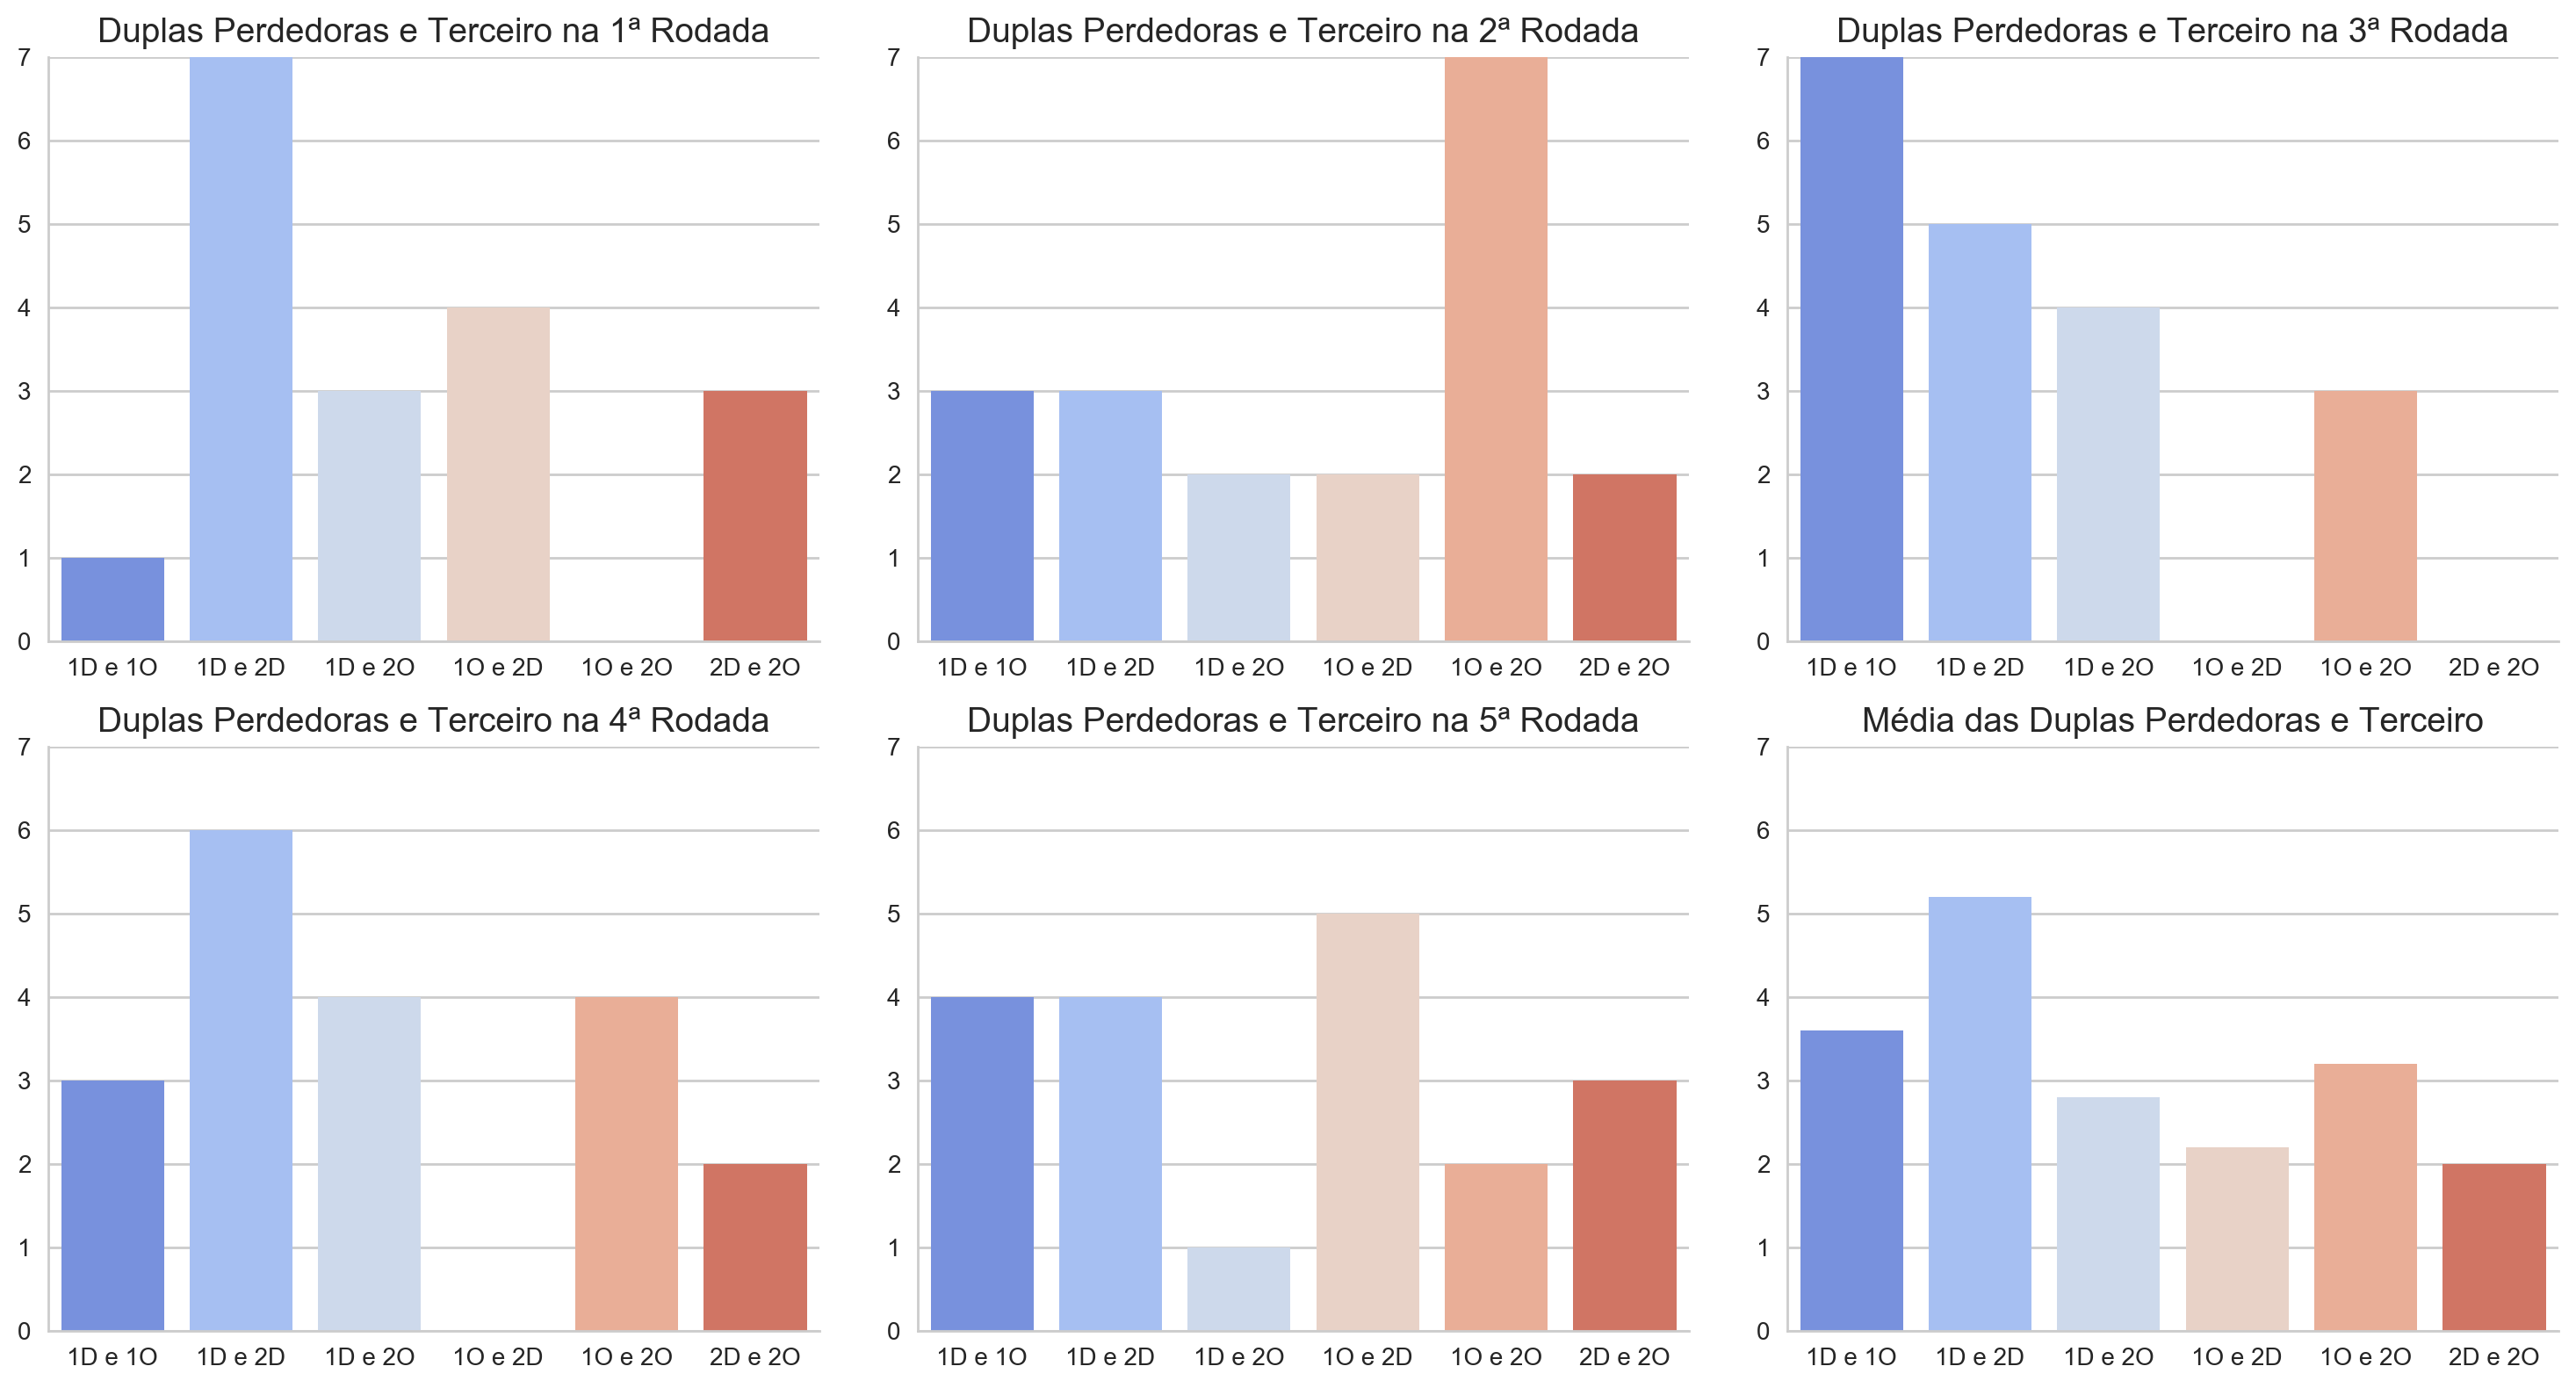

In [10]:
qtd=0
std1=[]
std2=[]
std3=[]
std4=[]
std5=[]
std6=[]
plt.figure(figsize=(15,8),dpi=200)
posicao_classificatorias_terceiros_perdedoras=[]
for key,value in {'Ponto1':['1ª Rodada','Sala1'],'Ponto2':['2ª Rodada','Sala2'],'Ponto3':['3ª Rodada','Sala3'],'Ponto4':['4ª Rodada','Sala4'],'Ponto5':['5ª Rodada','Sala5']}.items():
    posicao_terceiros_perdedoras=[]
    for sala in list(set(vopen[value[1]])):
        terceiros_rodada=list(set(vopen[(vopen[key]==2)&(vopen[value[1]]==sala)]['ID'].tolist()))
        perdedoras_rodada=list(set(vopen[(vopen[key]==1)&(vopen[value[1]]==sala)]['ID'].tolist()))
        for posicao in ['1D','1O','2D','2O']:
            if (vopen[(vopen[posicao]==terceiros_rodada[0])&(vopen['Rodada']==value[0])][posicao]==terceiros_rodada[0]).any()==True:
                posicao_terceiro=posicao
            if (vopen[(vopen[posicao]==perdedoras_rodada[0])&(vopen['Rodada']==value[0])][posicao]==perdedoras_rodada[0]).any()==True:
                posicao_perdedora=posicao
        #print('Na sala',sala,'da',value[0],'a dupla',terceiros_rodada[0],'tirou terceiro e estava na',posicao_terceiro,'e a dupla',perdedoras_rodada[0],'perdeu e estava na',posicao_perdedora)
        posicao_terceiros_perdedoras.append([value[0],sala,posicao_terceiro+' e '+posicao_perdedora])
        posicao_classificatorias_terceiros_perdedoras.append([value[0],sala,posicao_terceiro+' e '+posicao_perdedora])
    df3=pd.DataFrame(posicao_terceiros_perdedoras,columns=['Rodada','Sala','Duplas Perdedoras e Terceiro na mesma sala'])
    df3.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
    df3.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
    df3.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
    df3.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
    df3.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
    df3.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
    qtd+=1
    plt.subplot(2,3,qtd)
    a=sns.countplot(x='Duplas Perdedoras e Terceiro na mesma sala',data=df3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
    a.set_ylim([0,7])
    a.set_title('Duplas Perdedoras e Terceiro na '+value[0],fontsize=14)
    a.set(ylabel='',xlabel='')
    std1.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1D e 1O')].count().iloc[0]-3.6)**2)
    std2.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1D e 2D')].count().iloc[0]-5.2)**2)
    std3.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1D e 2O')].count().iloc[0]-2.8)**2)
    std4.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1O e 2D')].count().iloc[0]-2.2)**2)
    std5.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1O e 2O')].count().iloc[0]-3.2)**2)
    std6.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='2D e 2O')].count().iloc[0]-2.0)**2)
std1=(sum(std1)/5)**(1/2)
std2=(sum(std2)/5)**(1/2)
std3=(sum(std3)/5)**(1/2)
std4=(sum(std4)/5)**(1/2)
std5=(sum(std5)/5)**(1/2)
std6=(sum(std6)/5)**(1/2)
std=[['1D e 1O',std1],['1D e 2D',std2],['1D e 2O',std3],['1O e 2D',std4],['1O e 2O',std5],['2D e 2O',std6]]
std_3=pd.DataFrame(std,columns=['Duplas Perdedoras e Terceiro na mesma sala','Desvio Padrão'])    
df3=pd.DataFrame(posicao_classificatorias_terceiros_perdedoras,columns=['Rodada','Sala','Duplas Perdedoras e Terceiro na mesma sala'])
df3.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
df3.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
df3.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
df3.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
df3.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
df3.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
media_3=df3.groupby('Duplas Perdedoras e Terceiro na mesma sala').count()/5
media_3['Duplas Perdedoras e Terceiro na mesma sala']=media_3.index
plt.subplot(2,3,6)
a=sns.barplot(x='Duplas Perdedoras e Terceiro na mesma sala',y='Rodada',data=media_3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,7])
a.set_title('Média das Duplas Perdedoras e Terceiro',fontsize=14)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Agregando:

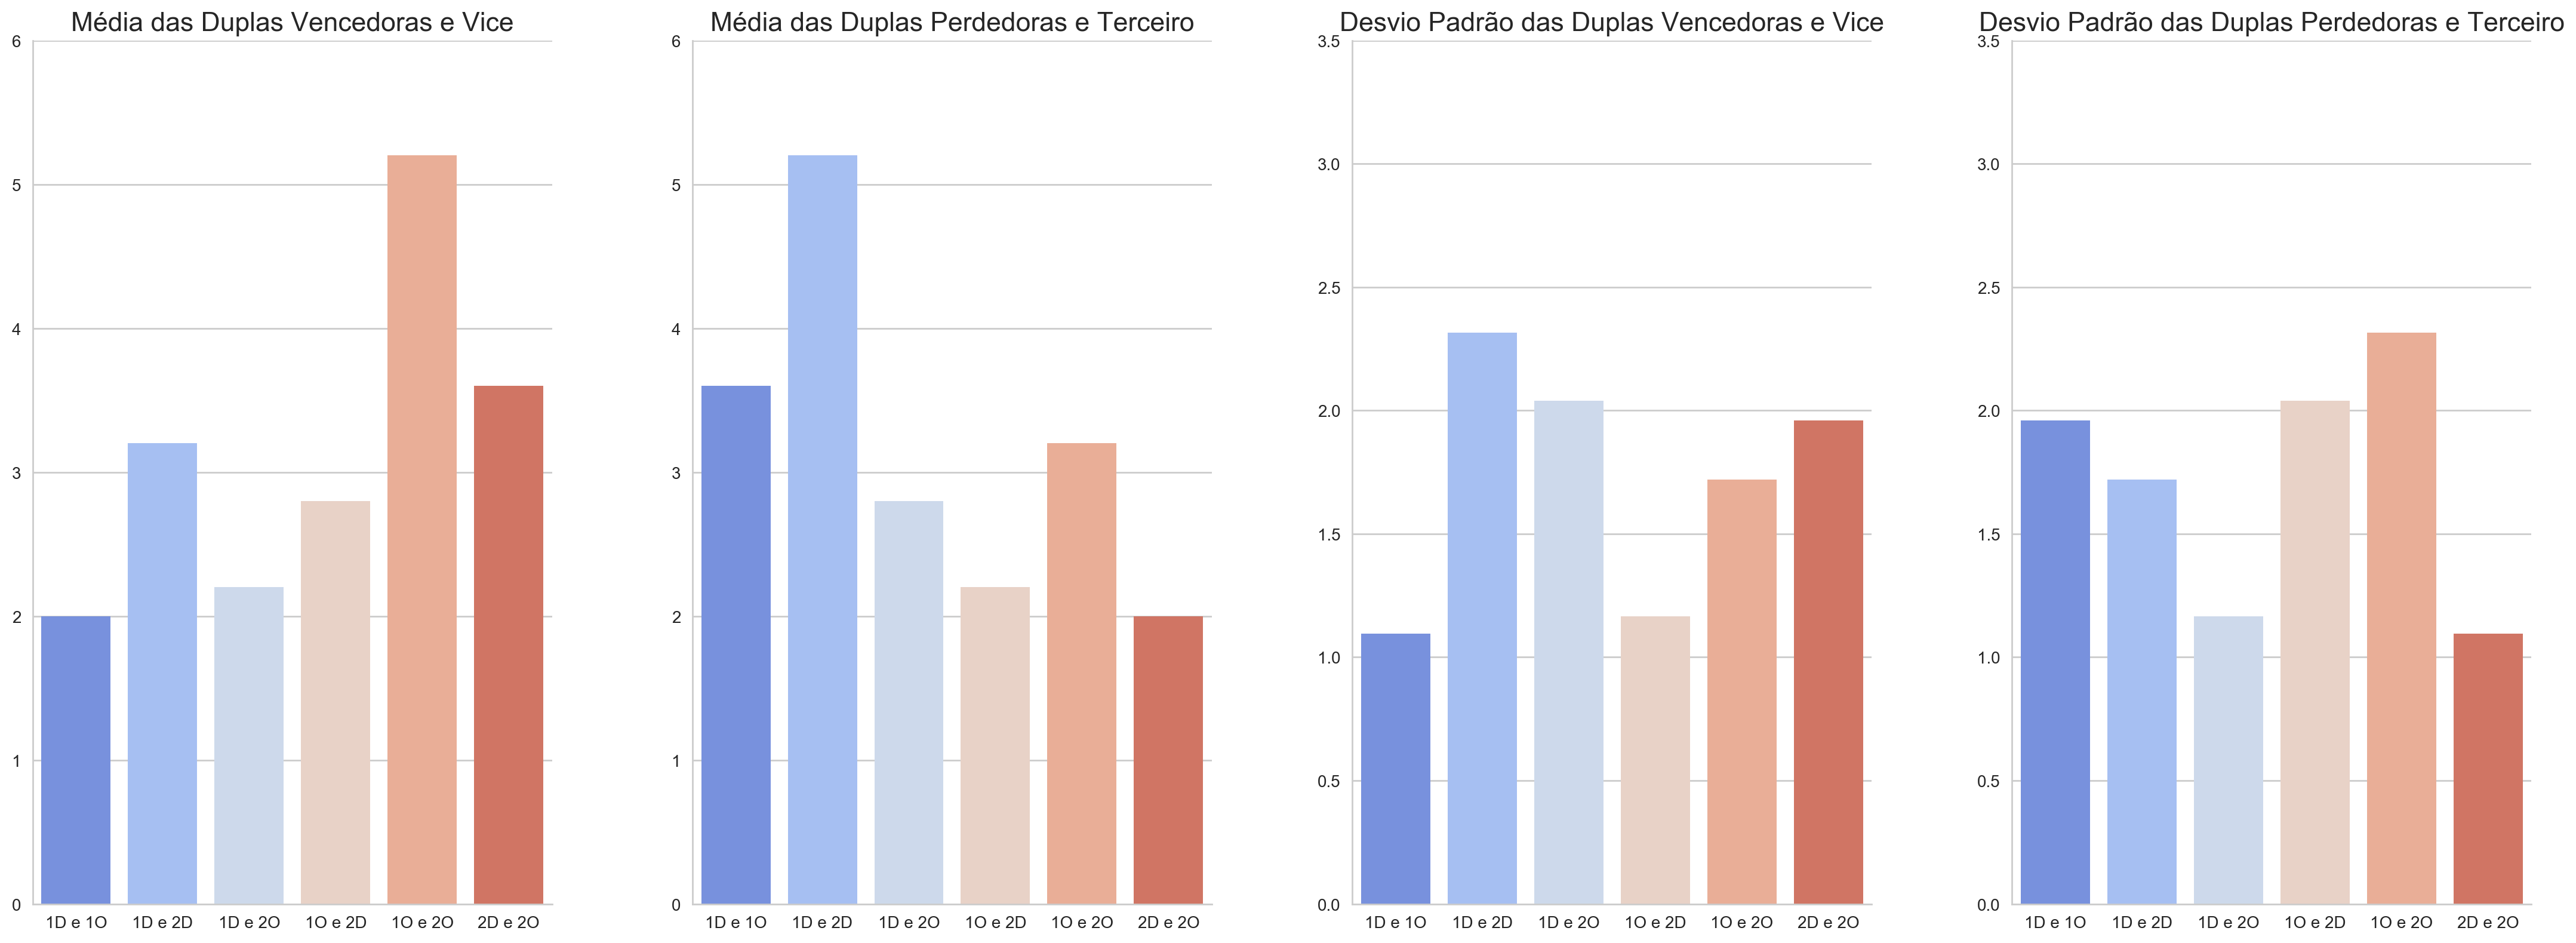

In [11]:
plt.figure(figsize=(22,8),dpi=200)
plt.subplot(1,4,1)
a=sns.barplot(x='Duplas Vencedoras e Vice na mesma sala',y='Rodada',data=media_2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,6])
a.set_title('Média das Duplas Vencedoras e Vice',fontsize=16)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,2)
a=sns.barplot(x='Duplas Perdedoras e Terceiro na mesma sala',y='Rodada',data=media_3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,6])
a.set_title('Média das Duplas Perdedoras e Terceiro',fontsize=16)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,3)
a=sns.barplot(x='Duplas Vencedoras e Vice na mesma sala',y='Desvio Padrão',data=std_2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão das Duplas Vencedoras e Vice',fontsize=16)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,4)
a=sns.barplot(x='Duplas Perdedoras e Terceiro na mesma sala',y='Desvio Padrão',data=std_3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão das Duplas Perdedoras e Terceiro',fontsize=16)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

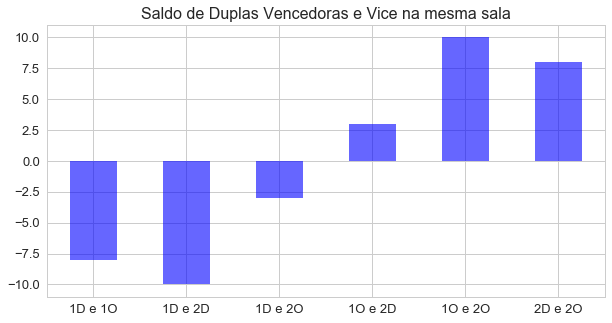

In [12]:
df4=(df2.groupby('Duplas Vencedoras e Vice na mesma sala').count()['Rodada']-df3.groupby('Duplas Perdedoras e Terceiro na mesma sala').count()['Rodada'])
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.tick_params(labelsize=13)
ax.set_title('Saldo de Duplas Vencedoras e Vice na mesma sala',fontsize=16)
df4.plot(kind='bar',rot=360,color='blue',alpha=0.6).set(xlabel='')
plt.show()

Para a 1D, o melhor cartel é com a 2O

Para a 1O, o melhor cartel é com a 2O (em muito!)

Para a 2D, o melhor cartel é com a 2O

Para a 2O, o melhor cartel é com a 1O (em muito!)

O carte da oposição é muito melhor que o da defesa

O cartel da segunda metade é muito melhor que o da primeira

O carte da diagonal curta é ligeiramente melhor que o da longa

Dado que a melhor escolha pra 1O é cartelizar com 2O (e vice-versa), estas duplas sempre farão cartel entre si

## Notas Individuais (ou Speaker Points - SPs)

In [178]:
speaks=vopen.drop(columns=['ID','SD','Ponto1','Ponto2','Ponto3','Ponto4','Ponto5','Sala1','Sala2','Sala3','Sala4','Sala5','Pontuação','Dificuldade','Nota Final','Rodada','1D','1O','2D','2O'])
speaks.set_index('Nome',inplace=True)
speaks.head()

Nota1  Nota2  Nota3  Nota4  Nota5
Nome                                                 
Arthur Gandra          80     73     82     69     82
Luísa Côrtes           72     77     78     83     76
João Lucas Lopes       72     75     83     83     72
Pedro Lopes            79     71     84     71     78
Carolina Marcondes     80     70     83     80     70

#### Adicionando a Nota Final e removendo notas nulas:

In [179]:
spks=vopen.drop(columns=['ID','SD','Ponto1','Ponto2','Ponto3','Ponto4','Ponto5','Sala1','Sala2','Sala3','Sala4','Sala5','Pontuação','Dificuldade','Rodada','1D','1O','2D','2O'])
spks.set_index('Nome',inplace=True)
spks=spks[(spks!=0).all(1)]
spks.head()

Nota1  Nota2  Nota3  Nota4  Nota5  Nota Final
Nome                                                             
Arthur Gandra          80     73     82     69     82        77.2
Luísa Côrtes           72     77     78     83     76        77.2
João Lucas Lopes       72     75     83     83     72        77.0
Pedro Lopes            79     71     84     71     78        76.6
Carolina Marcondes     80     70     83     80     70        76.6

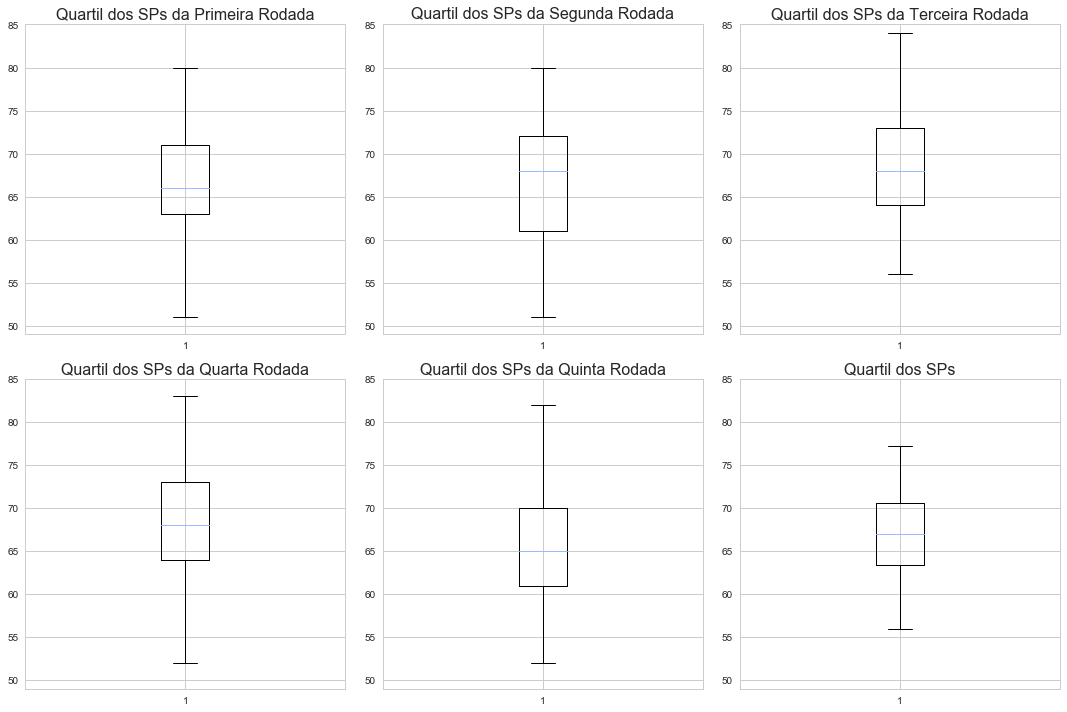

In [16]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
ax[0][0].set_title('Quartil dos SPs da Primeira Rodada',fontsize=16)
ax[0][0].boxplot(spks['Nota1'])
ax[0][0].set_ylim([49,85])
ax[0][1].set_title('Quartil dos SPs da Segunda Rodada',fontsize=16)
ax[0][1].boxplot(spks['Nota2'])
ax[0][1].set_ylim([49,85])
ax[0][2].set_title('Quartil dos SPs da Terceira Rodada',fontsize=16)
ax[0][2].boxplot(spks['Nota3'])
ax[0][2].set_ylim([49,85])
ax[1][0].set_title('Quartil dos SPs da Quarta Rodada',fontsize=16)
ax[1][0].boxplot(spks['Nota4'])
ax[1][0].set_ylim([49,85])
ax[1][1].set_title('Quartil dos SPs da Quinta Rodada',fontsize=16)
ax[1][1].boxplot(spks['Nota5'])
ax[1][1].set_ylim([49,85])
ax[1][2].set_title('Quartil dos SPs',fontsize=16)
ax[1][2].boxplot(spks['Nota Final'])
ax[1][2].set_ylim([49,85])
plt.tight_layout()
plt.show()

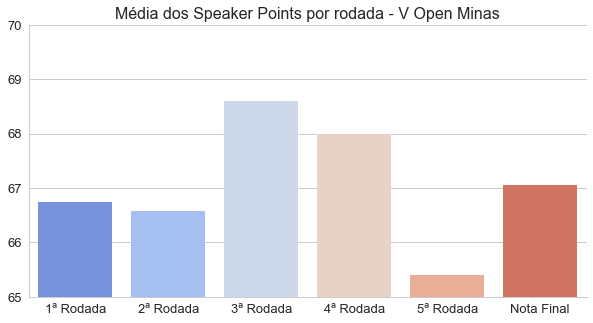

In [17]:
desvio_speaks=[spks.loc[:,'Nota1'].std(),spks.loc[:,'Nota2'].std(),spks.loc[:,'Nota3'].std(),spks.loc[:,'Nota4'].std(),spks.loc[:,'Nota5'].std(),spks.loc[:,'Nota Final'].std()]
arr2=np.array(desvio_speaks)
media_speaks=[spks.loc[:,'Nota1'].mean(),spks.loc[:,'Nota2'].mean(),spks.loc[:,'Nota3'].mean(),spks.loc[:,'Nota4'].mean(),spks.loc[:,'Nota5'].mean(),spks.loc[:,'Nota Final'].mean()]
arr1=np.array(media_speaks)
rodadas=['1ª Rodada','2ª Rodada','3ª Rodada','4ª Rodada','5ª Rodada','Nota Final']
df1=pd.DataFrame({'Rodadas':rodadas,'Média':arr1,'Desvio Padrão':arr2})
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Média dos Speaker Points por rodada - V Open Minas',fontsize=16)
sns.barplot(x='Rodadas',y='Média',data=df1).set_ylim([65,70])
ax.tick_params(labelsize=13)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.show()

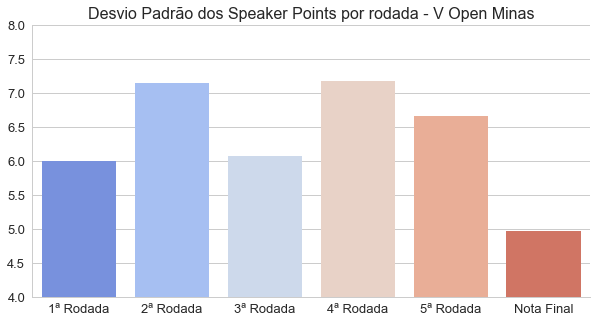

In [111]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Desvio Padrão dos Speaker Points por rodada - V Open Minas',fontsize=16)
sns.barplot(x='Rodadas',y='Desvio Padrão',data=df1).set_ylim([4,8])
ax.tick_params(labelsize=13)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.show()

### Heatmap das Notas Individuais

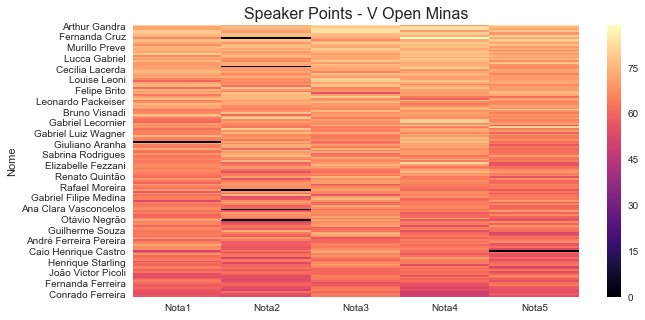

In [19]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Speaker Points - V Open Minas',fontsize=16)
sns.heatmap(speaks,cmap='magma')
plt.show()

#### Mostrando todos os dados:

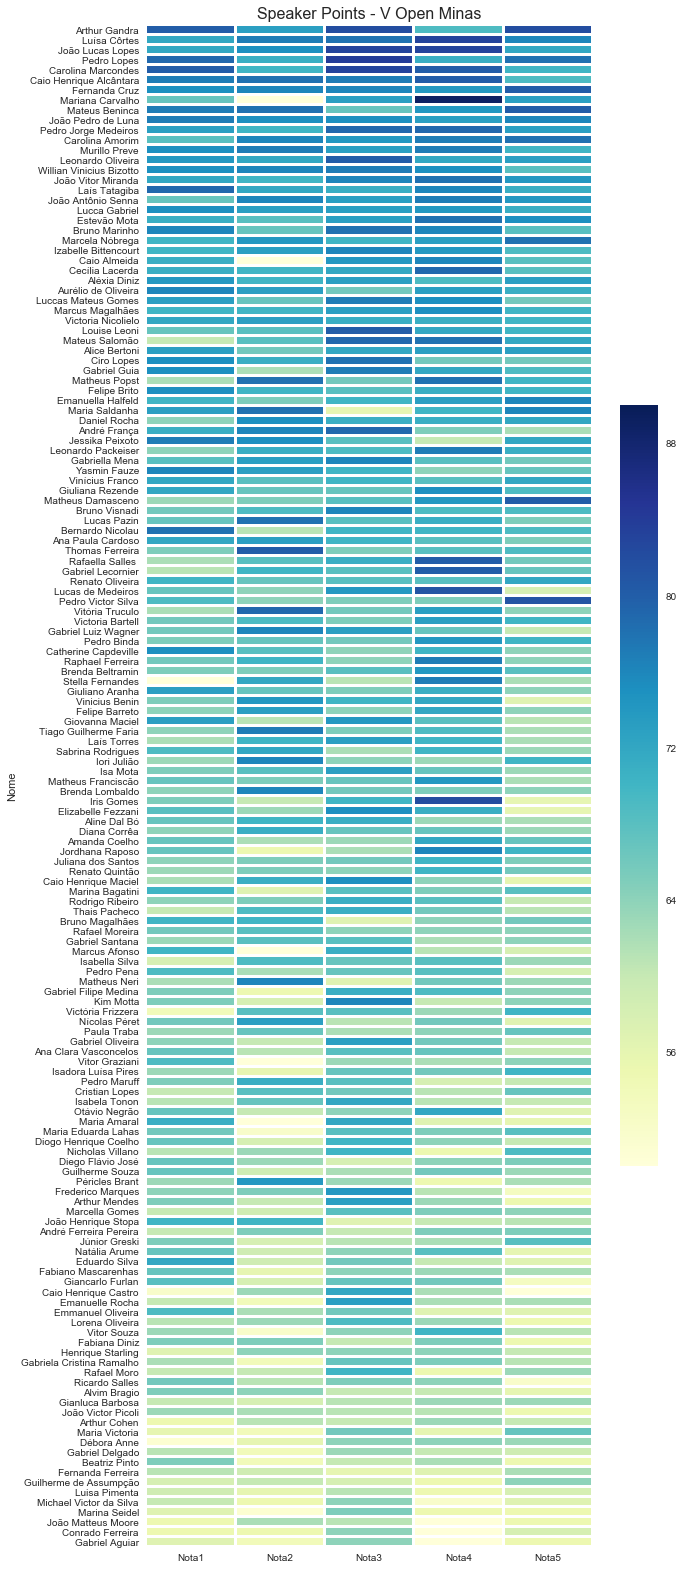

In [20]:
plt.figure(figsize=(10,28))
#plt.figure(figsize=(50,50))
ax=plt.axes()
ax.set_title('Speaker Points - V Open Minas',fontsize=16)
k=sns.heatmap(speaks,cmap='YlGnBu',vmin=50,vmax=90,yticklabels=True,linewidths=2,cbar_kws={"shrink": 0.5})
plt.show()
#plt.savefig("Heatmap_Speaks_V_Open_Minas.pdf",dpi=1000)

#### Uma análise mais detalhada:

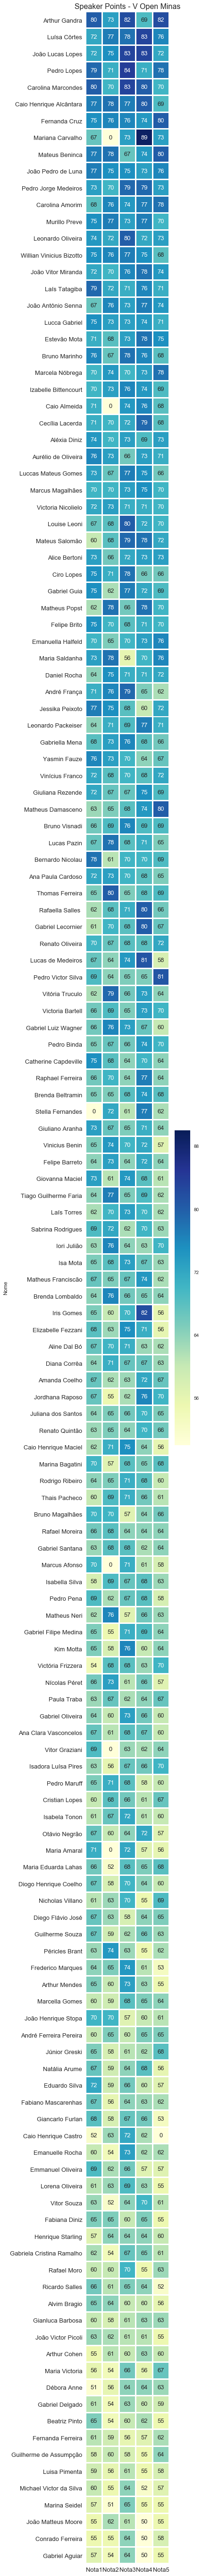

In [188]:
plt.figure(figsize=(5,80))
ax=plt.axes()
ax.set_title('Speaker Points - V Open Minas',fontsize=16)
k=sns.heatmap(speaks,cmap='YlGnBu',vmin=50,vmax=90,yticklabels=True,linewidths=2,square=True,cbar_kws={"shrink": 0.5},annot=True,annot_kws={'fontsize':13})
k.tick_params(labelsize=13)
plt.tight_layout()
#plt.savefig("Heatmap_Speaks_V_Open_Minas(1).pdf",dpi=1000)

### Distribuições das Notas Individuais

In [1]:
#Debugando visualização no Notebook:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import io

def display_figure(fig=None):
    if not fig: fig=plt.gcf();
    buff = io.BytesIO()
    fig.savefig(buff,dpi=500)
    buff.seek(0)
    display(Image(data=buff.getvalue(),width=750))
    plt.close()

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


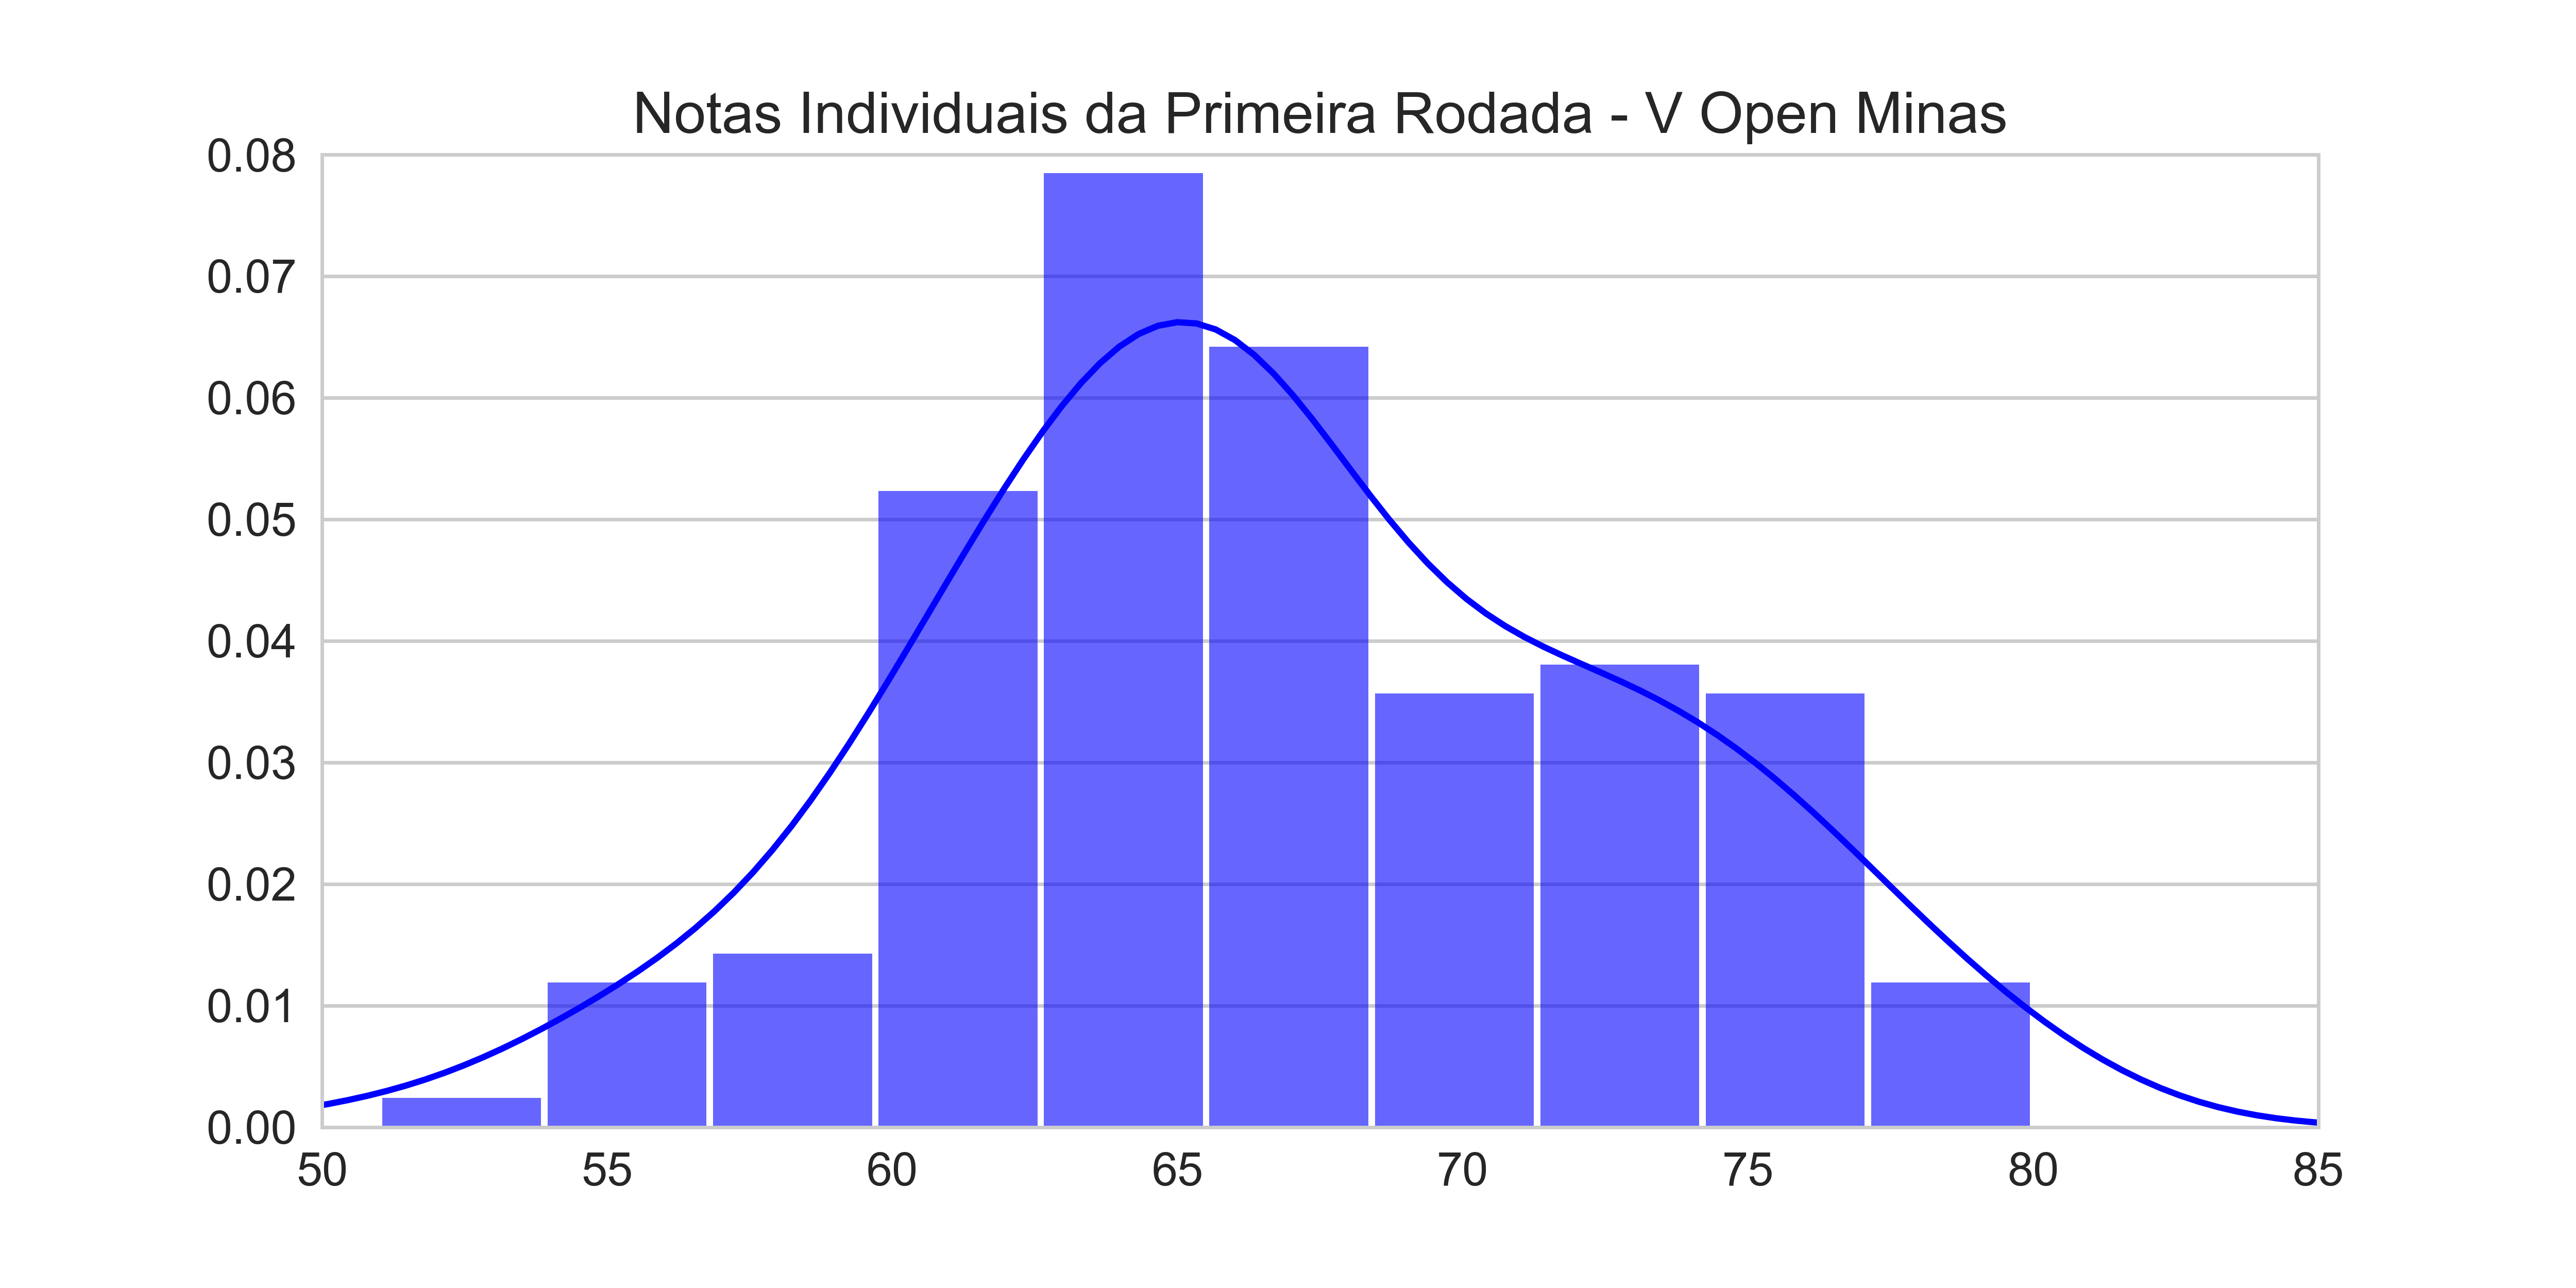

In [23]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota1'],color='blue',hist_kws={'rwidth':0.96,'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Primeira Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
k.grid(axis='x',b=False)
display_figure(plt.gcf())

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


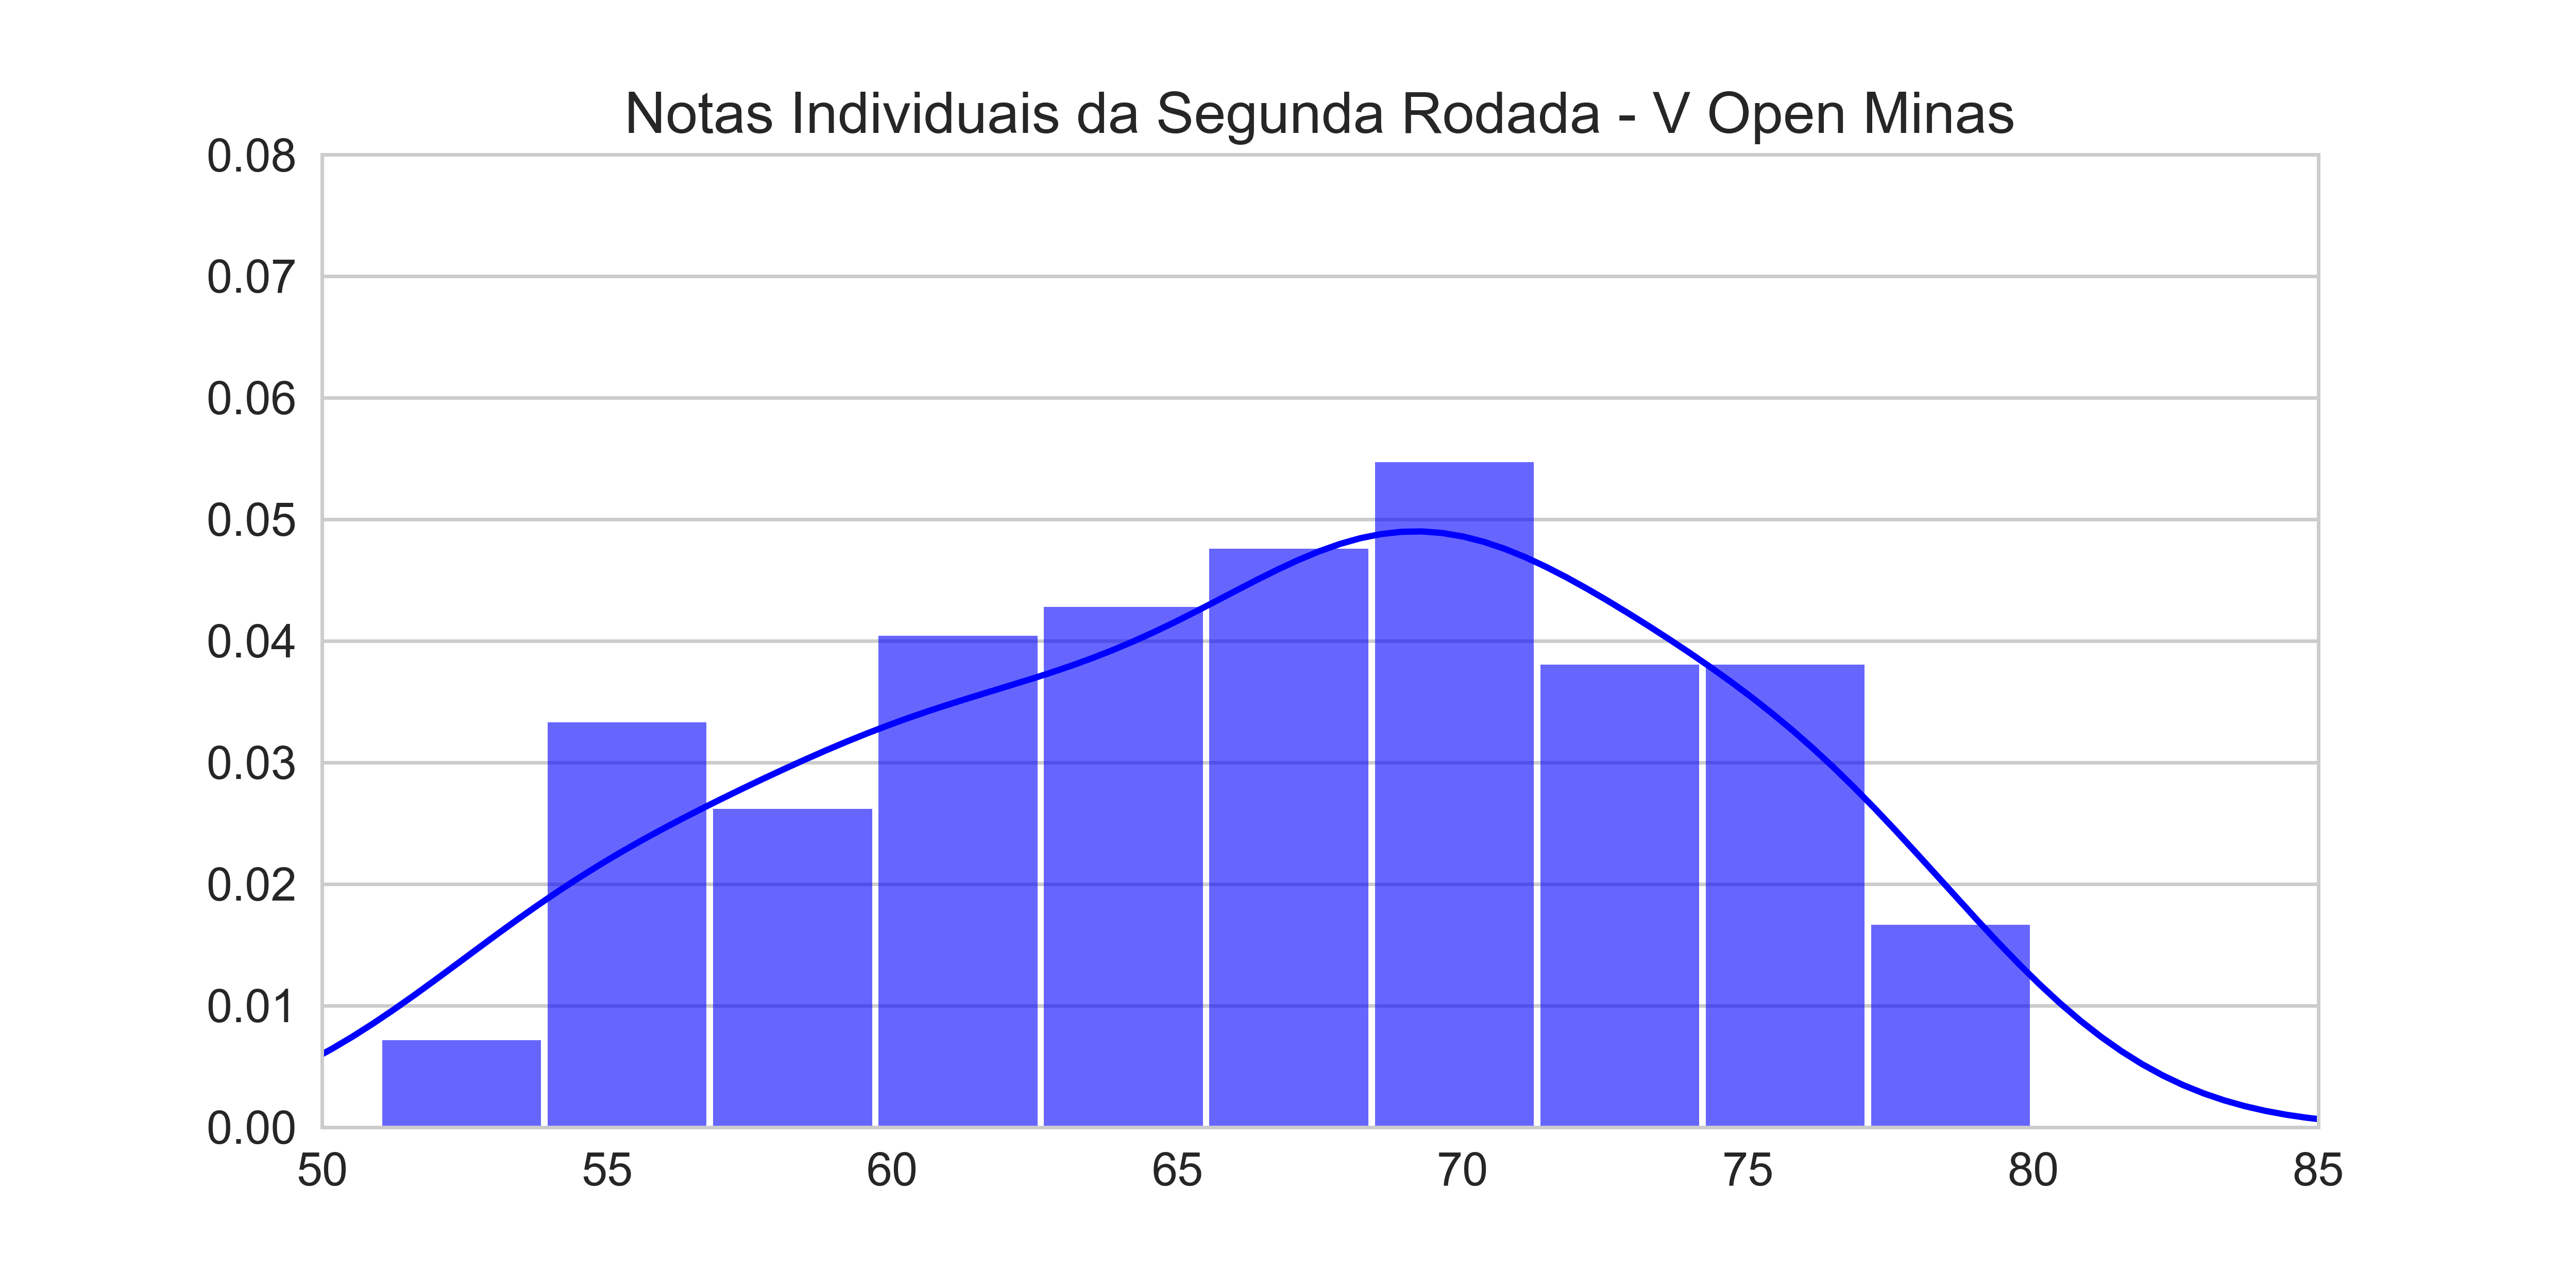

In [24]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota2'],color='blue',hist_kws={'rwidth':0.96,'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Segunda Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
k.grid(axis='x',b=False)
display_figure(plt.gcf())

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


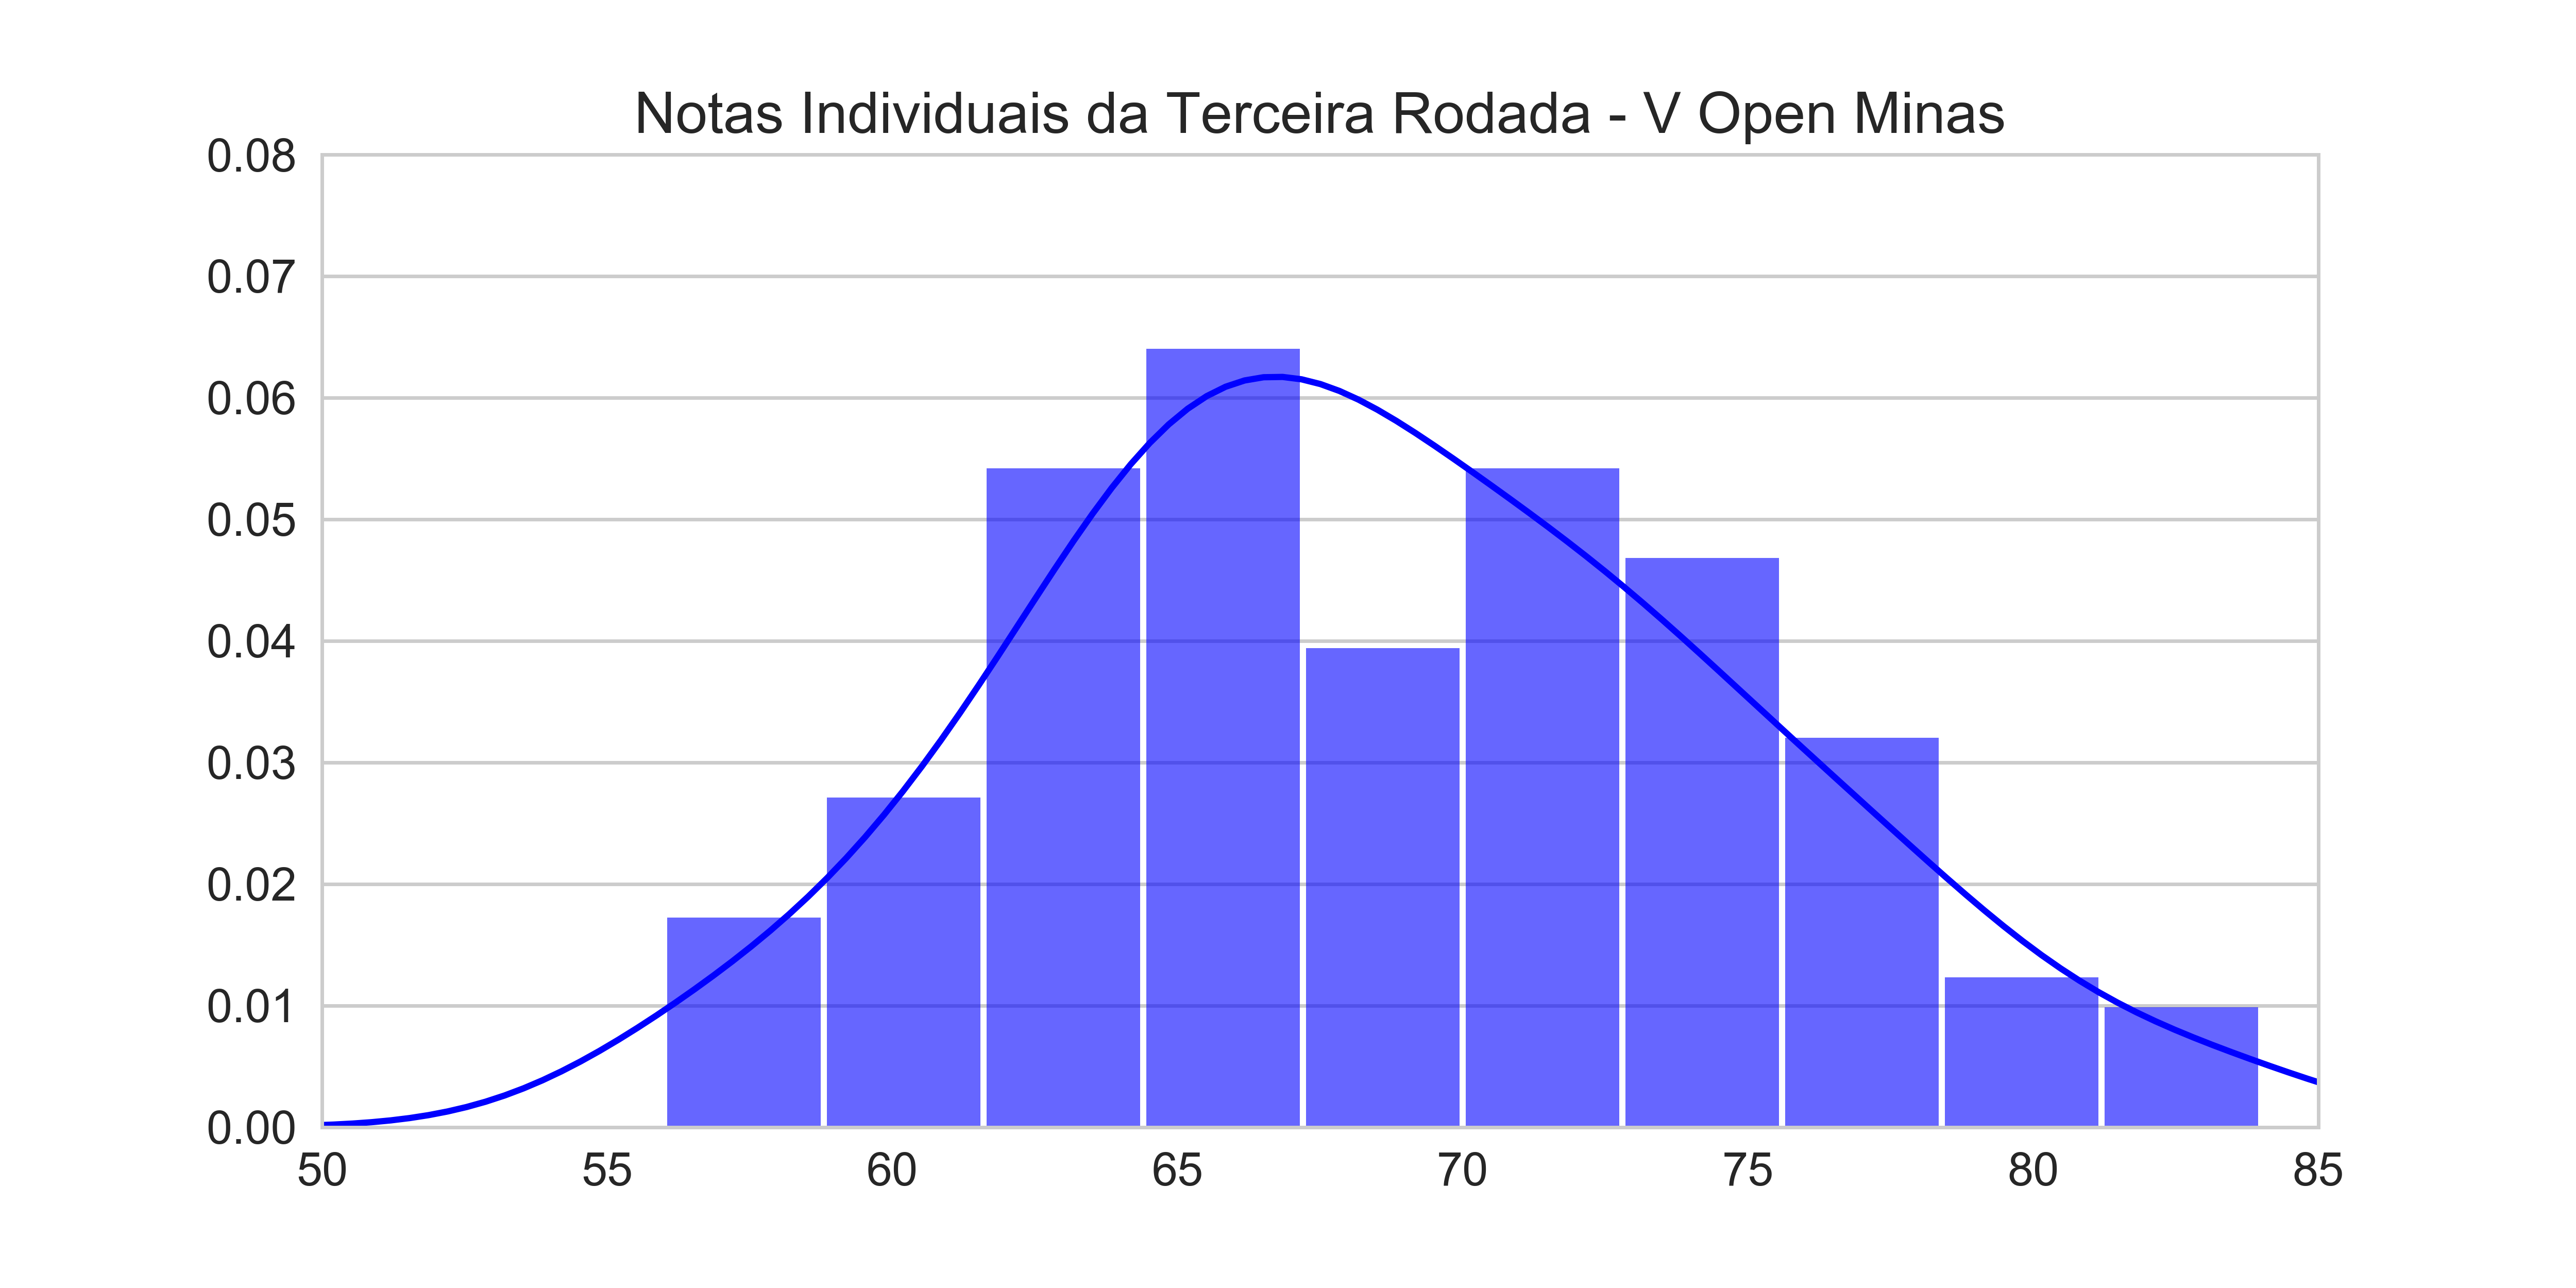

In [25]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota3'],color='blue',hist_kws={'rwidth':0.96,'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Terceira Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
k.grid(axis='x',b=False)
display_figure(plt.gcf())

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


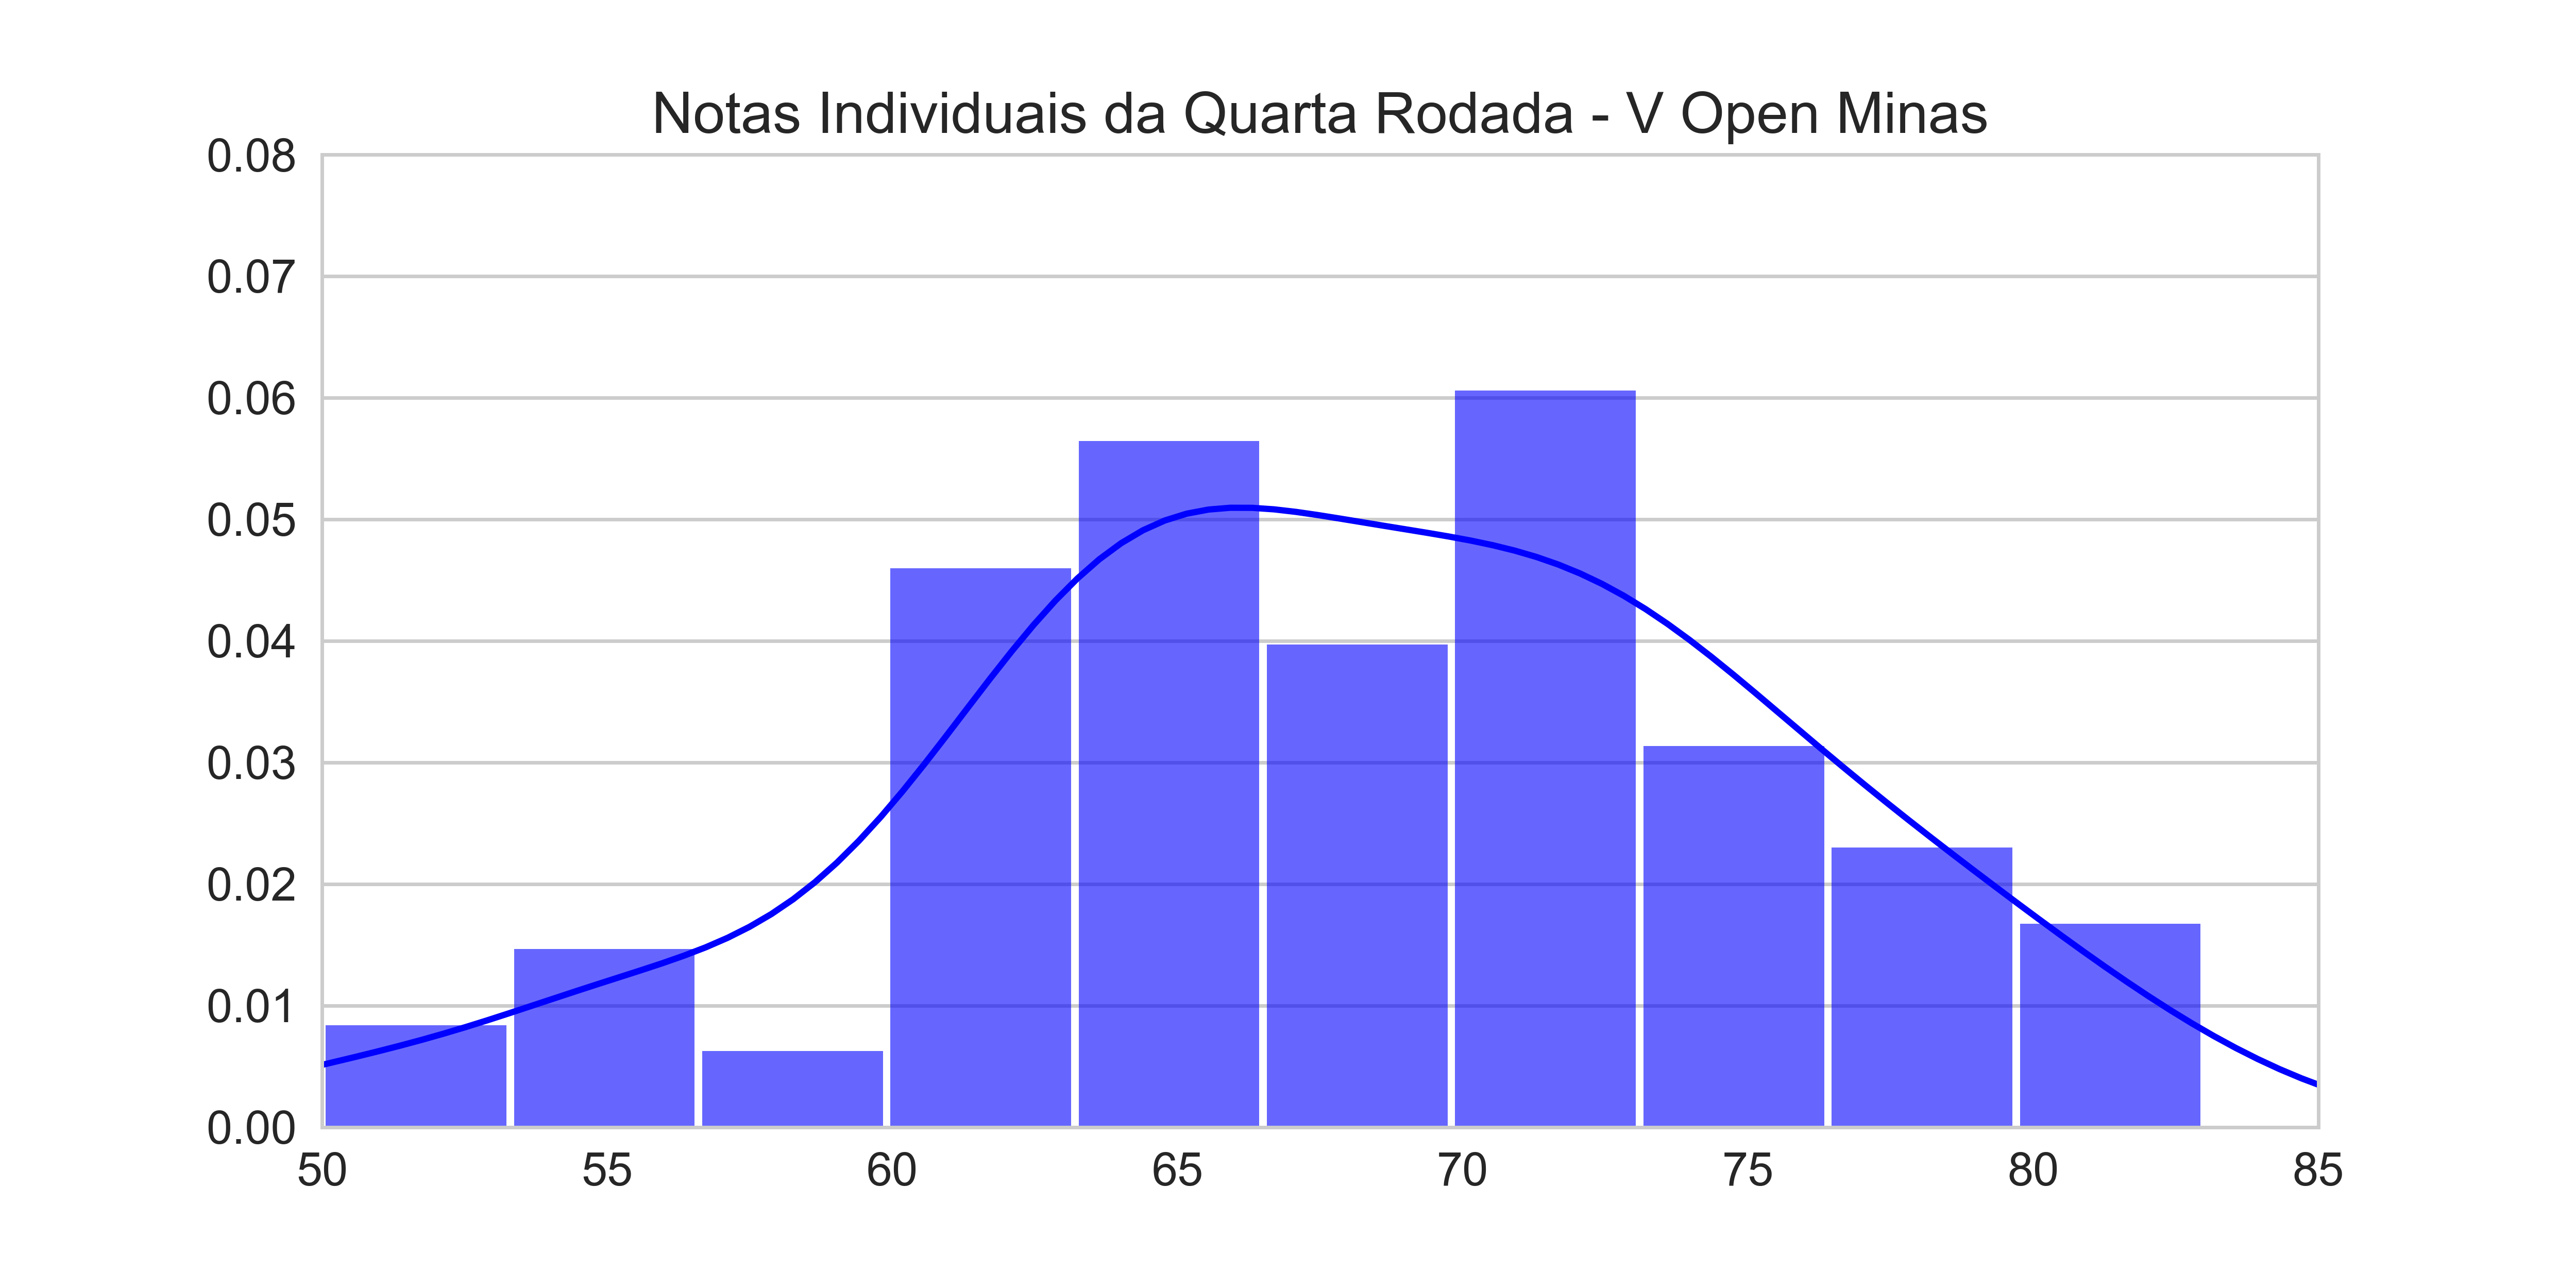

In [26]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota4'],color='blue',hist_kws={'rwidth':0.96,'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Quarta Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
k.grid(axis='x',b=False)
display_figure(plt.gcf())

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


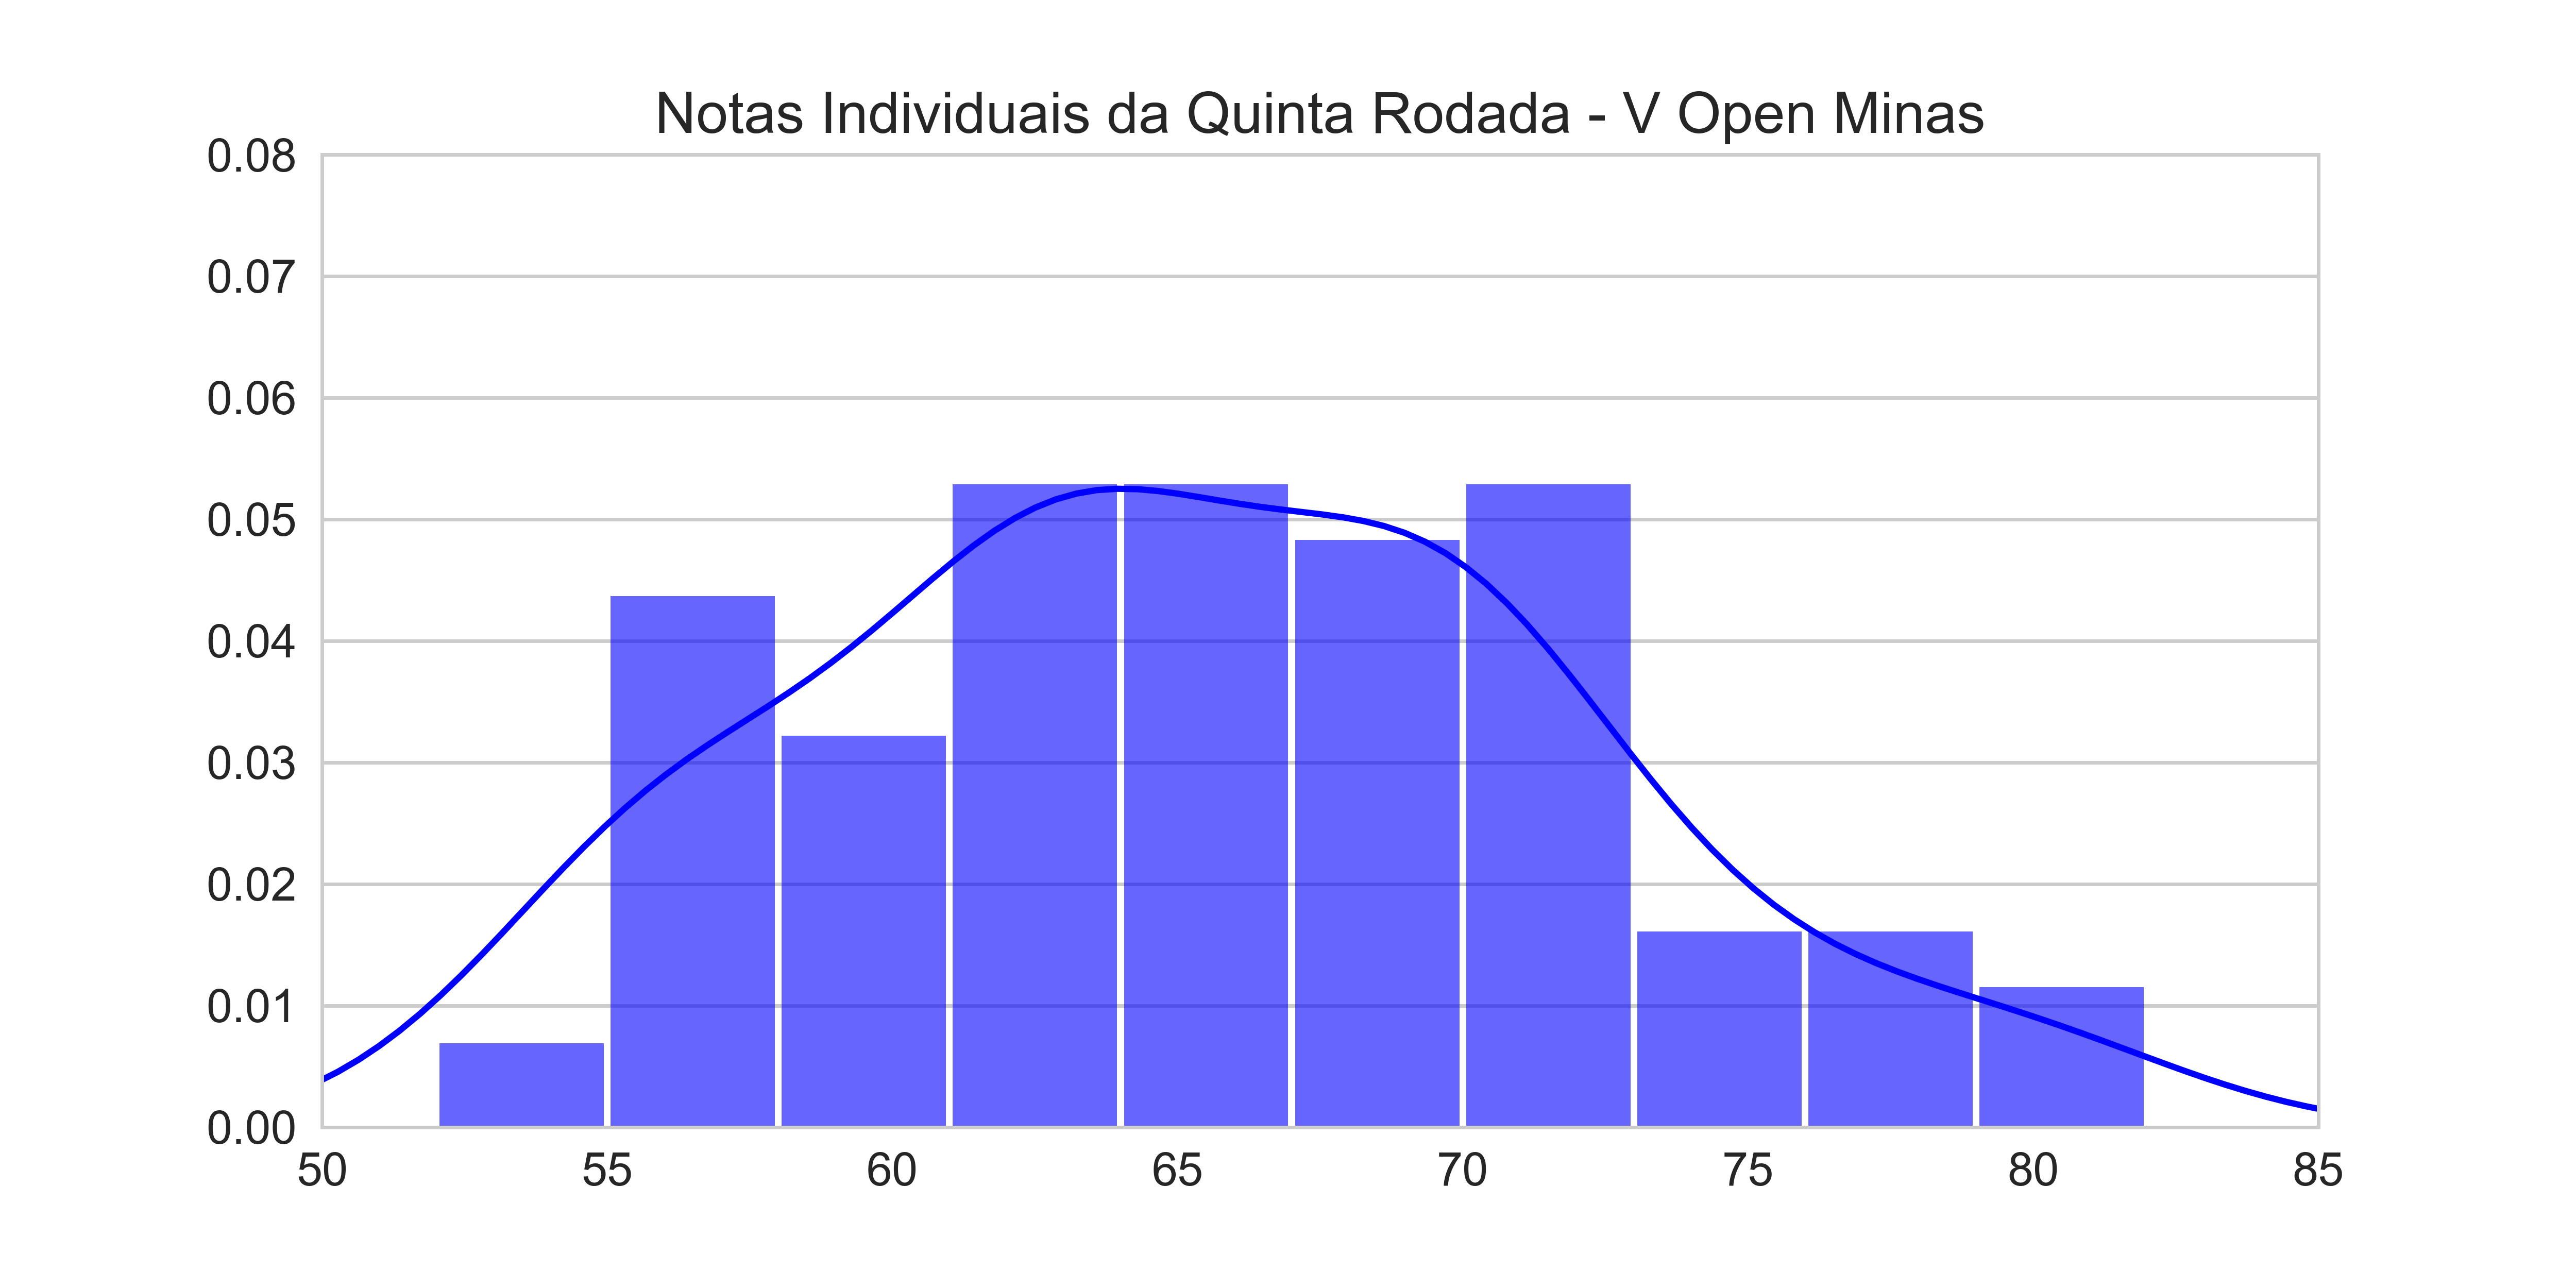

In [27]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota5'],color='blue',hist_kws={'rwidth':0.96,'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Quinta Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
k.grid(axis='x',b=False)
display_figure(plt.gcf())

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


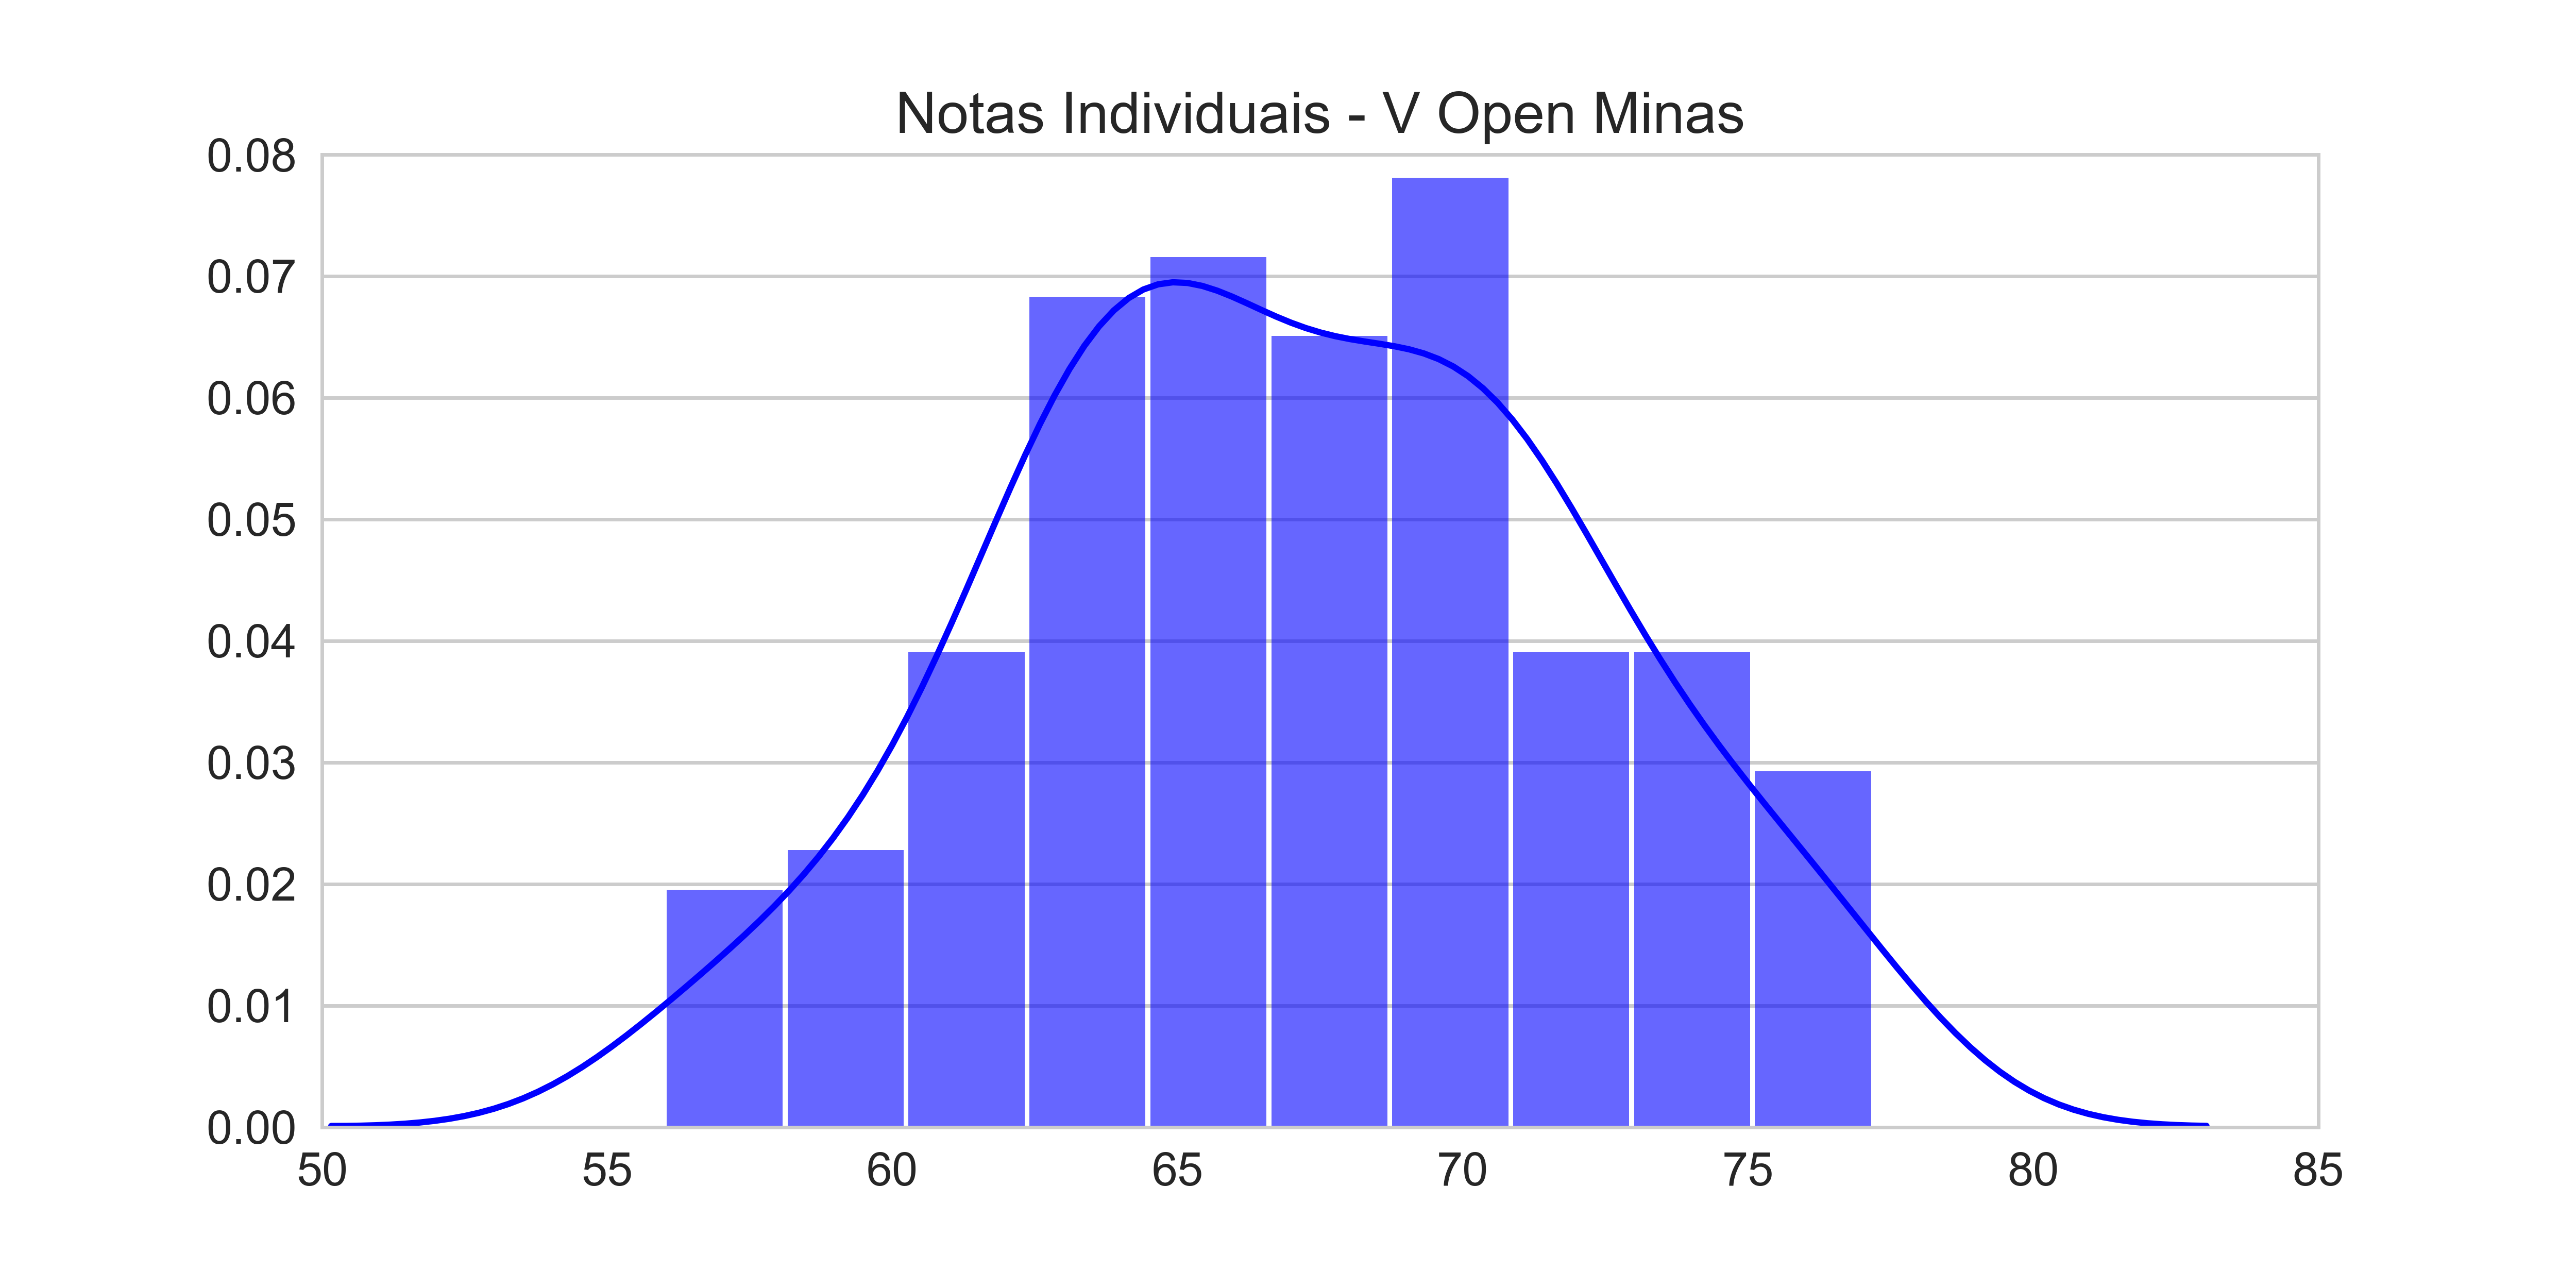

In [28]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota Final'],color='blue',hist_kws={'rwidth':0.96,'alpha':0.6},bins=10)
k.set_title('Notas Individuais - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
k.grid(axis='x',b=False)
display_figure(plt.gcf())

#### Resumindo:

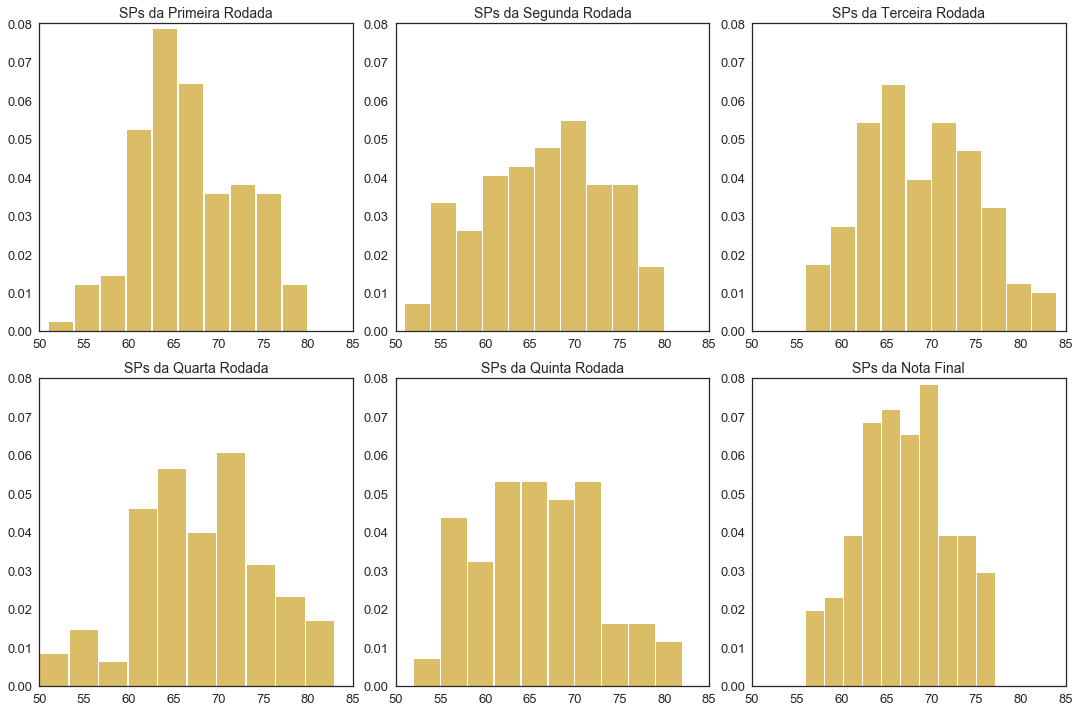

In [88]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
ax[0][0].set_title('SPs da Primeira Rodada',fontsize=14)
ax[0][0].hist(spks['Nota1'],density=True,color='#C49102',alpha=0.6,rwidth=0.95)
ax[0][0].set_xlim([50,85])
ax[0][0].set_ylim([0,0.08])
ax[0][0].tick_params(labelsize=13)
ax[0][1].set_title('SPs da Segunda Rodada',fontsize=14)
ax[0][1].hist(spks['Nota2'],density=True,color='#C49102',alpha=0.6,rwidth=0.95)
ax[0][1].set_xlim([50,85])
ax[0][1].set_ylim([0,0.08])
ax[0][1].tick_params(labelsize=13)
ax[0][2].set_title('SPs da Terceira Rodada',fontsize=14)
ax[0][2].hist(spks['Nota3'],density=True,color='#C49102',alpha=0.6,rwidth=0.95)
ax[0][2].set_xlim([50,85])
ax[0][2].set_ylim([0,0.08])
ax[0][2].tick_params(labelsize=13)
ax[1][0].set_title('SPs da Quarta Rodada',fontsize=14)
ax[1][0].hist(spks['Nota4'],density=True,color='#C49102',alpha=0.6,rwidth=0.95)
ax[1][0].set_xlim([50,85])
ax[1][0].set_ylim([0,0.08])
ax[1][0].tick_params(labelsize=13)
ax[1][1].set_title('SPs da Quinta Rodada',fontsize=14)
ax[1][1].hist(spks['Nota5'],density=True,color='#C49102',alpha=0.6,rwidth=0.95)
ax[1][1].set_xlim([50,85])
ax[1][1].set_ylim([0,0.08])
ax[1][1].tick_params(labelsize=13)
ax[1][2].set_title('SPs da Nota Final',fontsize=14)
ax[1][2].hist(spks['Nota Final'],density=True,color='#C49102',alpha=0.6,rwidth=0.95)
ax[1][2].set_xlim([50,85])
ax[1][2].set_ylim([0,0.08])
ax[1][2].tick_params(labelsize=13)
plt.tight_layout()
plt.show()

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s

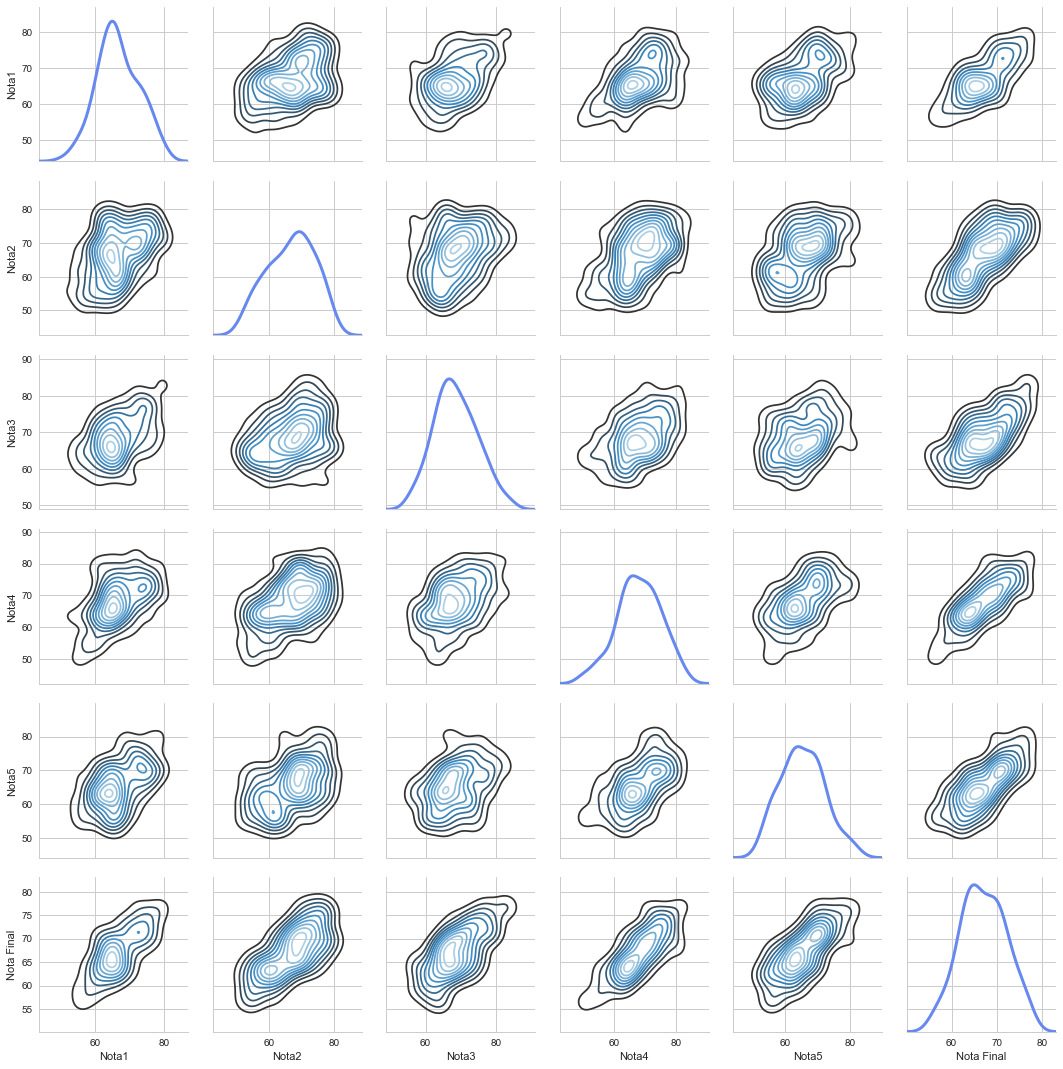

In [30]:
h=sns.PairGrid(spks)
h.map_diag(sns.kdeplot,lw=3,legend=False)
h.map_offdiag(sns.kdeplot,cmap="Blues_d")
plt.show()

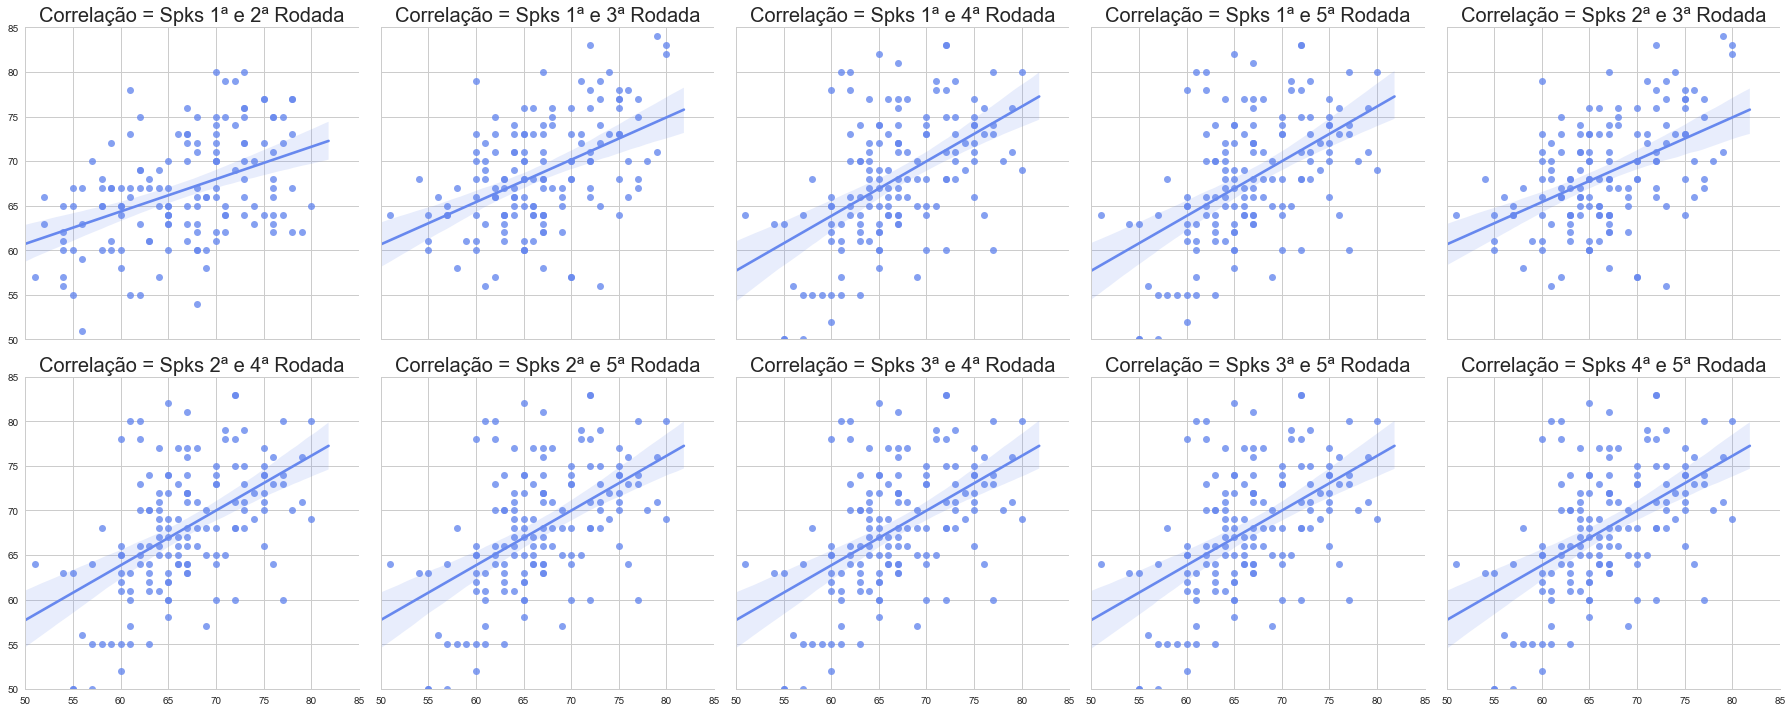

In [31]:
dado=pd.DataFrame(columns=['Correlação','N1','N2'])
dado['N2']=spks['Nota1']
dado['N1']=spks['Nota2']
dado['Correlação']='Spks 1ª e 2ª Rodada'
for i in range(0,145):
    dado.loc[145+i,'N1']=spks['Nota1'][i]
    dado.loc[145+i,'N2']=spks['Nota3'][i]
    dado.loc[145+i,'Correlação']='Spks 1ª e 3ª Rodada'
for i in range(0,145):
    dado.loc[290+i,'N1']=spks['Nota1'][i]
    dado.loc[290+i,'N2']=spks['Nota4'][i]
    dado.loc[290+i,'Correlação']='Spks 1ª e 4ª Rodada'
for i in range(0,145):
    dado.loc[435+i,'N1']=spks['Nota1'][i]
    dado.loc[435+i,'N2']=spks['Nota4'][i]
    dado.loc[435+i,'Correlação']='Spks 1ª e 5ª Rodada'
for i in range(0,145):
    dado.loc[580+i,'N1']=spks['Nota1'][i]
    dado.loc[580+i,'N2']=spks['Nota3'][i]
    dado.loc[580+i,'Correlação']='Spks 2ª e 3ª Rodada'
for i in range(0,145):
    dado.loc[725+i,'N1']=spks['Nota1'][i]
    dado.loc[725+i,'N2']=spks['Nota4'][i]
    dado.loc[725+i,'Correlação']='Spks 2ª e 4ª Rodada'
for i in range(0,145):
    dado.loc[870+i,'N1']=spks['Nota1'][i]
    dado.loc[870+i,'N2']=spks['Nota4'][i]
    dado.loc[870+i,'Correlação']='Spks 2ª e 5ª Rodada'
for i in range(0,145):
    dado.loc[1015+i,'N1']=spks['Nota1'][i]
    dado.loc[1015+i,'N2']=spks['Nota4'][i]
    dado.loc[1015+i,'Correlação']='Spks 3ª e 4ª Rodada'
for i in range(0,145):
    dado.loc[1160+i,'N1']=spks['Nota1'][i]
    dado.loc[1160+i,'N2']=spks['Nota4'][i]
    dado.loc[1160+i,'Correlação']='Spks 3ª e 5ª Rodada'
for i in range(0,145):
    dado.loc[1305+i,'N1']=spks['Nota1'][i]
    dado.loc[1305+i,'N2']=spks['Nota4'][i]
    dado.loc[1305+i,'Correlação']='Spks 4ª e 5ª Rodada'
dado['N1']=dado['N1'].astype('float32')
dado['N2']=dado['N2'].astype('float32')
k=sns.lmplot(data=dado,x='N1',y='N2',col='Correlação',col_wrap=5)
k.set(ylim=(50,85),xlim=(50,85))
k.set_titles(size=20)
k.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

# Plotar as questões abaixo para as 5 rodadas

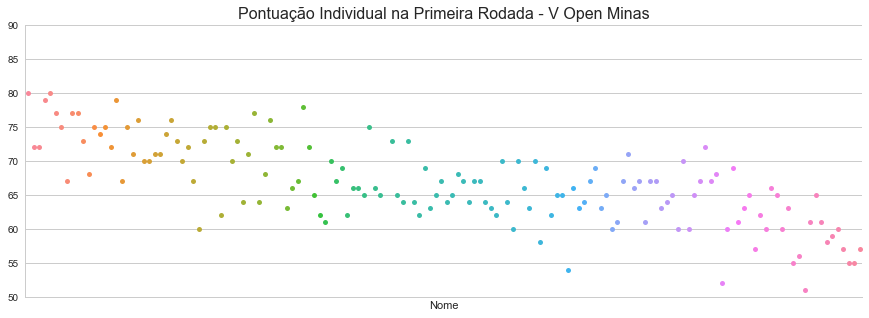

In [32]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Pontuação Individual na Primeira Rodada - V Open Minas',fontsize=16)
a=sns.swarmplot(x="Nome",y="Nota1",data=vopen)
a.set_ylim(50,90)
ax.set_ylabel('')    
ax.tick_params(labelbottom=False)    
sns.despine()
plt.show()

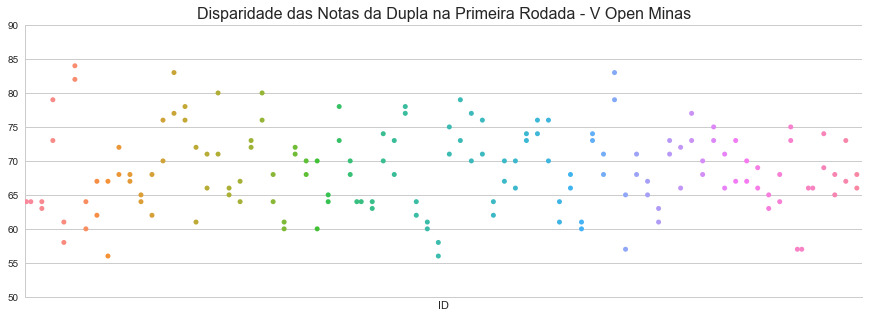

In [33]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Disparidade das Notas da Dupla na Primeira Rodada - V Open Minas',fontsize=16)
sns.swarmplot(x="ID",y="Nota3",data=vopen).set_ylim(50,90)
ax.set_ylabel('')    
ax.tick_params(labelbottom=False)    
sns.despine()
plt.show()

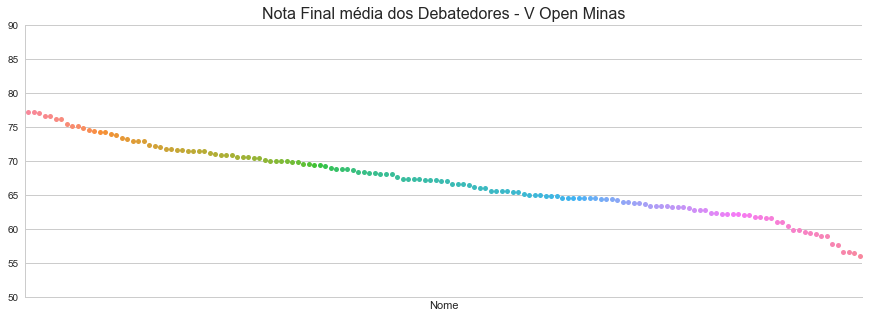

In [34]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Nota Final média dos Debatedores - V Open Minas',fontsize=16)
sns.swarmplot(x="Nome",y="Nota Final",data=vopen).set_ylim(50,90)
ax.set_ylabel('')    
ax.tick_params(labelbottom=False)    
sns.despine()
plt.show()

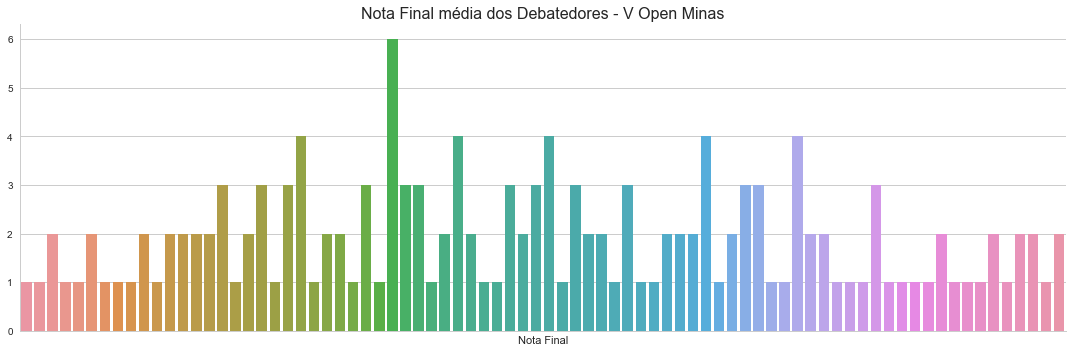

In [35]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Nota Final média dos Debatedores - V Open Minas',fontsize=16)
sns.countplot(x='Nota Final',data=vopen)
ax.set_ylabel('')    
ax.tick_params(labelbottom=False)    
sns.despine()
plt.tight_layout()

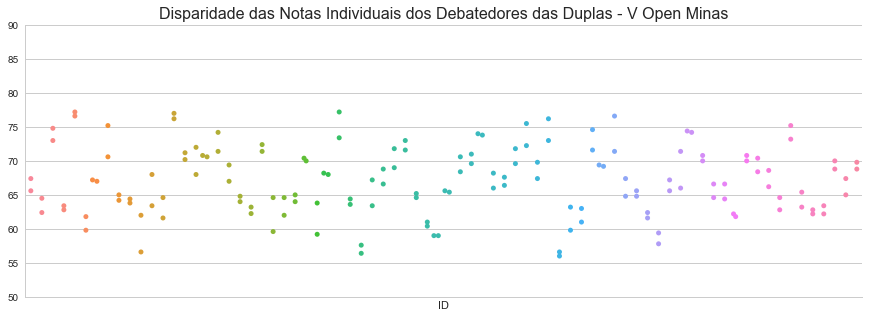

In [123]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Disparidade das Notas Individuais dos Debatedores das Duplas - V Open Minas',fontsize=16)
sns.swarmplot(x="ID",y="Nota Final",data=vopen).set_ylim(50,90)
ax.set_ylabel('')    
ax.tick_params(labelbottom=False)    
sns.despine()
plt.show()

O gráfico acima mede as diferenças entre as médias das notas individuais dos debatedores de uma mesma dupla.

Os debatedores de uma mesma dupla se encontram no mesmo valor de x.

### Armadilha do Quarto Lugar
Uma percepção frequente em debates é que tirar quarto lugar na primeira rodada implica em permanecer com posições ruins ao longo do torneio. Independentemente do motivo que gere este fenômeno, testo aqui sua veracidade

In [37]:
vopen1=vopen.drop_duplicates(subset='ID')
vopen1.head()

ID                Nome       SD  Ponto1  Nota1  Sala1  Ponto2  Nota2  \
0   5       Arthur Gandra  Senatus       4     80      2       4     73   
1  29        Luísa Côrtes  Senatus       4     72      8       4     77   
2  14    João Lucas Lopes   SdDUFC       4     72      4       4     75   
4  54  Carolina Marcondes      SDV       4     80     14       1     70   
6  48       Fernanda Cruz  Senatus       3     75     12       4     76   

   Sala2  Ponto3 ...  Nota5  Sala5  Pontuação  Dificuldade  Nota Final  \
0     24       4 ...     82     79         17        59.75        77.2   
1     23       1 ...     76     79         16        57.00        77.2   
2     22       3 ...     72     77         17        57.00        77.0   
4     20       4 ...     70     81         14        54.50        76.6   
6     28       2 ...     80     81         15        55.25        76.2   

      Rodada  1D  1O  2D  2O  
0  1ª Rodada  33  34  35  36  
1  3ª Rodada  46  11  25   1  
2  2ª Rodada  20  51  62   2  
4          0   0   0   0   0  
6  5ª Rodada  49   6  31  58  

[5 rows x 26 columns]

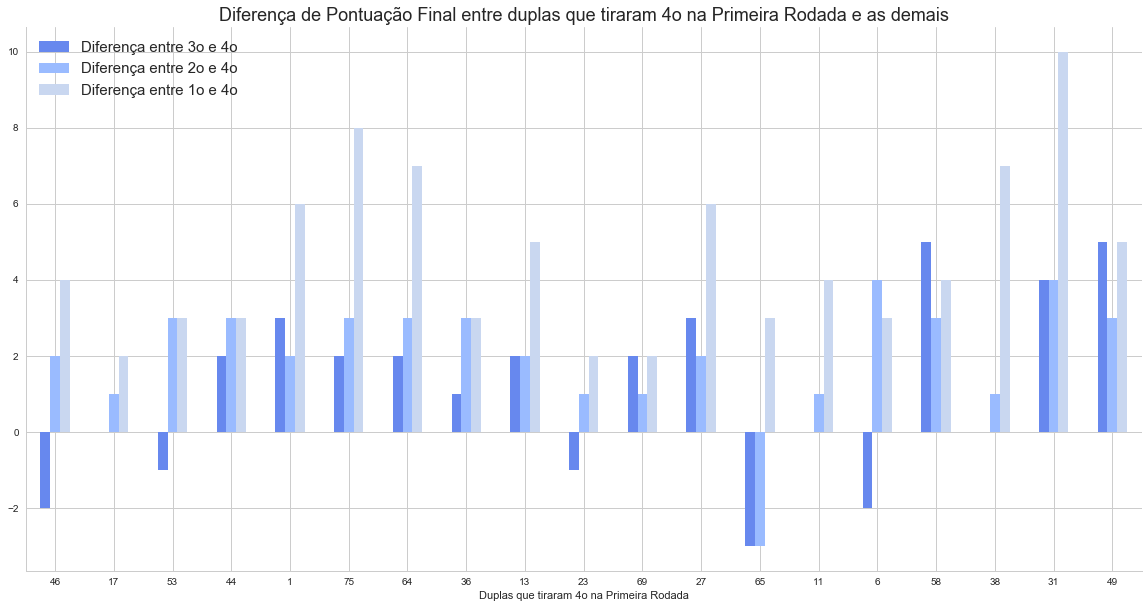

In [38]:
df10=pd.DataFrame(index=vopen1[vopen1['Ponto1']==1]['ID'])
df10.set_index(vopen1[vopen1['Ponto1']==1]['ID'],inplace=True)
df10['Diferença entre 3o e 4o']=(np.array(vopen1[vopen1['Ponto1']==2]['Pontuação'])-np.array(vopen1[vopen1['Ponto1']==1]['Pontuação'])).tolist()
df10['Diferença entre 2o e 4o']=(np.array(vopen1[vopen1['Ponto1']==3]['Pontuação'])-np.array(vopen1[vopen1['Ponto1']==1]['Pontuação'])).tolist()
df10['Diferença entre 1o e 4o']=(np.array(vopen1[vopen1['Ponto1']==4]['Pontuação'])-np.array(vopen1[vopen1['Ponto1']==1]['Pontuação'])).tolist()
k=df10.plot(kind='bar',rot=360,figsize=(20,10))
k.set(xlabel='Duplas que tiraram 4o na Primeira Rodada')
k.set_title('Diferença de Pontuação Final entre duplas que tiraram 4o na Primeira Rodada e as demais',fontsize=18)
k.legend(prop={'size':15})
sns.despine()
plt.show()

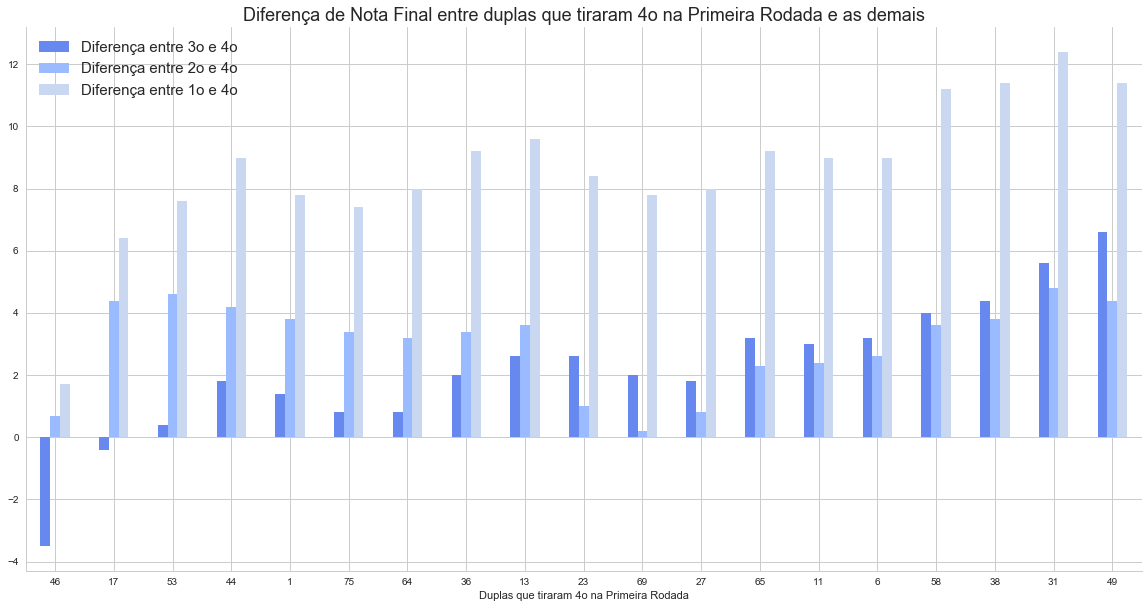

In [39]:
df10=pd.DataFrame(index=vopen1[vopen1['Ponto1']==1]['ID'])
df10.set_index(vopen1[vopen1['Ponto1']==1]['ID'],inplace=True)
df10['Diferença entre 3o e 4o']=(np.array(vopen1[vopen1['Ponto1']==2]['Nota Final'])-np.array(vopen1[vopen1['Ponto1']==1]['Nota Final'])).tolist()
df10['Diferença entre 2o e 4o']=(np.array(vopen1[vopen1['Ponto1']==3]['Nota Final'])-np.array(vopen1[vopen1['Ponto1']==1]['Nota Final'])).tolist()
df10['Diferença entre 1o e 4o']=(np.array(vopen1[vopen1['Ponto1']==4]['Nota Final'])-np.array(vopen1[vopen1['Ponto1']==1]['Nota Final'])).tolist()
k=df10.plot(kind='bar',rot=360,figsize=(20,10))
k.set(xlabel='Duplas que tiraram 4o na Primeira Rodada')
k.set_title('Diferença de Nota Final entre duplas que tiraram 4o na Primeira Rodada e as demais',fontsize=18)
k.legend(prop={'size':15})
sns.despine()
plt.show()

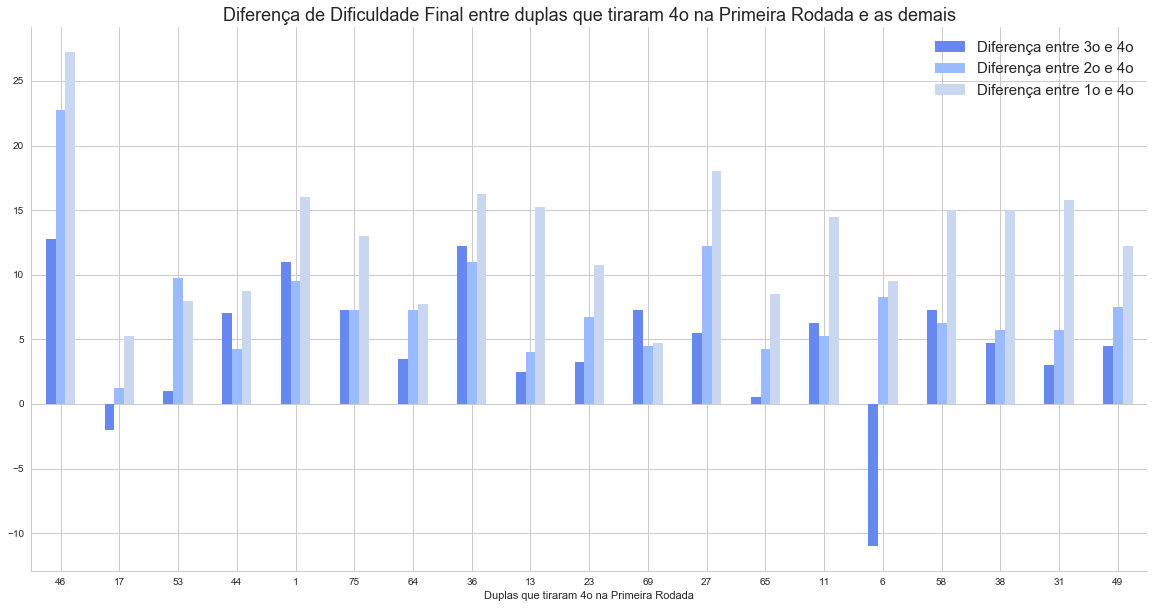

In [115]:
df10=pd.DataFrame(index=vopen1[vopen1['Ponto1']==1]['ID'])
df10.set_index(vopen1[vopen1['Ponto1']==1]['ID'],inplace=True)
df10['Diferença entre 3o e 4o']=(np.array(vopen1[vopen1['Ponto1']==2]['Dificuldade'])-np.array(vopen1[vopen1['Ponto1']==1]['Dificuldade'])).tolist()
df10['Diferença entre 2o e 4o']=(np.array(vopen1[vopen1['Ponto1']==3]['Dificuldade'])-np.array(vopen1[vopen1['Ponto1']==1]['Dificuldade'])).tolist()
df10['Diferença entre 1o e 4o']=(np.array(vopen1[vopen1['Ponto1']==4]['Dificuldade'])-np.array(vopen1[vopen1['Ponto1']==1]['Dificuldade'])).tolist()
k=df10.plot(kind='bar',rot=360,figsize=(20,10))
k.set(xlabel='Duplas que tiraram 4o na Primeira Rodada')
k.set_title('Diferença de Dificuldade Final entre duplas que tiraram 4o na Primeira Rodada e as demais',fontsize=18)
k.legend(prop={'size':15})
sns.despine()
plt.show()

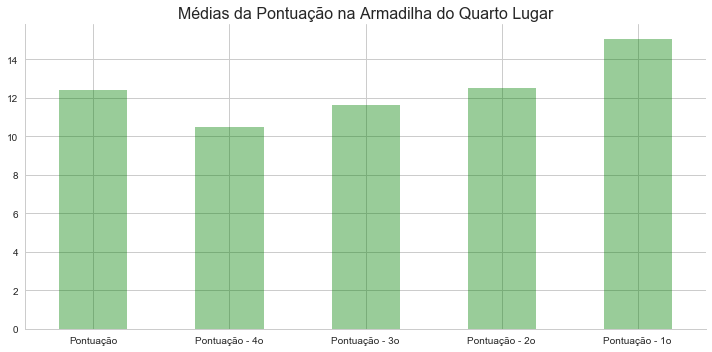

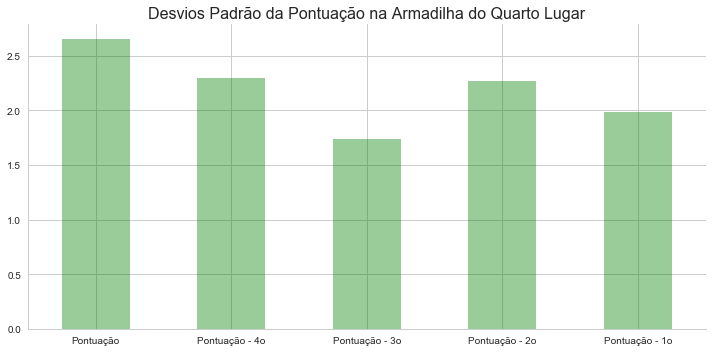

In [149]:
medias1=pd.DataFrame(index=['Pontuação'])
medias1['Pontuação']=vopen1['Pontuação'].mean()
medias1['Pontuação - 4o']=vopen1[vopen1['Ponto1']==1]['Pontuação'].mean()
medias1['Pontuação - 3o']=vopen1[vopen1['Ponto1']==2]['Pontuação'].mean()
medias1['Pontuação - 2o']=vopen1[vopen1['Ponto1']==3]['Pontuação'].mean()
medias1['Pontuação - 1o']=vopen1[vopen1['Ponto1']==4]['Pontuação'].mean()
k=medias1.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Médias da Pontuação na Armadilha do Quarto Lugar',fontsize=16)
sns.despine()
plt.tight_layout()
std1=pd.DataFrame(index=['Pontuação'])
std1['Pontuação']=vopen1['Pontuação'].std()
std1['Pontuação - 4o']=vopen1[vopen1['Ponto1']==1]['Pontuação'].std()
std1['Pontuação - 3o']=vopen1[vopen1['Ponto1']==2]['Pontuação'].std()
std1['Pontuação - 2o']=vopen1[vopen1['Ponto1']==3]['Pontuação'].std()
std1['Pontuação - 1o']=vopen1[vopen1['Ponto1']==4]['Pontuação'].std()
k=std1.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Desvios Padrão da Pontuação na Armadilha do Quarto Lugar',fontsize=16)
sns.despine()
plt.tight_layout()

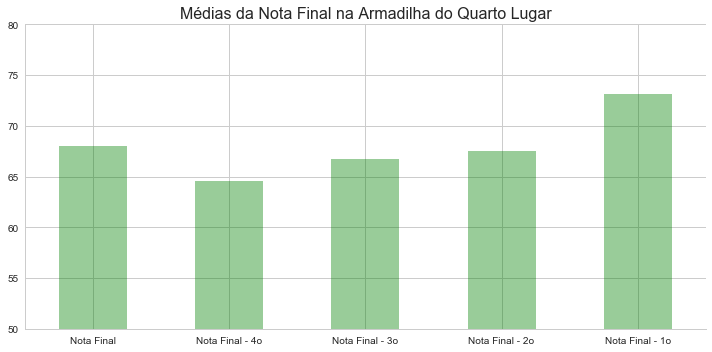

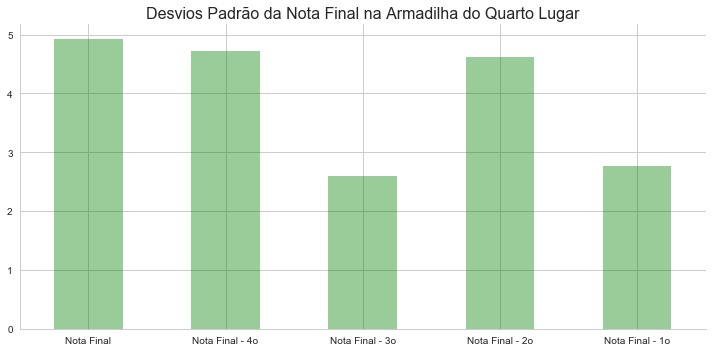

In [148]:
medias2=pd.DataFrame(index=['Nota Final'])
medias2['Nota Final']=vopen1['Nota Final'].mean()
medias2['Nota Final - 4o']=vopen1[vopen1['Ponto1']==1]['Nota Final'].mean()
medias2['Nota Final - 3o']=vopen1[vopen1['Ponto1']==2]['Nota Final'].mean()
medias2['Nota Final - 2o']=vopen1[vopen1['Ponto1']==3]['Nota Final'].mean()
medias2['Nota Final - 1o']=vopen1[vopen1['Ponto1']==4]['Nota Final'].mean()
k=medias2.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='',ylim=(50,80))
k.set_title('Médias da Nota Final na Armadilha do Quarto Lugar',fontsize=16)
sns.despine()
plt.tight_layout()
std2=pd.DataFrame(index=['Nota Final'])
std2['Nota Final']=vopen1['Nota Final'].std()
std2['Nota Final - 4o']=vopen1[vopen1['Ponto1']==1]['Nota Final'].std()
std2['Nota Final - 3o']=vopen1[vopen1['Ponto1']==2]['Nota Final'].std()
std2['Nota Final - 2o']=vopen1[vopen1['Ponto1']==3]['Nota Final'].std()
std2['Nota Final - 1o']=vopen1[vopen1['Ponto1']==4]['Nota Final'].std()
k=std2.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Desvios Padrão da Nota Final na Armadilha do Quarto Lugar',fontsize=16)
sns.despine()
plt.tight_layout()

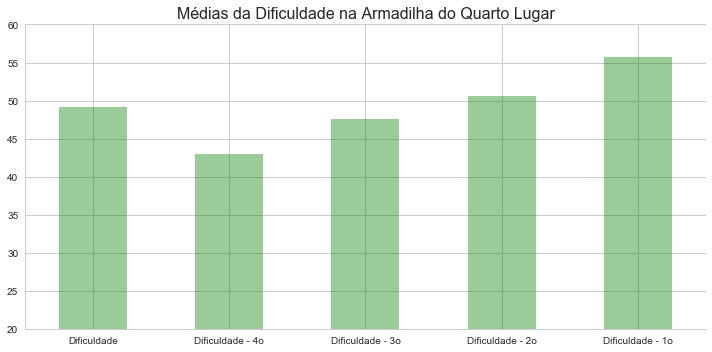

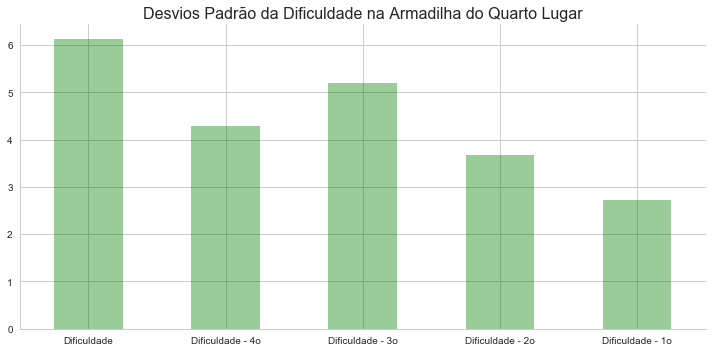

In [145]:
medias3=pd.DataFrame(index=['Dificuldade'])
medias3['Dificuldade']=vopen1['Dificuldade'].mean()
medias3['Dificuldade - 4o']=vopen1[vopen1['Ponto1']==1]['Dificuldade'].mean()
medias3['Dificuldade - 3o']=vopen1[vopen1['Ponto1']==2]['Dificuldade'].mean()
medias3['Dificuldade - 2o']=vopen1[vopen1['Ponto1']==3]['Dificuldade'].mean()
medias3['Dificuldade - 1o']=vopen1[vopen1['Ponto1']==4]['Dificuldade'].mean()
k=medias3.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='',ylim=(20,60))
k.set_title('Médias da Dificuldade na Armadilha do Quarto Lugar',fontsize=16)
sns.despine()
plt.tight_layout()
std3=pd.DataFrame(index=['Dificuldade'])
std3['Dificuldade']=vopen1['Dificuldade'].std()
std3['Dificuldade - 4o']=vopen1[vopen1['Ponto1']==1]['Dificuldade'].std()
std3['Dificuldade - 3o']=vopen1[vopen1['Ponto1']==2]['Dificuldade'].std()
std3['Dificuldade - 2o']=vopen1[vopen1['Ponto1']==3]['Dificuldade'].std()
std3['Dificuldade - 1o']=vopen1[vopen1['Ponto1']==4]['Dificuldade'].std()
k=std3.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Desvios Padrão da Dificuldade na Armadilha do Quarto Lugar',fontsize=16)
sns.despine()
plt.tight_layout()

### Relação entre Pontuação, Nota Final e DIficuldade:

Pontuação é o somatório de pontos obtidos em cada rodada

Nota Final é a média das notas individuais obtidas em cada rodada

Dificuldade representa o somatório da pontuação dos adversários enfrentados

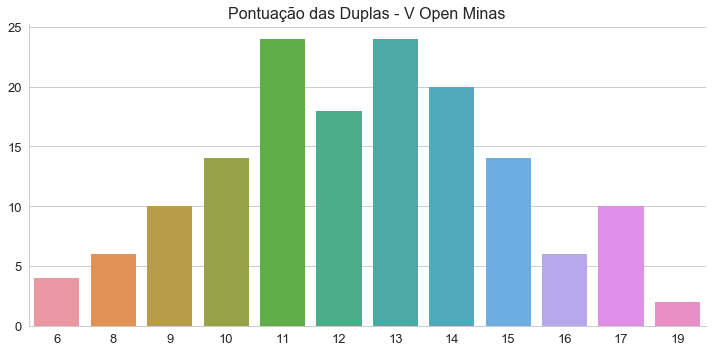

In [47]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Pontuação das Duplas - V Open Minas',fontsize=16)
sns.countplot(x='Pontuação',data=vopen)
ax.tick_params(labelsize=13)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

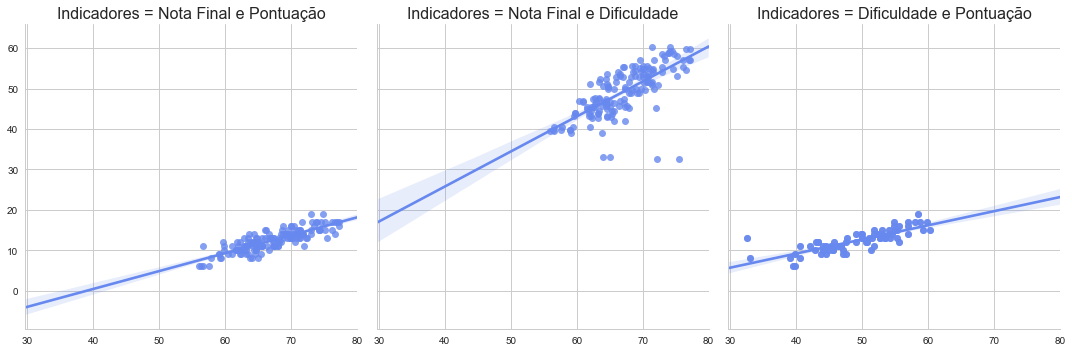

In [48]:
dados=pd.DataFrame(columns=['Indicadores','Valores1','Valores2'])
dados['Valores1']=vopen['Nota Final']
dados['Valores2']=vopen['Pontuação']
dados['Indicadores']='Nota Final e Pontuação'
for i in range(0,152):
    dados.loc[152+i,'Valores1']=vopen['Nota Final'][i]
    dados.loc[152+i,'Valores2']=vopen['Dificuldade'][i]
    dados.loc[152+i,'Indicadores']='Nota Final e Dificuldade'
for i in range(0,152):
    dados.loc[304+i,'Valores1']=vopen['Dificuldade'][i]
    dados.loc[304+i,'Valores2']=vopen['Pontuação'][i]
    dados.loc[304+i,'Indicadores']='Dificuldade e Pontuação'
dados['Valores1']=dados['Valores1'].astype('float32')
dados['Valores2']=dados['Valores2'].astype('float32')
j=sns.lmplot(data=dados,x='Valores1',y='Valores2',col='Indicadores')
j.set_titles(size=16)
j.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


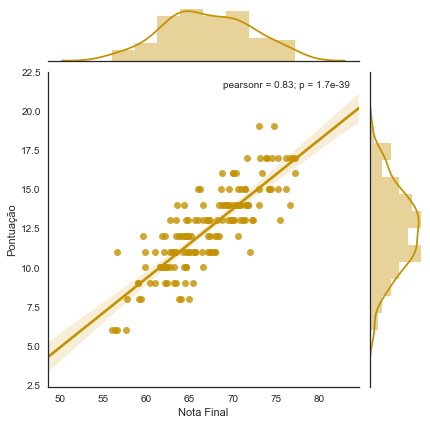

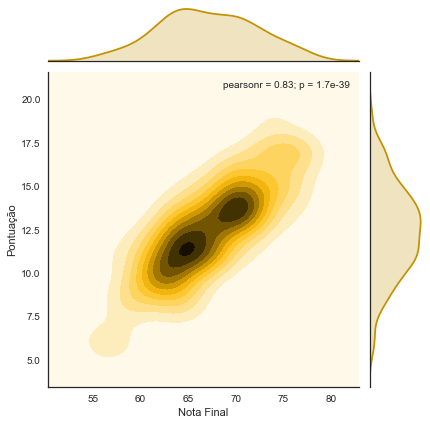

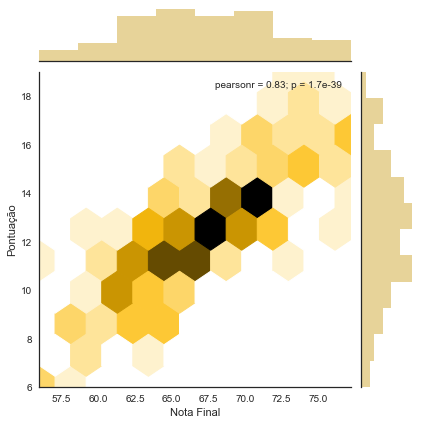

In [80]:
lmplot=sns.jointplot(data=vopen,x='Nota Final',y='Pontuação',kind='reg',color='#C49102')
kdeplot=sns.jointplot(data=vopen,x='Nota Final',y='Pontuação',kind='kde',color='#C49102')
hexplot=sns.jointplot(data=vopen,x='Nota Final',y='Pontuação',kind='hex',color='#C49102')
plt.show()

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


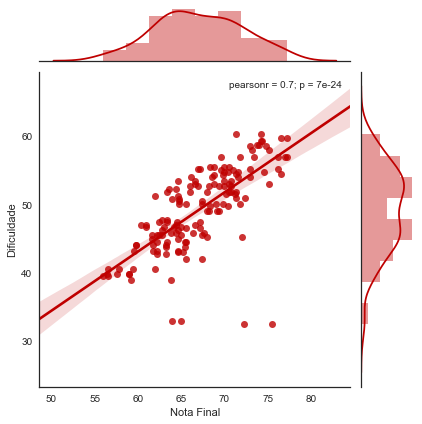

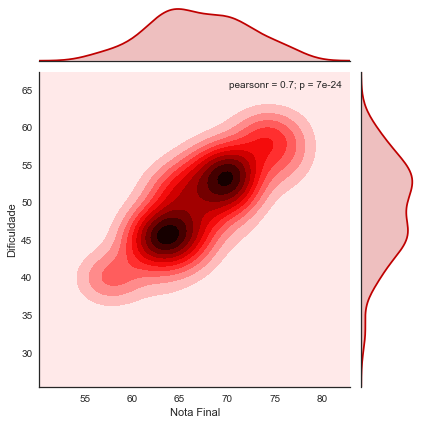

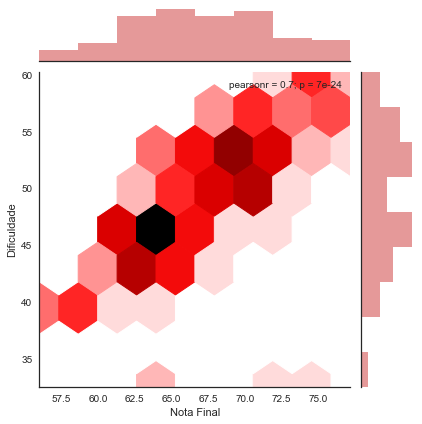

In [107]:
lmplot=sns.jointplot(data=vopen,x='Nota Final',y='Dificuldade',kind='reg',color='#BF0000')
kdeplot=sns.jointplot(data=vopen,x='Nota Final',y='Dificuldade',kind='kde',color='#BF0000')
hexplot=sns.jointplot(data=vopen,x='Nota Final',y='Dificuldade',kind='hex',color='#BF0000')
plt.show()

/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


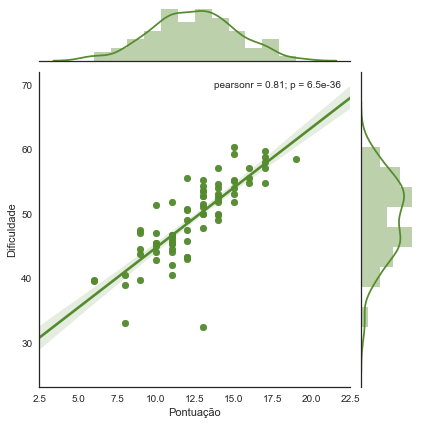

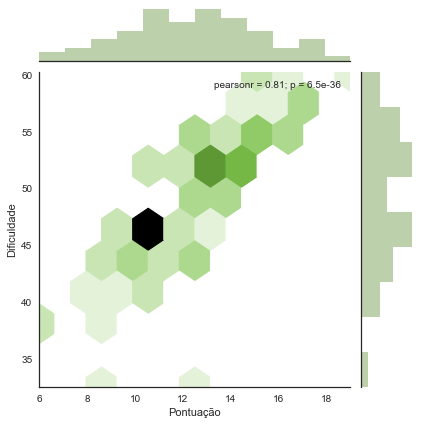

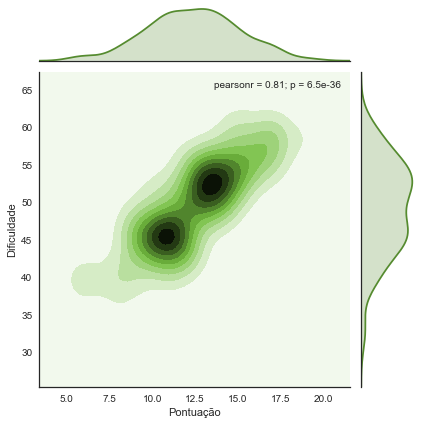

In [83]:
lmplot=sns.jointplot(data=vopen,x='Pontuação',y='Dificuldade',kind='reg',color='#558b2f')
hexplot=sns.jointplot(data=vopen,x='Pontuação',y='Dificuldade',kind='hex',color='#558b2f')
kdeplot=sns.jointplot(data=vopen,x='Pontuação',y='Dificuldade',kind='kde',color='#558b2f')
plt.show()

### Desempenho das Sociedades de Debate

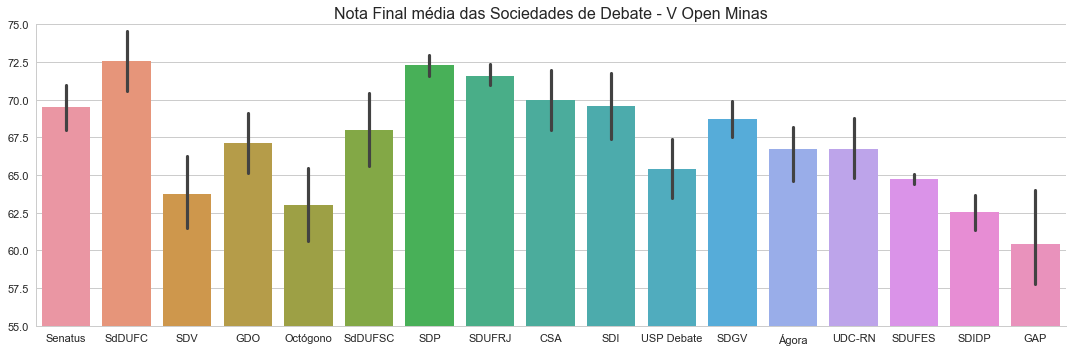

In [52]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Nota Final média das Sociedades de Debate - V Open Minas',fontsize=16)
sns.barplot(x='SD',y='Nota Final',data=vopen)
ax.tick_params(labelsize=11)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_ylim(55,75)
sns.despine()
plt.tight_layout()

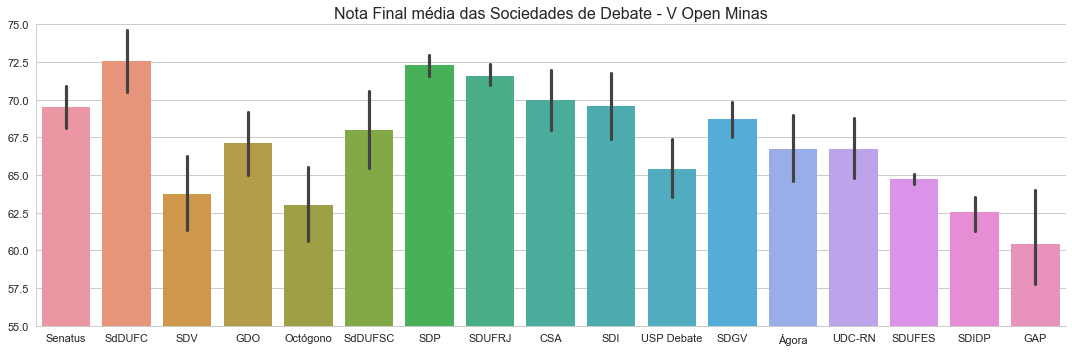

In [53]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Nota Final média das Sociedades de Debate - V Open Minas',fontsize=16)
sns.barplot(x='SD',y='Nota Final',data=vopen)
ax.tick_params(labelsize=11)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_ylim(55,75)
sns.despine()
plt.tight_layout()

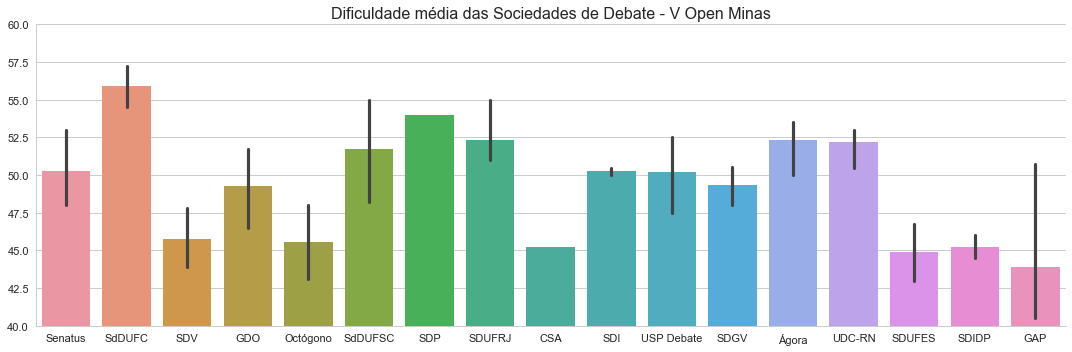

In [54]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Dificuldade média das Sociedades de Debate - V Open Minas',fontsize=16)
sns.barplot(x='SD',y='Dificuldade',data=vopen)
ax.tick_params(labelsize=11)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_ylim(40,60)
sns.despine()
plt.tight_layout()

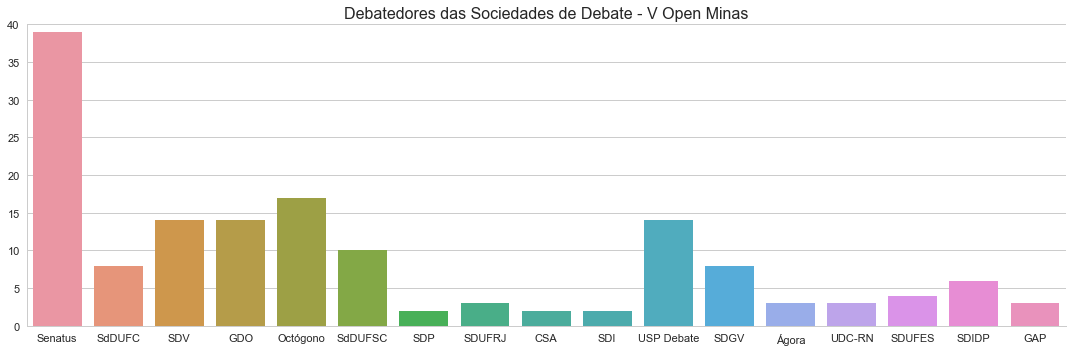

In [116]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Debatedores das Sociedades de Debate - V Open Minas',fontsize=16)
sns.countplot(x='SD',data=vopen)
ax.tick_params(labelsize=11)
ax.set_ylim(0,40)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

#### Separando por quartil:

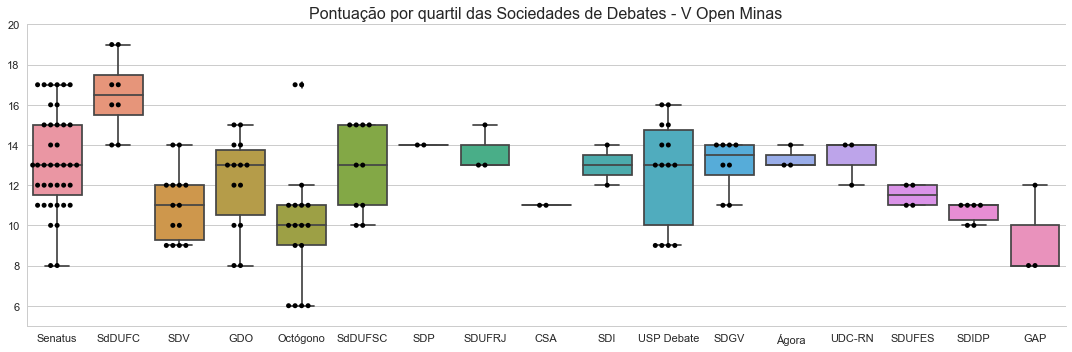

In [118]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Pontuação por quartil das Sociedades de Debates - V Open Minas',fontsize=16)
sns.boxplot(x="SD",y="Pontuação",data=vopen)
sns.swarmplot(x="SD",y="Pontuação",data=vopen,color='black',ax=ax)
ax.tick_params(labelsize=11)
ax.set_ylim(5,20)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

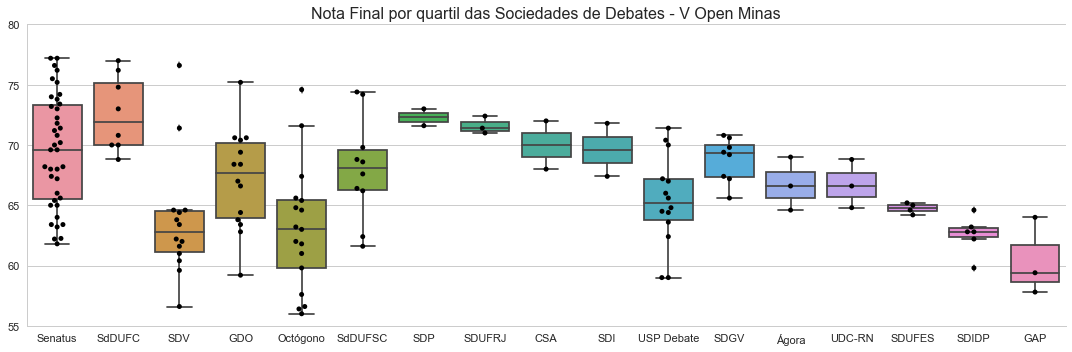

In [119]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Nota Final por quartil das Sociedades de Debates - V Open Minas',fontsize=16)
sns.boxplot(x="SD",y="Nota Final",data=vopen)
sns.swarmplot(x="SD",y="Nota Final",data=vopen,color='black',ax=ax)
ax.tick_params(labelsize=11)
ax.set_ylim(55,80)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

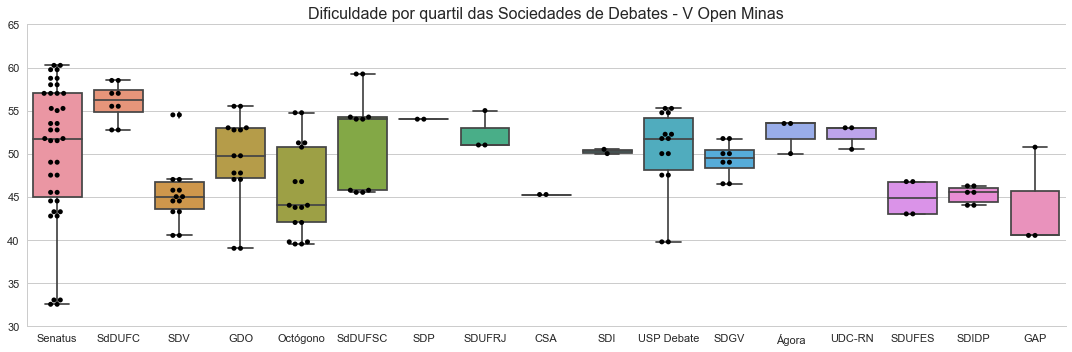

In [121]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Dificuldade por quartil das Sociedades de Debates - V Open Minas',fontsize=16)
sns.boxplot(x="SD",y="Dificuldade",data=vopen)
sns.swarmplot(x="SD",y="Dificuldade",data=vopen,color='black',ax=ax)
ax.tick_params(labelsize=11)
ax.set_ylim(30,65)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

## Análise de Juízes

Em torneios, há a percepção de que alguns juízes tendem a dar notas individuais mais altas, enquanto outros tendem a pesar mais a mão. Há, ainda, a suspeita de que alguns juízes não possuem um boa estimação de notas, o que pode afetar na variabilidade excessiva dos speaker points.

Cada mesa de juíxes é composta por um Presidente de Mesa (ou Chair), que lidera a deliberação do ranqueamento e da determinação das notas, e por Laterais (ou Wings), que também ajudam na decisão dos resultados.

In [59]:
qtd=0
dificuldade=[]
dificuldade_final=[]
dificuldade_rodada1=[]
dificuldade_rodada2=[]
dificuldade_rodada3=[]
dificuldade_rodada4=[]
dificuldade_rodada5=[]
vopen_rodada=vopen.sort_values(by=['Sala1'])
#Criando a Base de Dados
juizes_rodada_1=[['103','Mariana Aleixo','Anna de Almeida','Lucas Mendonça'],['104','Cedê Silva','Julia Yaegashi','Matheus Mendonça'],['106','Pedro Filogônio','Lucca Oliveira'],['107','Lara Lacerda','Gabriella Meister','Laura Morais'],['108','Vitor Capacle','Gabriela Barbosa'],['109','Júlia Malta','Carolina Marques'],['110','Eugênio Corassa','Mariana Santos'],['111','Nadja Pontes','Aléxia Engel'],['112','Vitória Guardieiro','Barbara Coelho','Ivan Capdeville Junior'],['201','Renato Ribeiro','André Andrade','João Neves'],['202','Bernardo Rabelo','Bianca Lettieri'],['203','Marcelo Sarmento','Ariane Caxias','Micarla Lins'],['205','Giovanna Nejar','Clara Nassif','Ygor Chagas'],['206','Matheus Dias','Bárbara Bergamo'],['208','Rached Centeno','Henrique Vitta','Isadora Nunes'],['210','Carolina Nery','Antônia Martins','Rochelle Giovana'],['211','Elisa Labanca','Jonas Lisboa','Marcos Conde'],['212','Flávia Taiane','Claudemir Nascimento'],['213','Isaque Soares','Jhenifer de Andrade','Maria Luísa Sá']]
juizes_rodada_2=[['106','Carolina Nery','Clara Nassif'],['212','Claudemir Nascimento','André Andrade','Rochelle Giovana'],['211','Rached Centeno','Jonas Lisboa','Marcos Conde'],['112','Júlia Malta','Aléxia Engel','Laura Morais'],['210','Elisa Labanca','Maria Luísa Sá','Matheus Mendonça'],['109','Mariana Aleixo','Ivan Capdeville Junior','Lucas Mendonça'],['108','Renato Ribeiro','Isadora Nunes','Jhenifer de Andrade'],['213','Eugênio Corassa','João Neves','Mariana Santos'],['103','Flávia Taiane','Antônia Martins'],['203','Giovanna Nejar','Bianca Lettieri','Gabriela Barbosa'],['107','Pedro Filogônio','Ariane Caxias','Julia Yaegashi'],['110','Matheus Dias','Barbara Coelho'],['206','Vitória Guardieiro','Henrique Vitta','Ygor Chagas'],['104','Cedê Silva','Anna de Almeida','Lucca Oliveira'],['208','Nadja Pontes','Bárbara Bergamo'],['201','Bernardo Rabelo','Carolina Marques'],['205','Lara Lacerda','Isaque Soares'],['202','Vitor Capacle','Micarla Lins'],['111','Marcelo Sarmento','Gabriella Meister']]
juizes_rodada_3=[['206','Renato Ribeiro','Carolina Nery','Clara Nassif'],['210','Pedro Filogônio','Antônia Martins','Ariane Caxias'],['202','Bernardo Rabelo','Barbara Coelho','Micarla Lins'],['111','Flávia Taiane','Isadora Nunes','Maria Luísa Sá'],['201','Vitória Guardieiro','Luiz Valli','Ygor Chagas'],['213','Marcelo Sarmento','Anna de Almeida','Laura Morais'],['208','Elisa Labanca','Isaque Soares','Maria Luisa Guerra'],['107','Aline Terrão','Bianca Lettieri','Julia Yaegashi'],['112','Eugênio Corassa','Bárbara Bergamo','Carolina Cardoso'],['104','Matheus Dias','Aléxia Engel'],['110','Nadja Pontes','Gabriella Meister','Marcos Conde'],['211','Vitor Capacle','Matheus Mendonça'],['203','Lara Lacerda','Carolina Marques','Lucas Mendonça'],['106','Rached Centeno','Mariana Santos'],['103','Giovanna Nejar','Jonas Lisboa'],['205','Júlia Malta','Lucca Oliveira','Pedro Lima'],['212','Mariana Aleixo','André Andrade','Jhenifer de Andrade'],['108','Luiza Rodrigues','Rochelle Giovana'],['109','Claudemir Nascimento','João Neves']]
juizes_rodada_4=[['203','Renato Ribeiro','Bárbara Bergamo','Lara Lacerda'],['107','Pedro Filogônio','Julia Yaegashi'],['201','Flávia Taiane','Anna de Almeida','Isaque Soares'],['206','Nadja Pontes','Ariane Caxias','Maria Luísa Sá'],['109','Bernardo Rabelo','Carolina Nery'],['111','Marcelo Sarmento','André Andrade','Rochelle Giovana'],['103','Eugênio Corassa','Luiz Valli','Mariana Santos'],['106','Aline Terrão','Carolina Cardoso','Maria Luisa Guerra'],['208','Rached Centeno','Antônia Martins','Laura Morais'],['211','Giovanna Nejar','João Neves','Matheus Mendonça'],['104','Vitória Guardieiro','Bianca Lettieri','Gabriella Meister'],['212','Júlia Malta','Jhenifer de Andrade','Marcos Conde'],['110','Elisa Labanca','Barbara Coelho','Carolina Marques'],['210','Matheus Dias','Lucas Mendonça'],['108','Claudemir Nascimento','Clara Nassif','Micarla Lins'],['112','Mariana Aleixo','Lucca Oliveira','Pedro Lima'],['213','Vitor Capacle','Jonas Lisboa'],['205','Luiza Rodrigues','Ygor Chagas'],['202','Cedê Silva','Aléxia Engel','Isadora Nunes']]
juizes_rodada_5=[['213','Renato Ribeiro','Ivan Capdeville Junior','Mariana Aleixo'],['202','Pedro Filogônio','Carolina Nery','Julia Yaegashi'],['205','Flávia Taiane','Jhenifer de Andrade','João Neves'],['210','Bernardo Rabelo','Lucas Mendonça','Mariana Santos'],['106','Nadja Pontes','André Andrade','Isaque Soares'],['104','Eugênio Corassa','Isadora Nunes','Lucca Oliveira'],['203','Marcelo Sarmento','Antônia Martins','Maria Luísa Sá'],['108','Anna de Almeida','Maria Luisa Guerra'],['208','Giovanna Nejar','Bárbara Bergamo','Micarla Lins'],['109','Rached Centeno','Bianca Lettieri','Ygor Chagas'],['211','Matheus Dias','Barbara Coelho','Carolina Marques'],['206','Vitor Capacle','Gabriela Barbosa'],['103','Júlia Malta','Carolina Cardoso','Pedro Lima'],['111','Lara Lacerda','Aléxia Engel','Jonas Lisboa'],['201','Elisa Labanca','Gabriella Meister'],['212','Luiza Rodrigues','Luiz Valli'],['112','Vitória Guardieiro','Laura Morais','Rochelle Giovana'],['107','Cedê Silva','Ariane Caxias'],['110','Claudemir Nascimento','Marcos Conde']]
for juizes_rodada in [juizes_rodada_1,juizes_rodada_2,juizes_rodada_3,juizes_rodada_4,juizes_rodada_5]:
    qtd+=1
    sala_rodada=[]
    chair_rodada=[]
    wing1_rodada=[]
    wing2_rodada=[]
    vopen_rodada.sort_values(by=['Sala'+str(qtd)],inplace=True)
    for i in range(0,19):
        for j in range(0,4):
            if j==0:
                for k in range(0,8):
                    sala_rodada.append(juizes_rodada[i][j])
            if j==1:
                for k in range(0,8):
                    chair_rodada.append(juizes_rodada[i][j])
            if j==2:
                for k in range(0,8):
                    wing1_rodada.append(juizes_rodada[i][j])
            if j==3 and len(juizes_rodada[i])==4:
                for k in range(0,8):
                    wing2_rodada.append(juizes_rodada[i][j])
            if j==3 and len(juizes_rodada[i])!=4:
                for k in range(0,8):
                    wing2_rodada.append('')                
    vopen_rodada['Sala Rodada '+str(qtd)]=sala_rodada
    vopen_rodada['Chair Rodada '+str(qtd)]=chair_rodada
    vopen_rodada['Wing 1 Rodada '+str(qtd)]=wing1_rodada
    vopen_rodada['Wing 2 Rodada '+str(qtd)]=wing2_rodada
for debatedor in vopen_rodada['Nome']:
    for rodada in range(2,6):
        dificuldade.append([debatedor,rodada,int(vopen_rodada[vopen_rodada['Nome']==debatedor]['Sala'+str(rodada)].unique()),int(vopen_rodada[vopen_rodada['Nome']==debatedor]['ID'].unique())])
for item in dificuldade:
    dificuldades=[]
    for l in range(0,len(dificuldade)):
        if item[2]==dificuldade[l][2] and item[0]!=dificuldade[l][0] and item[3]!=dificuldade[l][3]:
            dificuldades.append(int(vopen_rodada[vopen_rodada['Nome']==dificuldade[l][0]]['Ponto'+str(dificuldade[l][1]-1)].unique()))
    dificuldade_final.append([item[0],item[1],sum(dificuldades)/2])
for lista in dificuldade_final:
    if lista[1]==2:
        dificuldade_rodada2.append(lista[2])
    if lista[1]==3:
        dificuldade_rodada3.append(lista[2])
    if lista[1]==4:
        dificuldade_rodada4.append(lista[2])
    if lista[1]==5:
        dificuldade_rodada5.append(lista[2])
dificuldade_rodada3=np.array(dificuldade_rodada3)+np.array(dificuldade_rodada2)
dificuldade_rodada4=np.array(dificuldade_rodada4)+np.array(dificuldade_rodada3)
dificuldade_rodada5=np.array(dificuldade_rodada5)+np.array(dificuldade_rodada4)
vopen_rodada['Dificuldade 2']=dificuldade_rodada2
vopen_rodada['Dificuldade 3']=dificuldade_rodada3
vopen_rodada['Dificuldade 4']=dificuldade_rodada4
vopen_rodada['Dificuldade 5']=dificuldade_rodada5
vopen_rodada.head()

ID                  Nome       SD  Ponto1  Nota1  Sala1  Ponto2  Nota2  \
12  61         Murillo Preve  SdDUFSC       4     75     16       4     77   
15  42    João Vitor Miranda  Senatus       3     72     11       3     70   
16  42         Laís Tatagiba  Senatus       3     79     11       3     72   
19   3          Estevão Mota   SdDUFC       4     71      1       3     68   
10   3  Pedro Jorge Medeiros   SdDUFC       4     73      1       3     70   

    Sala2  Ponto3      ...        Wing 1 Rodada 4  Wing 2 Rodada 4  \
12     21       3      ...         Julia Yaegashi                    
15     28       4      ...        Anna de Almeida    Isaque Soares   
16     28       4      ...        Anna de Almeida    Isaque Soares   
19     24       4      ...        Bárbara Bergamo     Lara Lacerda   
10     24       4      ...        Bárbara Bergamo     Lara Lacerda   

    Sala Rodada 5  Chair Rodada 5         Wing 1 Rodada 5  Wing 2 Rodada 5  \
12            213  Renato Ribeiro  Ivan Capdeville Junior   Mariana Aleixo   
15            213  Renato Ribeiro  Ivan Capdeville Junior   Mariana Aleixo   
16            213  Renato Ribeiro  Ivan Capdeville Junior   Mariana Aleixo   
19            213  Renato Ribeiro  Ivan Capdeville Junior   Mariana Aleixo   
10            213  Renato Ribeiro  Ivan Capdeville Junior   Mariana Aleixo   

    Dificuldade 2  Dificuldade 3  Dificuldade 4  Dificuldade 5  
12           12.0           23.0           32.0           44.0  
15            9.0           16.0           26.0           37.0  
16            9.0           16.0           26.0           37.0  
19           11.0           23.0           35.0           46.0  
10           11.0           23.0           35.0           46.0  

[5 rows x 50 columns]

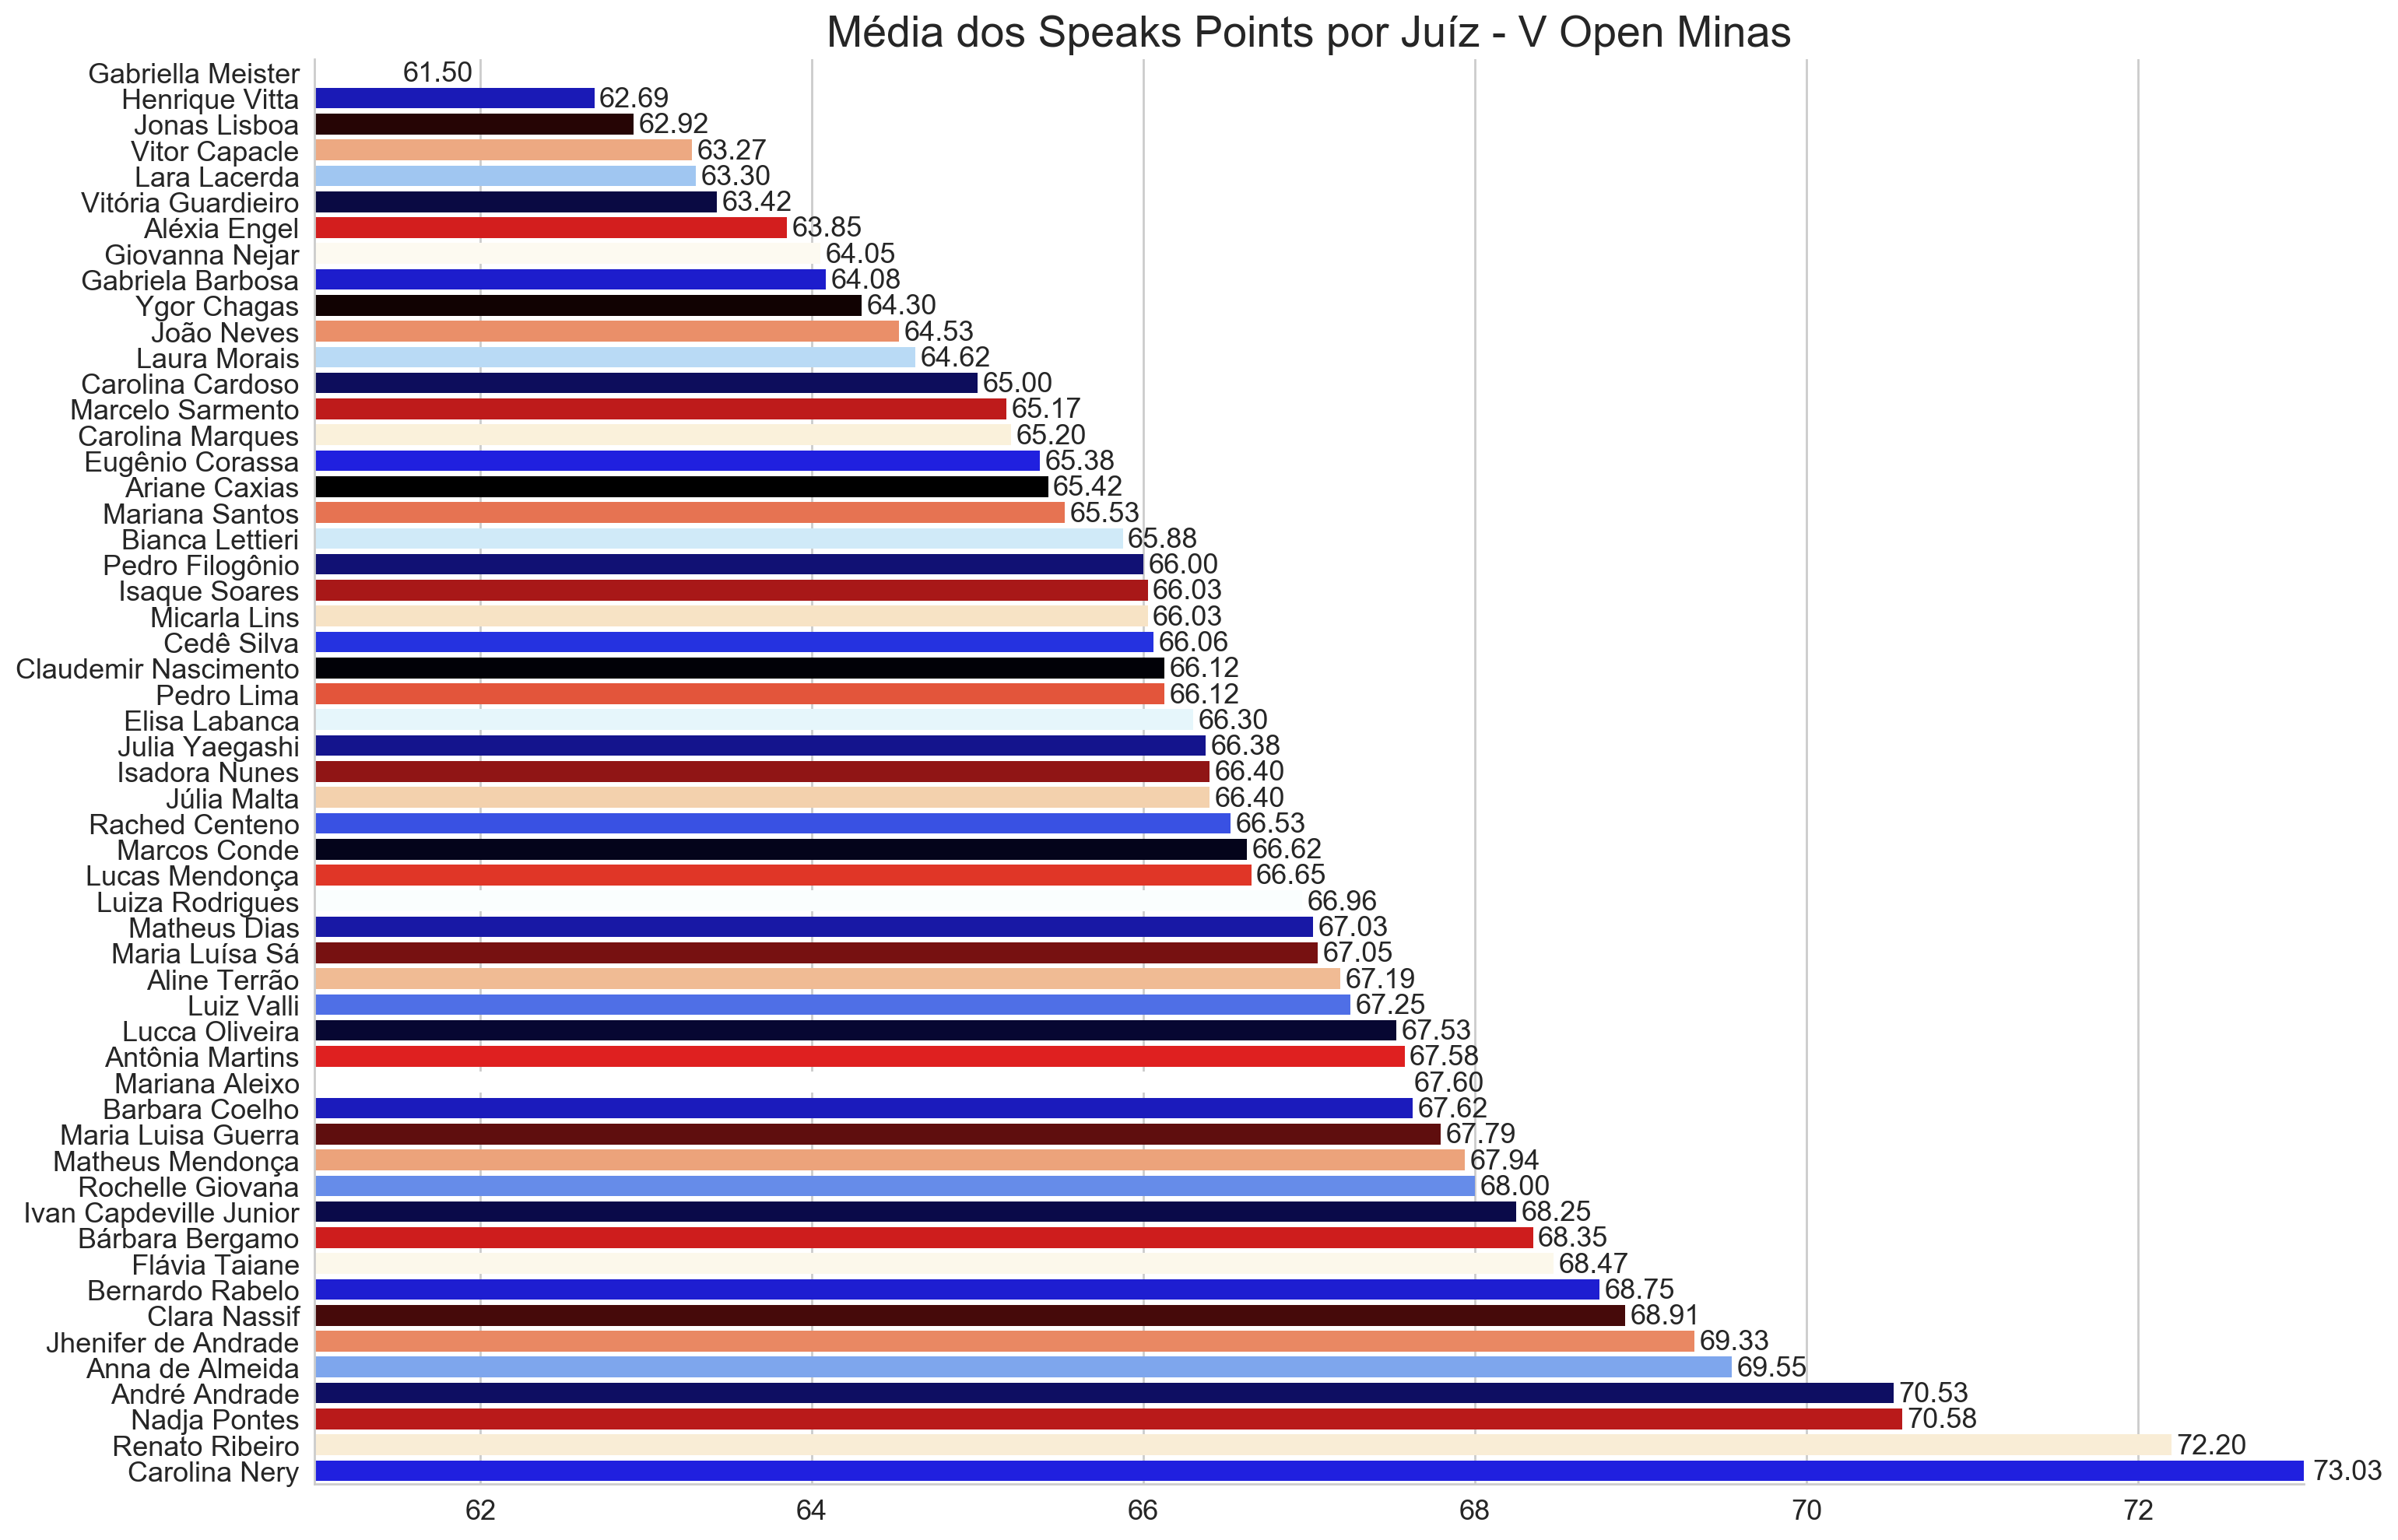

In [60]:
nome_chair=[]
nome_wing1=[]
nome_wing2=[]
media_chair_rodada=[]
media_wing1_rodada=[]
media_wing2_rodada=[]
media_juizes_rodada=[]
for rodada in [1,2,3,4,5]:
    for chair in list(set(vopen_rodada['Chair Rodada '+str(rodada)])):
        k=vopen_rodada[vopen_rodada['Chair Rodada '+str(rodada)]==chair]['Nota'+str(rodada)].mean()
        media_chair_rodada.append([chair,k,int(vopen_rodada[vopen_rodada['Chair Rodada '+str(rodada)]==chair]['Sala'+str(rodada)].unique())])
    for wing1 in list(set(vopen_rodada['Wing 1 Rodada '+str(rodada)])):
        l=vopen_rodada[vopen_rodada['Wing 1 Rodada '+str(rodada)]==wing1]['Nota'+str(rodada)].mean()
        media_wing1_rodada.append([wing1,l,int(vopen_rodada[vopen_rodada['Wing 1 Rodada '+str(rodada)]==wing1]['Sala'+str(rodada)].unique())])
    for wing2 in list(set(vopen_rodada['Wing 2 Rodada '+str(rodada)])):
        if wing2!='':
            m=vopen_rodada[vopen_rodada['Wing 2 Rodada '+str(rodada)]==wing2]['Nota'+str(rodada)].mean()
            media_wing2_rodada.append([wing2,m,int(vopen_rodada[vopen_rodada['Wing 2 Rodada '+str(rodada)]==wing2]['Sala'+str(rodada)].unique())])
for k in range(0,95):
    nome_chair.append(media_chair_rodada[k][0])
    nome_chair=list(set(nome_chair))
for k in range(0,95):
    nome_wing1.append(media_wing1_rodada[k][0])
    nome_wing1=list(set(nome_wing1))
for k in range(0,62):
    nome_wing2.append(media_wing2_rodada[k][0])
    nome_wing2=list(set(nome_wing2))
nomes=nome_chair+nome_wing1+nome_wing2
nomes=sorted(list(set(nomes)))
media_juizes=media_chair_rodada+media_wing1_rodada+media_wing2_rodada
for i in nomes:
    media_juiz_rodada=[]
    for j in range(0,252):
        if i==media_juizes[j][0]:
            media_juiz_rodada.append(media_juizes[j][1])
    media_juizes_rodada.append([i,sum(media_juiz_rodada)/len(media_juiz_rodada)])
media_juizes_rodada=sorted(media_juizes_rodada,key=lambda x: x[1])
df=pd.DataFrame(data=media_juizes_rodada,columns=['Juízes','Média de SP'])
plt.figure(figsize=(15,10),dpi=200)
f=sns.barplot(y='Juízes',x='Média de SP',data=df,palette='flag')
f.set_xlim([61,73])
f.set_title('Média dos Speaks Points por Juíz - V Open Minas',size=20)
f.set(ylabel='',xlabel='')
f.set_yticklabels(f.get_yticklabels(),size=13)
f.tick_params(labelsize=13)
for p in f.patches:
    _x=p.get_x()+p.get_width()+float(0.03)
    _y=p.get_y()+p.get_height()-float(0.07)
    value=format(p.get_width(),'.2f')
    f.text(_x,_y,value,ha="left",size=13)
sns.despine()
plt.tight_layout()
#plt.savefig("Média dos Speaks Points por Juíz - V Open Minas.png",dpi=200)

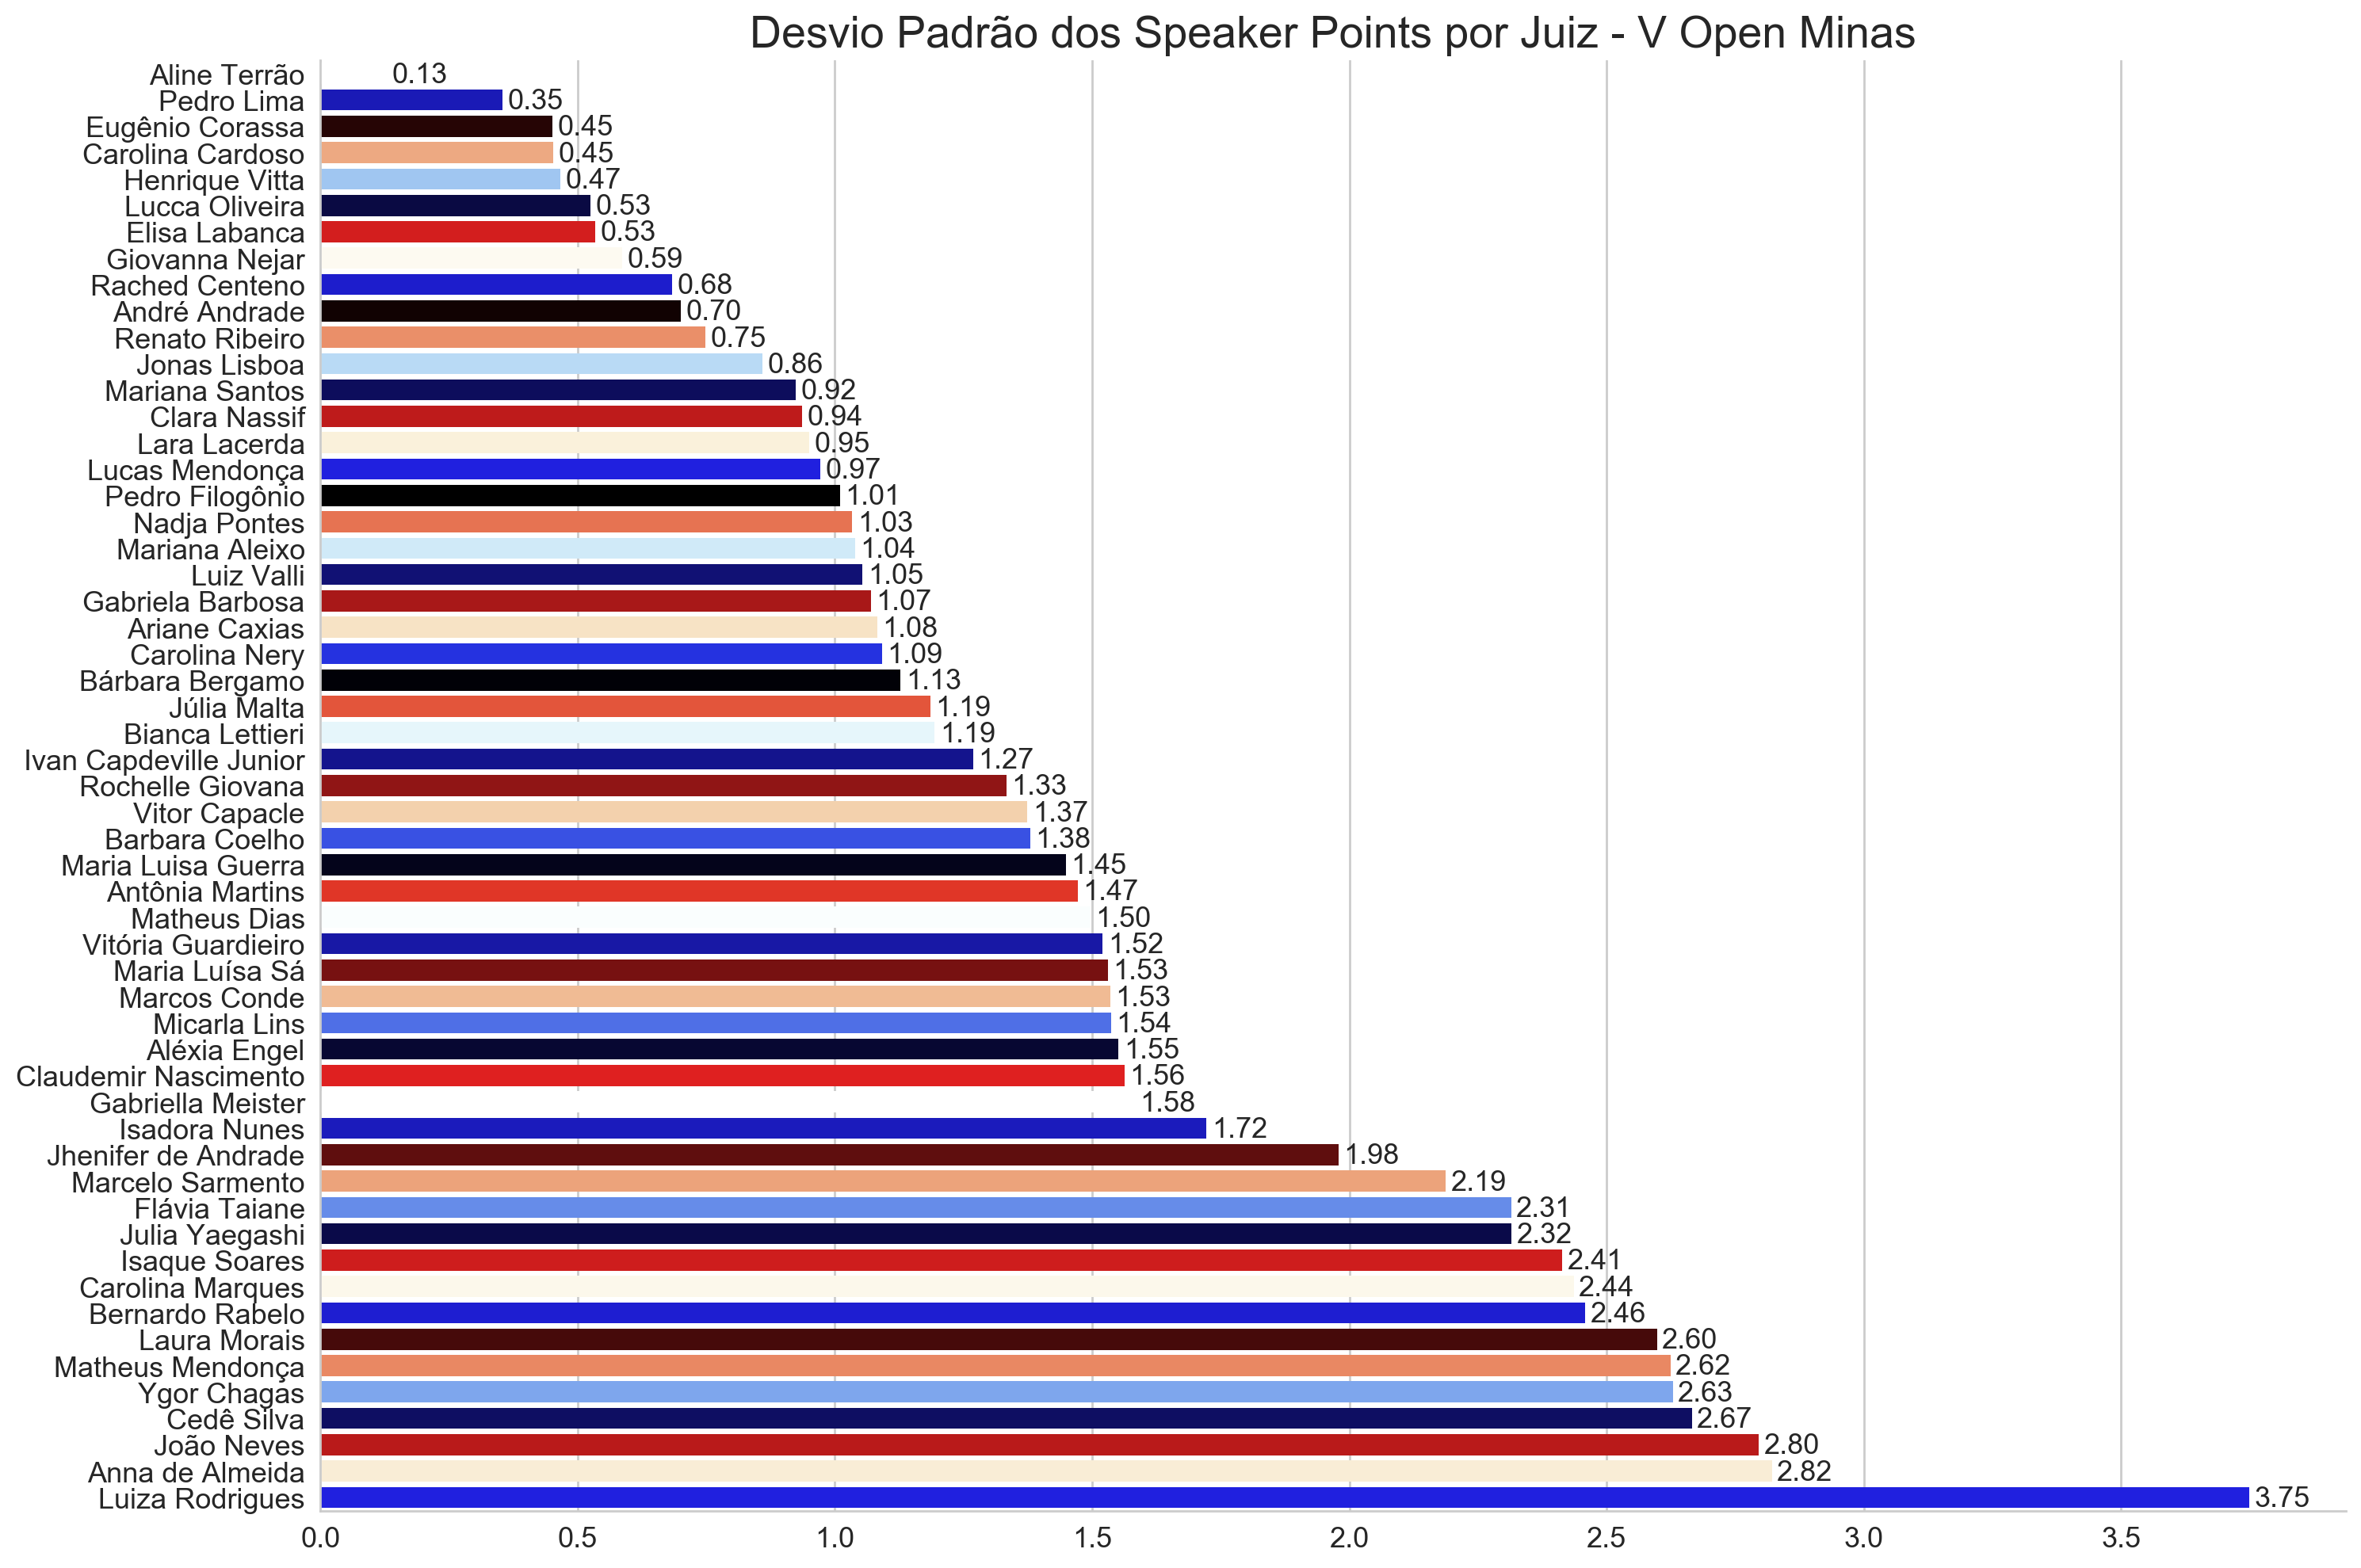

In [61]:
nome_chair=[]
nome_wing1=[]
nome_wing2=[]
std_chair_rodada=[]
std_wing1_rodada=[]
std_wing2_rodada=[]
std_juizes_rodada=[]
for rodada in [1,2,3,4,5]:
    vopen_rodada=vopen_rodada[vopen_rodada['Nota'+str(rodada)]!=0]
    for chair in list(set(vopen_rodada['Chair Rodada '+str(rodada)])):
        k=vopen_rodada[vopen_rodada['Chair Rodada '+str(rodada)]==chair]['Nota'+str(rodada)].std()
        std_chair_rodada.append([chair,k])
    for wing1 in list(set(vopen_rodada['Wing 1 Rodada '+str(rodada)])):
        l=vopen_rodada[vopen_rodada['Wing 1 Rodada '+str(rodada)]==wing1]['Nota'+str(rodada)].std()
        std_wing1_rodada.append([wing1,l])
    for wing2 in list(set(vopen_rodada['Wing 2 Rodada '+str(rodada)])):
        if wing2!='':
            m=vopen_rodada[vopen_rodada['Wing 2 Rodada '+str(rodada)]==wing2]['Nota'+str(rodada)].std()
            std_wing2_rodada.append([wing2,m])
for k in range(0,95):
    nome_chair.append(std_chair_rodada[k][0])
    nome_chair=list(set(nome_chair))
for k in range(0,95):
    nome_wing1.append(std_wing1_rodada[k][0])
    nome_wing1=list(set(nome_wing1))
for k in range(0,62):
    nome_wing2.append(std_wing2_rodada[k][0])
    nome_wing2=list(set(nome_wing2))
nomes=nome_chair+nome_wing1+nome_wing2
nomes=sorted(list(set(nomes)))
std_juizes=std_chair_rodada+std_wing1_rodada+std_wing2_rodada
for i in nomes:
    std_juiz_rodada=[]
    for j in range(0,252):
        if i==std_juizes[j][0]:
            std_juiz_rodada.append(std_juizes[j][1])
    std_juizes_rodada.append([i,np.std(np.array(std_juiz_rodada),axis=0)])
std_juizes_rodada=sorted(std_juizes_rodada,key=lambda x: x[1])
df=pd.DataFrame(data=std_juizes_rodada,columns=['Juízes','Desvio Padrão de SP'])
plt.figure(figsize=(15,10),dpi=200)
f=sns.barplot(y='Juízes',x='Desvio Padrão de SP',data=df,palette='flag')
f.set_title('Desvio Padrão dos Speaker Points por Juiz - V Open Minas',size=20)
f.set(ylabel='',xlabel='')
f.set_yticklabels(f.get_yticklabels(),size=13)
f.tick_params(labelsize=13)
for p in f.patches:
    _x=p.get_x()+p.get_width()+float(0.01)
    _y=p.get_y()+p.get_height()-float(0.07)
    value=format(p.get_width(),'.2f')
    f.text(_x,_y,value,ha="left",size=13)
sns.despine()
plt.tight_layout()
#plt.savefig("Desvio Padrão dos Speaker Points por Juiz - V Open Minas.png",dpi=200)

#### 1. Calculando a distribuição ideal de média de speaker points para cada sala:
Naturalmente, salas mais altas (debatedores mais experientes) devem ter médias maiores.

Consideramos uma distribuição normal entra as 19 salas do torneio, entre as faixas de 75 e 55 speaker points

Distribuição Ideal de Speaker Points para cada Sala:
 [[75.        ]
 [73.88888889]
 [72.77777778]
 [71.66666667]
 [70.55555556]
 [69.44444444]
 [68.33333333]
 [67.22222222]
 [66.11111111]
 [65.        ]
 [63.88888889]
 [62.77777778]
 [61.66666667]
 [60.55555556]
 [59.44444444]
 [58.33333333]
 [57.22222222]
 [56.11111111]
 [55.        ]]


/Users/pedrocerbino/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


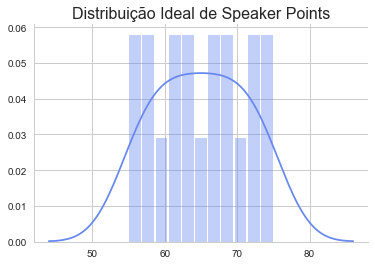

In [143]:
k=np.linspace(75,55,19)
print('Distribuição Ideal de Speaker Points para cada Sala:\n',k.reshape(19,1))
l=sns.distplot(k,bins=11,hist_kws={'rwidth':0.9})
l.set_title('Distribuição Ideal de Speaker Points',size=16)
sns.despine()
plt.show()

#### 2. Ordenando as salas segundo pontuação acumulada das duplas nela presentes:
Utilizamos "dificuldade" como critério de desempate para salas com mesma pontuação agregada de duplas

**Dificuldade** é o somatório dos pontos dos adversários que uma determinada dupla enfrentou. Assim, quanto mais difíceis os debates daquela dupla, maior é o valor da sua dificuldades (pois seus adversários pontuaram mais).

In [63]:
vopen_rodada2=vopen_rodada.groupby('Sala2',as_index=False).sum()
vopen_rodada2['Pontuação Agregada da Rodada 2']=np.array(vopen_rodada.groupby('Sala2').sum()['Ponto1'])
qt=0
qtd=0
for k in range(1,100):
    for i in vopen_rodada2.index.values:
        if i!=vopen_rodada2.index.values[-1]:
            if vopen_rodada2.loc[i]['Ponto1']<vopen_rodada2.loc[i+1]['Ponto1']:
                vopen_rodada2.loc[-4]=vopen_rodada2.loc[i]
                vopen_rodada2.loc[-3]=vopen_rodada2.loc[i+1]
                vopen_rodada2.loc[i]=vopen_rodada2.loc[-3]
                vopen_rodada2.loc[i+1]=vopen_rodada2.loc[-4]
                vopen_rodada2.drop([-4,-3],inplace=True)
for k in range(1,100):
    for i in vopen_rodada2.index.values:
        if i!=vopen_rodada2.index.values[-1]:                    
            if vopen_rodada2.loc[i]['Ponto1']==vopen_rodada2.loc[i+1]['Ponto1']:
                if vopen_rodada2.loc[i]['Dificuldade']<vopen_rodada2.loc[i+1]['Dificuldade']:
                    vopen_rodada2.loc[-4]=vopen_rodada2.loc[i]
                    vopen_rodada2.loc[-3]=vopen_rodada2.loc[i+1]
                    vopen_rodada2.loc[i]=vopen_rodada2.loc[-3]
                    vopen_rodada2.loc[i+1]=vopen_rodada2.loc[-4]
                    vopen_rodada2.drop([-4,-3],inplace=True)         
vopen_rodada2=pd.DataFrame(columns=[vopen_rodada2['Sala2'],vopen_rodada2['Pontuação Agregada da Rodada 2']])
vopen_rodada2=vopen_rodada2.T
vopen_rodada2['Média Ideal de SP']=np.linspace(75,55,19)
vopen_rodada2.reset_index(level=1,inplace=True,col_level=1)
vopen_rodada2.reset_index(level=0,inplace=True,col_level=0) 
vopen_rodada2

Sala2  Pontuação Agregada da Rodada 2  Média Ideal de SP
0    23.0                            32.0          75.000000
1    21.0                            32.0          73.888889
2    20.0                            32.0          72.777778
3    22.0                            32.0          71.666667
4    24.0                            30.0          70.555556
5    26.0                            24.0          69.444444
6    28.0                            24.0          68.333333
7    25.0                            24.0          67.222222
8    27.0                            21.0          66.111111
9    29.0                            20.0          65.000000
10   32.0                            16.0          63.888889
11   33.0                            14.0          62.777778
12   31.0                            14.0          61.666667
13   30.0                            12.0          60.555556
14   34.0                            10.0          59.444444
15   35.0                             8.0          58.333333
16   37.0                             8.0          57.222222
17   36.0                             8.0          56.111111
18   38.0                             6.0          55.000000

#### 3. Repetimos o processo para as demais rodadas:

In [64]:
vopen_rodada3=vopen_rodada.groupby('Sala3',as_index=False).sum()
vopen_rodada3['Pontuação Agregada da Rodada 3']=np.array(vopen_rodada.groupby('Sala3').sum()['Ponto1'])+np.array(vopen_rodada.groupby('Sala3').sum()['Ponto2'])
qt=0
qtd=0
for k in range(1,100):
    for i in vopen_rodada3.index.values:
        if i!=vopen_rodada3.index.values[-1]:
            if vopen_rodada3.loc[i]['Ponto1']+vopen_rodada3.loc[i]['Ponto2']<vopen_rodada3.loc[i+1]['Ponto1']+vopen_rodada3.loc[i+1]['Ponto2']:
                vopen_rodada3.loc[-4]=vopen_rodada3.loc[i]
                vopen_rodada3.loc[-3]=vopen_rodada3.loc[i+1]
                vopen_rodada3.loc[i]=vopen_rodada3.loc[-3]
                vopen_rodada3.loc[i+1]=vopen_rodada3.loc[-4]
                vopen_rodada3.drop([-4,-3],inplace=True)
for k in range(1,100):
    for i in vopen_rodada3.index.values:
        if i!=vopen_rodada3.index.values[-1]:                    
            if vopen_rodada3.loc[i]['Ponto1']+vopen_rodada3.loc[i]['Ponto2']==vopen_rodada3.loc[i+1]['Ponto1']+vopen_rodada3.loc[i+1]['Ponto2']:
                if vopen_rodada3.loc[i]['Dificuldade']<vopen_rodada3.loc[i+1]['Dificuldade']:
                    vopen_rodada3.loc[-4]=vopen_rodada3.loc[i]
                    vopen_rodada3.loc[-3]=vopen_rodada3.loc[i+1]
                    vopen_rodada3.loc[i]=vopen_rodada3.loc[-3]
                    vopen_rodada3.loc[i+1]=vopen_rodada3.loc[-4]
                    vopen_rodada3.drop([-4,-3],inplace=True)     
vopen_rodada3=pd.DataFrame(columns=[vopen_rodada3['Sala3'],vopen_rodada3['Pontuação Agregada da Rodada 3']])
vopen_rodada3=vopen_rodada3.T
vopen_rodada3['Média Ideal de SP']=np.linspace(75,55,19)
vopen_rodada3.reset_index(level=1,inplace=True,col_level=1)
vopen_rodada3.reset_index(level=0,inplace=True,col_level=0) 
vopen_rodada3

Sala3  Pontuação Agregada da Rodada 3  Média Ideal de SP
0    39.0                            64.0          75.000000
1    40.0                            58.0          73.888889
2    41.0                            56.0          72.777778
3    42.0                            52.0          71.666667
4    43.0                            48.0          70.555556
5    45.0                            48.0          69.444444
6    44.0                            48.0          68.333333
7    48.0                            40.0          67.222222
8    46.0                            40.0          66.111111
9    49.0                            40.0          65.000000
10   47.0                            40.0          63.888889
11   50.0                            36.0          62.777778
12   52.0                            32.0          61.666667
13   51.0                            28.0          60.555556
14   53.0                            28.0          59.444444
15   54.0                            23.0          58.333333
16   55.0                            22.0          57.222222
17   56.0                            20.0          56.111111
18   57.0                             8.0          55.000000

In [65]:
vopen_rodada4=vopen_rodada.groupby('Sala4',as_index=False).sum()
vopen_rodada4['Pontuação Agregada da Rodada 4']=np.array(vopen_rodada.groupby('Sala4').sum()['Ponto1'])+np.array(vopen_rodada.groupby('Sala4').sum()['Ponto2'])+np.array(vopen_rodada.groupby('Sala4').sum()['Ponto3'])
qt=0
qtd=0
for k in range(1,100):
    for i in vopen_rodada4.index.values:
        if i!=vopen_rodada4.index.values[-1]:
            if vopen_rodada4.loc[i]['Ponto1']+vopen_rodada4.loc[i]['Ponto2']+vopen_rodada4.loc[i]['Ponto3']<vopen_rodada4.loc[i+1]['Ponto1']+vopen_rodada4.loc[i+1]['Ponto2']+vopen_rodada4.loc[i+1]['Ponto3']:
                vopen_rodada4.loc[-4]=vopen_rodada4.loc[i]
                vopen_rodada4.loc[-3]=vopen_rodada4.loc[i+1]
                vopen_rodada4.loc[i]=vopen_rodada4.loc[-3]
                vopen_rodada4.loc[i+1]=vopen_rodada4.loc[-4]
                vopen_rodada4.drop([-4,-3],inplace=True)
for k in range(1,100):
    for i in vopen_rodada4.index.values:
        if i!=vopen_rodada4.index.values[-1]:                    
            if vopen_rodada4.loc[i]['Ponto1']+vopen_rodada4.loc[i]['Ponto2']+vopen_rodada4.loc[i]['Ponto3']==vopen_rodada4.loc[i+1]['Ponto1']+vopen_rodada4.loc[i+1]['Ponto2']+vopen_rodada4.loc[i+1]['Ponto3']:
                if vopen_rodada4.loc[i]['Dificuldade']<vopen_rodada4.loc[i+1]['Dificuldade']:
                    vopen_rodada4.loc[-4]=vopen_rodada4.loc[i]
                    vopen_rodada4.loc[-3]=vopen_rodada4.loc[i+1]
                    vopen_rodada4.loc[i]=vopen_rodada4.loc[-3]
                    vopen_rodada4.loc[i+1]=vopen_rodada4.loc[-4]
                    vopen_rodada4.drop([-4,-3],inplace=True)   
vopen_rodada4=pd.DataFrame(columns=[vopen_rodada4['Sala4'],vopen_rodada4['Pontuação Agregada da Rodada 4']])
vopen_rodada4=vopen_rodada4.T
vopen_rodada4['Média Ideal de SP']=np.linspace(75,55,19)
vopen_rodada4.reset_index(level=1,inplace=True,col_level=1)
vopen_rodada4.reset_index(level=0,inplace=True,col_level=0) 
vopen_rodada4

Sala4  Pontuação Agregada da Rodada 4  Média Ideal de SP
0    58.0                            90.0          75.000000
1    59.0                            84.0          73.888889
2    60.0                            80.0          72.777778
3    61.0                            72.0          71.666667
4    62.0                            72.0          70.555556
5    63.0                            68.0          69.444444
6    64.0                            64.0          68.333333
7    65.0                            64.0          67.222222
8    66.0                            64.0          66.111111
9    69.0                            56.0          65.000000
10   70.0                            56.0          63.888889
11   68.0                            56.0          62.777778
12   67.0                            51.0          61.666667
13   72.0                            48.0          60.555556
14   73.0                            46.0          59.444444
15   71.0                            42.0          58.333333
16   74.0                            30.0          57.222222
17   76.0                            26.0          56.111111
18   75.0                            21.0          55.000000

In [66]:
vopen_rodada5=vopen_rodada.groupby('Sala5',as_index=False).sum()
vopen_rodada5['Pontuação Agregada da Rodada 5']=np.array(vopen_rodada.groupby('Sala5').sum()['Ponto1'])+np.array(vopen_rodada.groupby('Sala5').sum()['Ponto2'])+np.array(vopen_rodada.groupby('Sala5').sum()['Ponto3']+np.array(vopen_rodada.groupby('Sala5').sum()['Ponto4']))
for k in range(1,100):
    for i in vopen_rodada5.index.values:
        if i!=vopen_rodada5.index.values[-1]:
            if vopen_rodada5.loc[i]['Ponto1']+vopen_rodada5.loc[i]['Ponto2']+vopen_rodada5.loc[i]['Ponto3']+vopen_rodada5.loc[i]['Ponto4']<vopen_rodada5.loc[i+1]['Ponto1']+vopen_rodada5.loc[i+1]['Ponto2']+vopen_rodada5.loc[i+1]['Ponto3']+vopen_rodada5.loc[i+1]['Ponto4']:
                vopen_rodada5.loc[-4]=vopen_rodada5.loc[i]
                vopen_rodada5.loc[-3]=vopen_rodada5.loc[i+1]
                vopen_rodada5.loc[i]=vopen_rodada5.loc[-3]
                vopen_rodada5.loc[i+1]=vopen_rodada5.loc[-4]
                vopen_rodada5.drop([-4,-3],inplace=True)
for k in range(1,100):
    for i in vopen_rodada5.index.values:
        if i!=vopen_rodada5.index.values[-1]:                    
            if vopen_rodada5.loc[i]['Ponto1']+vopen_rodada5.loc[i]['Ponto2']+vopen_rodada5.loc[i]['Ponto3']+vopen_rodada5.loc[i]['Ponto4']==vopen_rodada5.loc[i+1]['Ponto1']+vopen_rodada5.loc[i+1]['Ponto2']+vopen_rodada5.loc[i+1]['Ponto3']+vopen_rodada5.loc[i+1]['Ponto4']:
                if vopen_rodada5.loc[i]['Dificuldade']<vopen_rodada5.loc[i+1]['Dificuldade']:
                    vopen_rodada5.loc[-4]=vopen_rodada5.loc[i]
                    vopen_rodada5.loc[-3]=vopen_rodada5.loc[i+1]
                    vopen_rodada5.loc[i]=vopen_rodada5.loc[-3]
                    vopen_rodada5.loc[i+1]=vopen_rodada5.loc[-4]
                    vopen_rodada5.drop([-4,-3],inplace=True) 
vopen_rodada5=pd.DataFrame(columns=[vopen_rodada5['Sala5'],vopen_rodada5['Pontuação Agregada da Rodada 5']])
vopen_rodada5=vopen_rodada5.T
vopen_rodada5['Média Ideal de SP']=np.linspace(75,55,19)
vopen_rodada5.reset_index(level=1,inplace=True,col_level=1)
vopen_rodada5.reset_index(level=0,inplace=True,col_level=0) 
vopen_rodada5

Sala5  Pontuação Agregada da Rodada 5  Média Ideal de SP
0    77.0                           116.0          75.000000
1    78.0                           106.0          73.888889
2    79.0                           102.0          72.777778
3    81.0                            96.0          71.666667
4    80.0                            96.0          70.555556
5    82.0                            88.0          69.444444
6    83.0                            88.0          68.333333
7    84.0                            84.0          67.222222
8    86.0                            80.0          66.111111
9    85.0                            80.0          65.000000
10   87.0                            78.0          63.888889
11   89.0                            72.0          62.777778
12   91.0                            64.0          61.666667
13   90.0                            63.0          60.555556
14   93.0                            58.0          59.444444
15   88.0                            54.0          58.333333
16   92.0                            48.0          57.222222
17   95.0                            40.0          56.111111
18   94.0                            38.0          55.000000

#### 4. Calculamos a diferença entre a média de speaker points real e ideal para cada juiz, para cada rodada:
Posteriormente, agregamos os dados para cada juiz

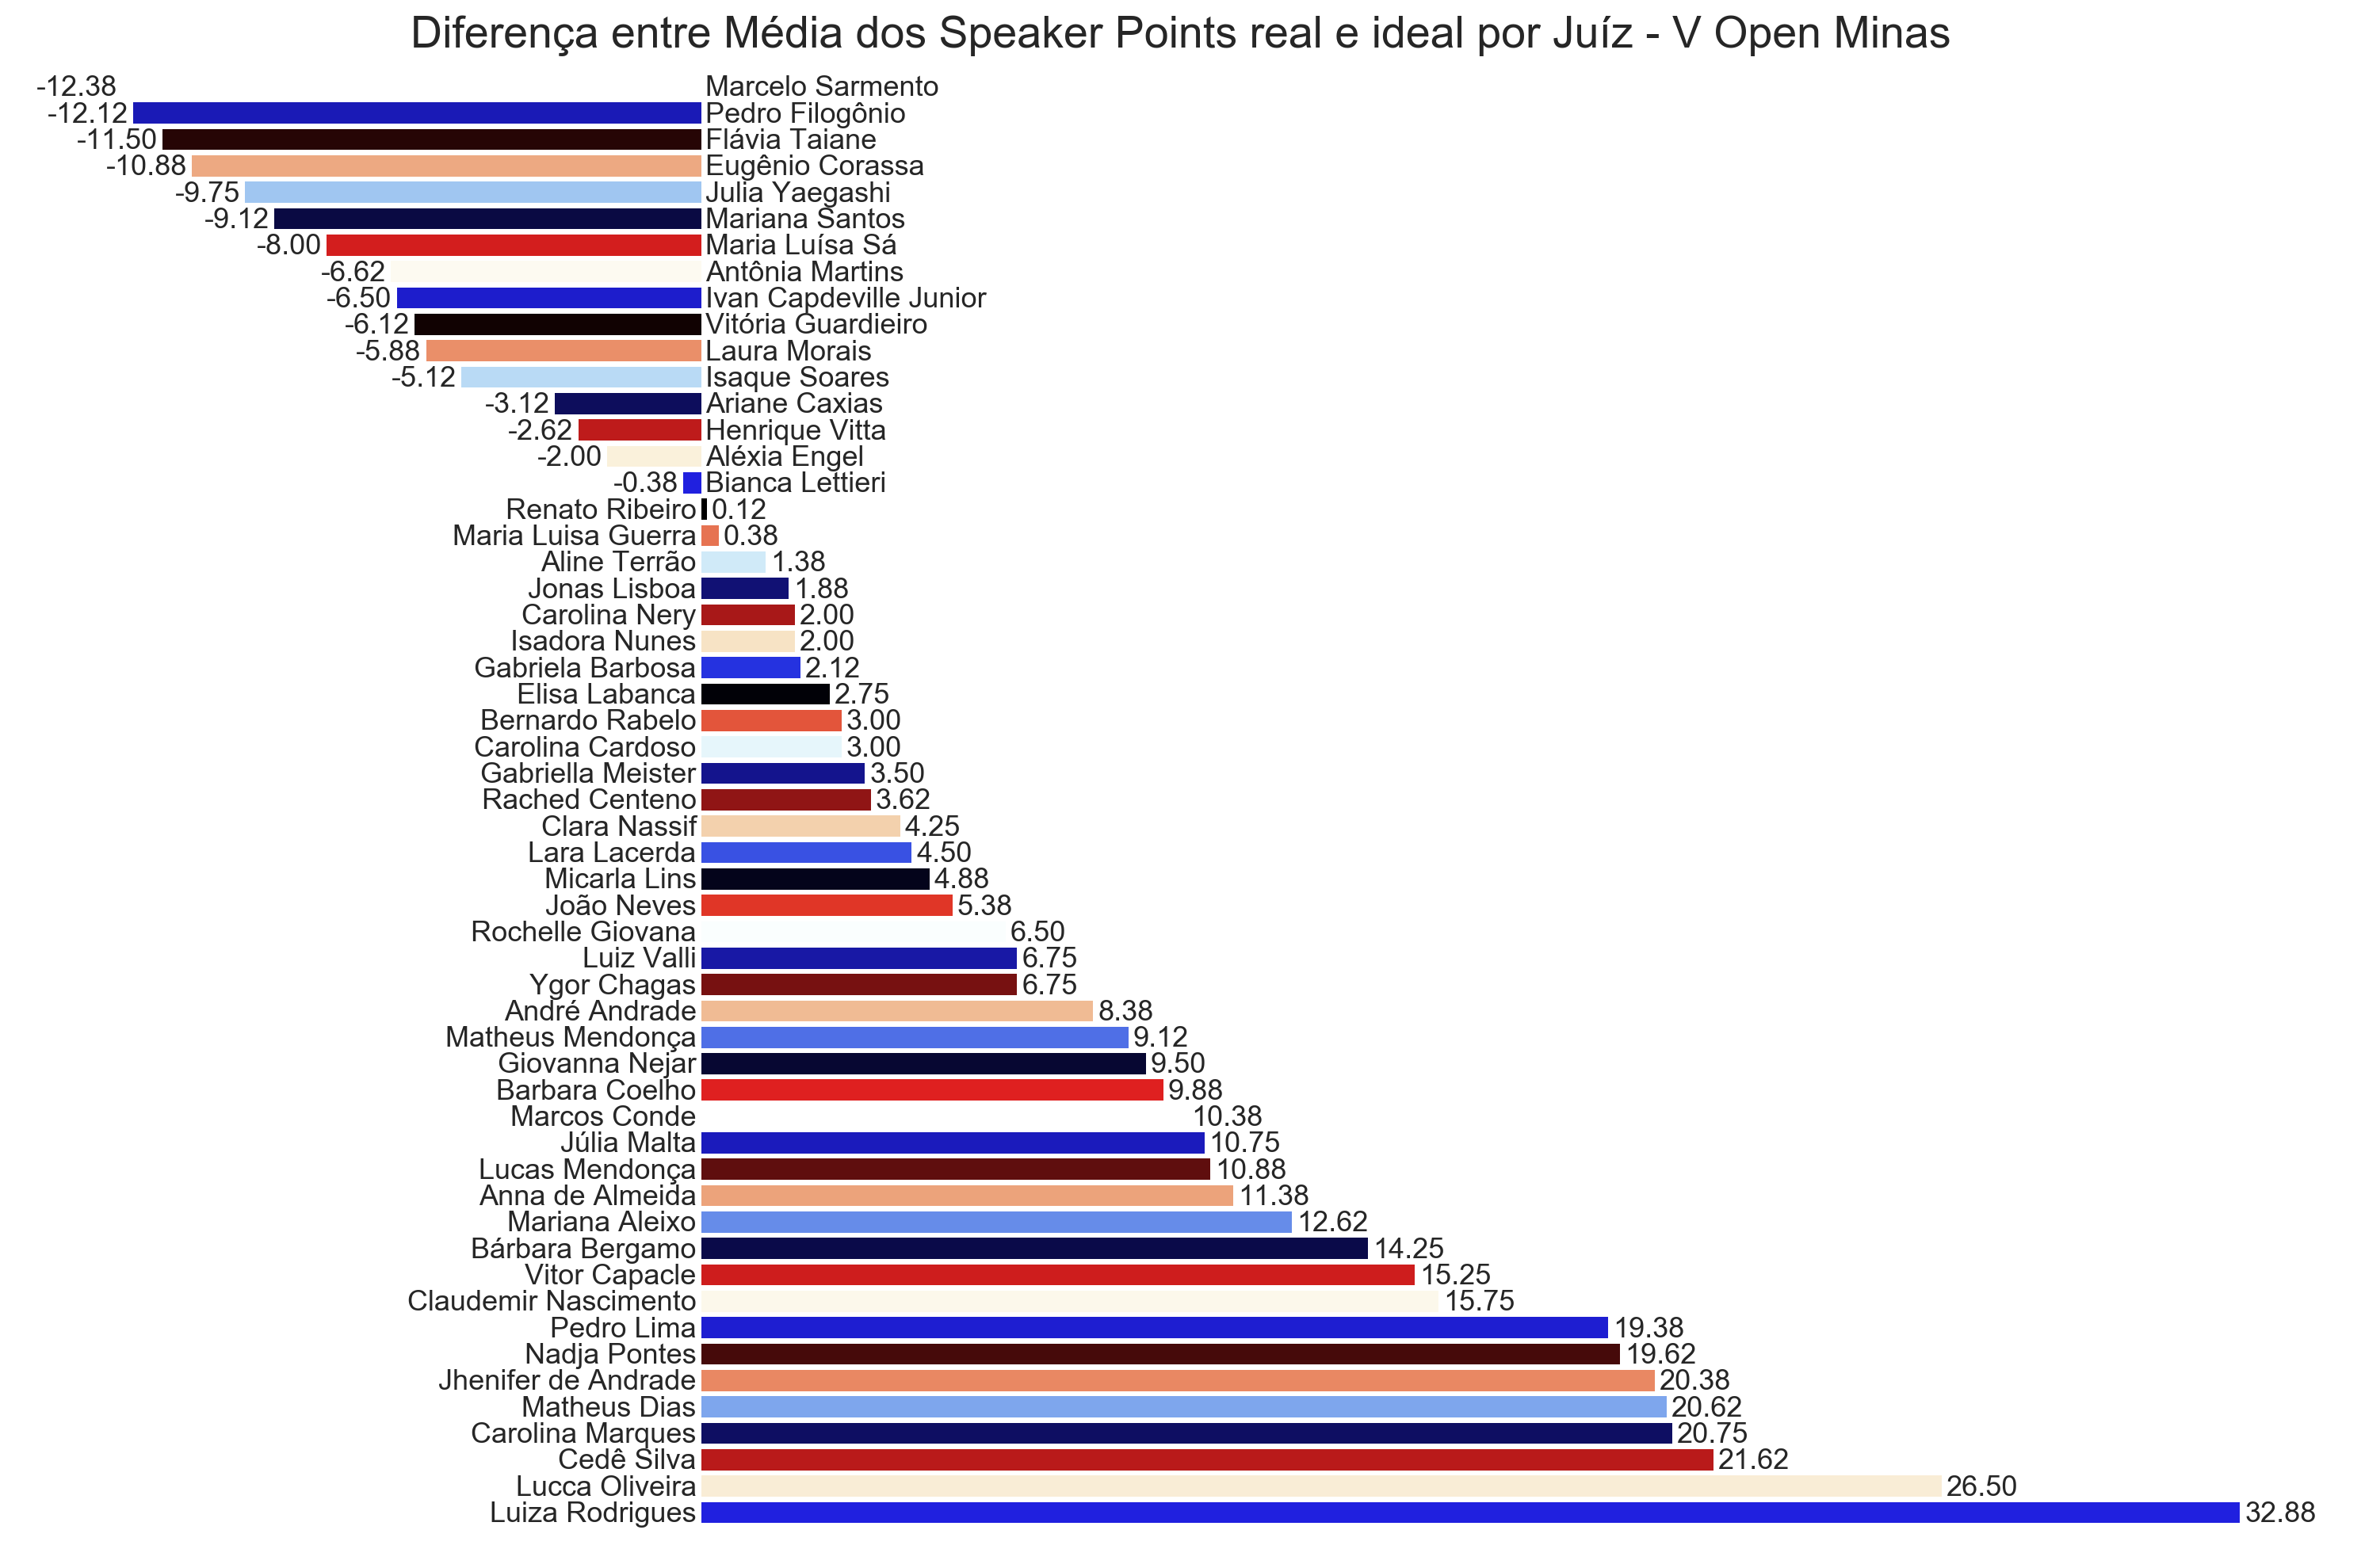

In [67]:
diferencas=[]
diferenca_total=[]
media_juizes_sala=[]
sns.set_style('white')
for sala in range(20,96):
    juizes_sala=[]
    for j in range(0,252):
        if sala==media_juizes[j][2]:
            juizes_sala.append(media_juizes[j][0])
            juizes_sala.append(media_juizes[j][1])
        juizes_sala=list(dict.fromkeys(juizes_sala))
    media_juizes_sala.append([sala,juizes_sala])
media_juizes_sala=sorted(media_juizes_sala,key=lambda x: x[1][1])
media_juizes_sala
for i in range(0,73):
    for k in range(20,39):
        if media_juizes_sala[i][0]==k:
            diferenca=media_juizes_sala[i][1][1]-int(vopen_rodada2[vopen_rodada2['Sala2']==k]['Média Ideal de SP'].unique())
            diferencas.append([diferenca,media_juizes_sala[i][1][0]])
            diferencas.append([diferenca,media_juizes_sala[i][1][2]])
            if len(media_juizes_sala[i][1])==4:
                diferencas.append([diferenca,media_juizes_sala[i][1][3]])
    for k in range(39,58):
        if media_juizes_sala[i][0]==k:
            diferenca=media_juizes_sala[i][1][1]-int(vopen_rodada3[vopen_rodada3['Sala3']==k]['Média Ideal de SP'].unique())
            diferencas.append([diferenca,media_juizes_sala[i][1][0]])
            diferencas.append([diferenca,media_juizes_sala[i][1][2]])
            if len(media_juizes_sala[i][1])==4:
                diferencas.append([diferenca,media_juizes_sala[i][1][3]])
    for k in range(58,77):
        if media_juizes_sala[i][0]==k:
            diferenca=media_juizes_sala[i][1][1]-int(vopen_rodada4[vopen_rodada4['Sala4']==k]['Média Ideal de SP'].unique())
            diferencas.append([diferenca,media_juizes_sala[i][1][0]])
            diferencas.append([diferenca,media_juizes_sala[i][1][2]])
            if len(media_juizes_sala[i][1])==4:
                diferencas.append([diferenca,media_juizes_sala[i][1][3]])
    for k in range(77,96):
        if media_juizes_sala[i][0]==k:
            diferenca=media_juizes_sala[i][1][1]-int(vopen_rodada5[vopen_rodada5['Sala5']==k]['Média Ideal de SP'].unique())
            diferencas.append([diferenca,media_juizes_sala[i][1][0]])
            diferencas.append([diferenca,media_juizes_sala[i][1][2]])
            if len(media_juizes_sala[i][1])==4:
                diferencas.append([diferenca,media_juizes_sala[i][1][3]])
for i in nomes:
    media_juiz_sala=[]
    for j in range(0,len(diferencas)):
        if i==diferencas[j][1]:
            media_juiz_sala.append(diferencas[j][0])
    diferenca_total.append([i,sum(media_juiz_sala)])
diferenca_total=sorted(diferenca_total,key=lambda x: x[1])
df=pd.DataFrame(data=diferenca_total,columns=['Juízes','Diferença SP ideal e real'])
plt.figure(figsize=(15,10),dpi=200)
f=sns.barplot(y='Juízes',x='Diferença SP ideal e real',data=df,palette='flag')
f.set_title('Diferença entre Média dos Speaker Points real e ideal por Juíz - V Open Minas',size=20)
f.set_ylim([55.5,-1])
f.set(ylabel='',xlabel='')
f.set_yticklabels('')
f.set_xticklabels('')
qt=0
for p in f.patches:
    qt+=1
    _x=p.get_x()+p.get_width()+float(0.03)
    _y=p.get_y()+p.get_height()-float(0.07)
    value=format(p.get_width(),'.2f')
    if float(value)>0:
        _x=p.get_x()+p.get_width()+float(0.1)
        _y=p.get_y()+p.get_height()-float(0.07)
        value=format(p.get_width(),'.2f')
        f.text(_x,_y,value,ha='left',size=13)
        f.text(-0.1,_y,f.get_yticklabels()[qt-1].get_text(),ha='right',size=13)
    else:
        _x=p.get_x()+p.get_width()-float(0.1)
        _y=p.get_y()+p.get_height()-float(0.07)
        value=format(p.get_width(),'.2f')
        f.text(_x,_y,value,ha='right',size=13)
        f.text(0.1,_y,f.get_yticklabels()[qt-1].get_text(),ha='left',size=13)
sns.despine(left=True,bottom=True)
plt.tight_layout()
#plt.savefig("Média dos Speaks Points por Juíz - V Open Minas.png",dpi=200)

Os juízes com resultado negativo são "mão pesada" (tem média de speaker points mais baixa do que o ideal para o nível dos debatedores de sua sala). 

Já os juízes com resultado positivo são "mão leve" (tem média de speaker points mais alta do que o ideal para o nível dos debatedores de sua sala).

## Machine Learning

Utilizo abaixo algumas modelagem para, usando aprendizado computacional, realizar algumas análises

### Regressão Linear

Utilizando Pontuação das rodadas para determinar Pontuação Média

Break é o nome dado ao processo de passar às eliminatórias. Neste torneio, 16 duplas breakaram

In [202]:
vopen.sort_values(by='Pontuação',ascending=False,inplace=True)
#quem breakou é categorizado como 2; quem não, 1:
vopen['Break']=list(np.ones(32)*2)+list(np.zeros(120)+np.ones(120))
vopen.head()

ID                  Nome       SD  Ponto1  Nota1  Sala1  Ponto2  Nota2  \
19   3          Estevão Mota   SdDUFC       4     71      1       3     68   
10   3  Pedro Jorge Medeiros   SdDUFC       4     73      1       3     70   
0    5         Arthur Gandra  Senatus       4     80      2       4     73   
9   70    João Pedro de Luna  Senatus       4     77     18       3     75   
15  42    João Vitor Miranda  Senatus       3     72     11       3     70   

    Sala2  Ponto3  ...    Sala5  Pontuação  Dificuldade  Nota Final  \
19     24       4  ...       77         19        58.50        73.0   
10     24       4  ...       77         19        58.50        74.8   
0      24       4  ...       79         17        59.75        77.2   
9      23       4  ...       78         17        58.00        75.2   
15     28       4  ...       77         17        58.75        74.0   

       Rodada  1D  1O  2D  2O  Break  
19  1ª Rodada  21  22  23  24    2.0  
10  1ª Rodada  17  18  19  20    2.0  
0   1ª Rodada  33  34  35  36    2.0  
9           0   0   0   0   0    2.0  
15  5ª Rodada  30  20  41  63    2.0  

[5 rows x 27 columns]

In [254]:
from sklearn.model_selection import train_test_split

In [299]:
X=vopen[['Ponto1','Ponto2','Ponto3','Ponto4','Ponto5']]
y=vopen['Pontuação']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [300]:
from sklearn.linear_model import LinearRegression

In [301]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [302]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
cdf

Coefficients
Ponto1      1.049461
Ponto2      0.959468
Ponto3      0.955976
Ponto4      0.984167
Ponto5      1.011049

Tudo o mais constante, o acréscimo de 01 Ponto na Rodada 1 está associado a um aumento de 1.056340 na Pontuação

Tudo o mais constante, o acréscimo de 01 Ponto na Rodada 2 está associado a um aumento de 0.953895 na Pontuação

Tudo o mais constante, o acréscimo de 01 Ponto na Rodada 3 está associado a um aumento de 0.953328 na Pontuação

Tudo o mais constante, o acréscimo de 01 Ponto na Rodada 4 está associado a um aumento de 0.986616 na Pontuação

Tudo o mais constante, o acréscimo de 01 Ponto na Rodada 5 está associado a um aumento de 1.010858 na Pontuação

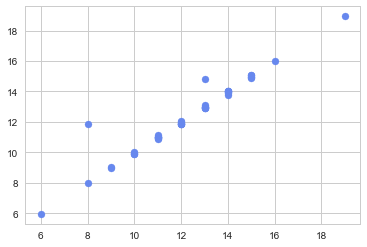

In [303]:
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)

In [305]:
from sklearn import metrics

In [306]:
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.17892037514955136
0.39695318783797484
0.6300422111557089


### Árvore de Decisão

Utilizando as notas individuais para determinar o break.

In [264]:
from sklearn.tree import DecisionTreeClassifier

In [265]:
dtree=DecisionTreeClassifier()

In [286]:
X=vopen[['Nota1','Nota2','Nota3','Nota4','Nota5']]
y=vopen['Break']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [287]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [288]:
predictions=dtree.predict(X_test)

In [289]:
from sklearn.metrics import classification_report,confusion_matrix

In [290]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[32  7]
 [ 2  5]]


             precision    recall  f1-score   support

        1.0       0.94      0.82      0.88        39
        2.0       0.42      0.71      0.53         7

avg / total       0.86      0.80      0.82        46



Neste modelo, as notas individuais tem um precisão de 86% ao serem usadas para prever as duplas que breakaram

### Regressão Linear

Utilizando Notas das rodadas para determinar Nota Final

In [279]:
X=vopen[['Nota1','Nota2','Nota3','Nota4','Nota5']]
y=vopen['Nota Final']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [280]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [282]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
cdf

Coefficients
Nota1      0.243742
Nota2      0.039749
Nota3      0.208272
Nota4      0.237250
Nota5      0.234474

Tudo o mais constante, o acréscimo de 01 Speaker Point na Rodada 1 está associado a um aumento de 0.077838 na Nota Final

Tudo o mais constante, o acréscimo de 01 Speaker Point na Rodada 2 está associado a um aumento de 0.045041 na Nota Final

Tudo o mais constante, o acréscimo de 01 Speaker Point na Rodada 3 está associado a um aumento de 0.225211 na Nota Final

Tudo o mais constante, o acréscimo de 01 Speaker Point na Rodada 4 está associado a um aumento de 0.280002 na Nota Final

Tudo o mais constante, o acréscimo de 01 Speaker Point na Rodada 5 está associado a um aumento de 0.269757 na Nota Final

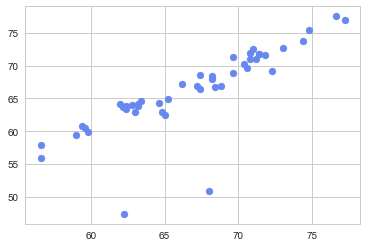

In [283]:
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)

In [285]:
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

1.5775185114856998
12.420508223076753
3.5242741413058027
